# Desiases Model 

### libraries

In [1]:
# Standard library imports
import os
import sys

# Third-party scientific computing
import numpy as np
import pandas as pd
import openpyxl as xsl

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import missingno as msno

# Scikit-learn components
from sklearn import (
    decomposition,
    ensemble,
    feature_selection,
    impute,
    linear_model,
    manifold,
    metrics,
    model_selection,
    neighbors,
    pipeline,
    preprocessing,
)

# Scikit-learn specific imports
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import (
    KNNImputer,
    SimpleImputer,
)
from sklearn.linear_model import (
    ElasticNet,
    LinearRegression,
    LogisticRegression,
    Ridge,
)
from sklearn.manifold import TSNE
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    make_scorer,
    mean_absolute_error,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_auc_score,
    r2_score,
    confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    ShuffleSplit,
    StratifiedKFold,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    StandardScaler,
)

import catboost
from catboost import CatBoostClassifier, Pool


# Other ML libraries
import lightgbm as lgb
import optuna
import shap

# from umap import UMAP

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

# Synthetic data
from sklearn.datasets import make_classification


from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

## Load Data

In [2]:
data_test = pd.read_excel("test_data.xlsx")
data_train = pd.read_excel("training_data.xlsx")

In [3]:
data_train["disease"].unique()

array(['D68.8', 'D47.1', 'D47.2', 'D69.6', 'D69.5', 'C91.1', nan, 'C90.0',
       'D61.3', 'C92.4', 'D56.1', 'D46.4', 'D68.5', 'D68.9', 'C83.2',
       'C85.7', 'C91.4', 'C38.1', 'C84.0', 'C92.1', 'C88.0', 'C92.0',
       'D75.1', 'D51.0', 'C81.1', 'D69.3', 'D61.9', 'C84.6', 'D47.3',
       'D47.5', 'C82.0', 'D68.2', 'D46.9', 'D50.8', 'D68.4', 'C83.9',
       'C94.6', 'C83.3', 'D66', 'D47.4', 'C81.0', 'D50.0', 'D75.2',
       'D72.9', 'D45', 'C96.7', 'C93.0', 'D59.1', 'D75.9', 'C82.1',
       'C83.7', 'healthy', 'D64.9', 'D50.9', 'D46.6', 'C91.0', 'D68.0',
       'D69.1', 'D46.7', 'D73.9', 'C86.5', 'D36.0', 'D48.9', 'D72.8',
       'C84.5', 'D67', 'D25.0', 'C83.8', 'C84.2', 'C94.7', 'C90.2',
       'C82.3', 'C96.2', 'D51.9', 'C94.1', 'C90.3', 'C83.1', 'D17.9',
       'D75.0', 'C41.4', 'C92.5', 'C84.8', 'C95.9', 'C85.9', 'D46.1',
       'C92.7', 'D61.8', 'D46.2', 'D61.0', 'D72.1', 'C83.0', 'C34.1',
       'C85.1', 'D25.1', 'C91.6', 'D51.8', 'D77', 'D58.0', 'D46.5',
       'D60.0', 'C86.

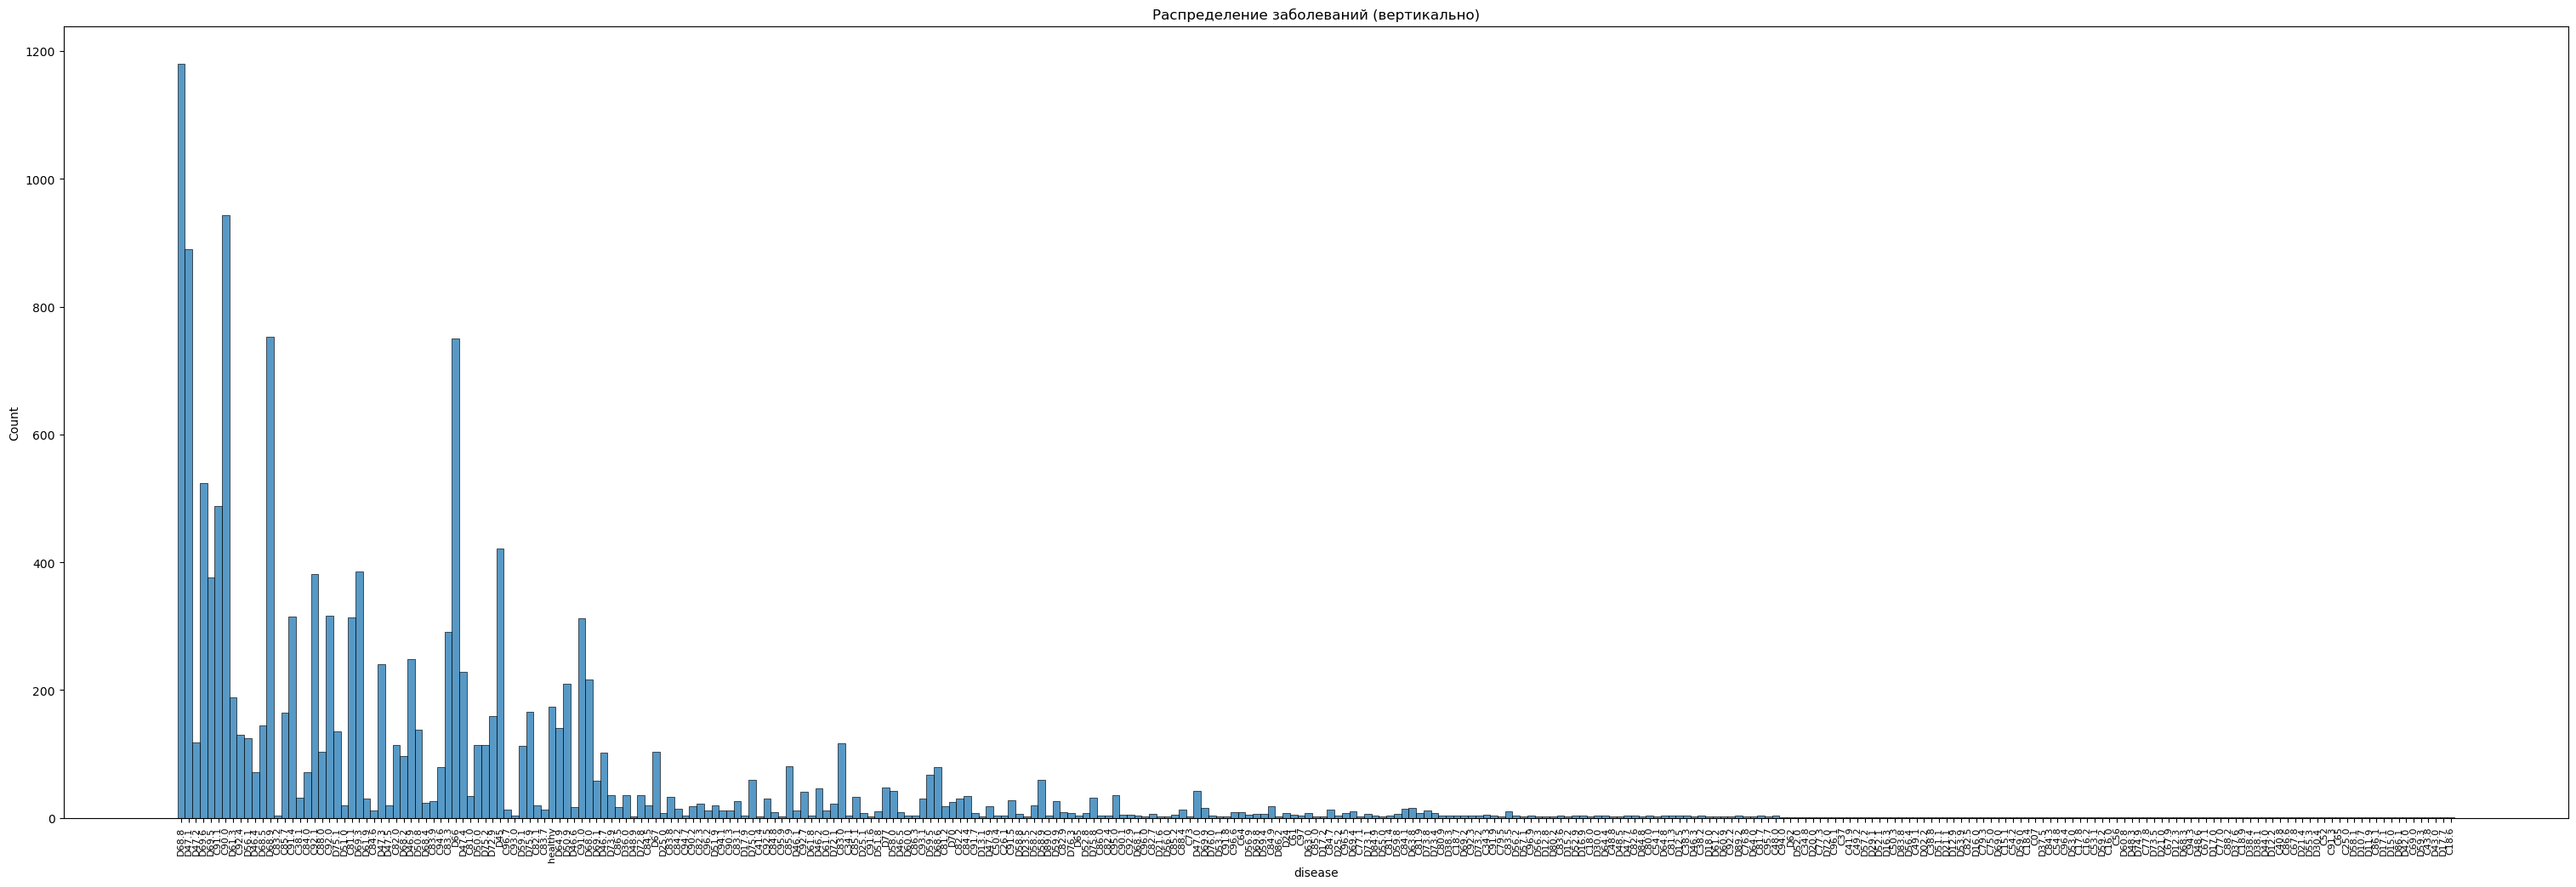

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Увеличиваем размер графика
plt.figure(figsize=(60, 20))

# Вариант 1: Вертикальная гистограмма с поворотом подписей
plt.subplot(2, 2, 1)
sns.histplot(data=data_train, x="disease")
plt.xticks(rotation=90, fontsize=8)
plt.title("Распределение заболеваний (вертикально)")
plt.tight_layout()

plt.show()

In [5]:
data_train["disease"].unique()

array(['D68.8', 'D47.1', 'D47.2', 'D69.6', 'D69.5', 'C91.1', nan, 'C90.0',
       'D61.3', 'C92.4', 'D56.1', 'D46.4', 'D68.5', 'D68.9', 'C83.2',
       'C85.7', 'C91.4', 'C38.1', 'C84.0', 'C92.1', 'C88.0', 'C92.0',
       'D75.1', 'D51.0', 'C81.1', 'D69.3', 'D61.9', 'C84.6', 'D47.3',
       'D47.5', 'C82.0', 'D68.2', 'D46.9', 'D50.8', 'D68.4', 'C83.9',
       'C94.6', 'C83.3', 'D66', 'D47.4', 'C81.0', 'D50.0', 'D75.2',
       'D72.9', 'D45', 'C96.7', 'C93.0', 'D59.1', 'D75.9', 'C82.1',
       'C83.7', 'healthy', 'D64.9', 'D50.9', 'D46.6', 'C91.0', 'D68.0',
       'D69.1', 'D46.7', 'D73.9', 'C86.5', 'D36.0', 'D48.9', 'D72.8',
       'C84.5', 'D67', 'D25.0', 'C83.8', 'C84.2', 'C94.7', 'C90.2',
       'C82.3', 'C96.2', 'D51.9', 'C94.1', 'C90.3', 'C83.1', 'D17.9',
       'D75.0', 'C41.4', 'C92.5', 'C84.8', 'C95.9', 'C85.9', 'D46.1',
       'C92.7', 'D61.8', 'D46.2', 'D61.0', 'D72.1', 'C83.0', 'C34.1',
       'C85.1', 'D25.1', 'C91.6', 'D51.8', 'D77', 'D58.0', 'D46.5',
       'D60.0', 'C86.

In [6]:
import pickle
with open("folds_indices.pkl", "rb") as f:
    folds_indices = pickle.load(f)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 62 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     16751 non-null  int64  
 1   client_id                                      16751 non-null  int64  
 2   gender                                         16751 non-null  object 
 3   age                                            16751 non-null  int64  
 4   Атипичные_мононуклеары                         10128 non-null  float64
 5   Базофилы_кл                                    14099 non-null  float64
 6   Гематокрит                                     16415 non-null  float64
 7   Гемоглобин                                     16412 non-null  float64
 8   Контрольная_сумма                              10203 non-null  float64
 9   Лейкоциты                                      164

## Preparing data

- We leave the most frequently encountered groups
- There are С D I M K 
- Drop M E R Z and other small group
- Our set ["D", "C", "I", "K", "N", "H"]


# Summary of ICD-10 Codes from Hematological Perspective

## D - Diseases of the Blood and Blood-forming Organs
- **General chapter** for hematological conditions
- Includes anemias, coagulation disorders, and other blood diseases
- **Range**: D50-D89

## C - Malignant Neoplasms
- Hematological malignancies:
  - **Leukemias**
  - **Lymphomas** 
  - **Myeloma**
- **Specific codes**: C81-C96 (malignant neoplasms of lymphoid, hematopoietic tissues)

## I - Diseases of the Circulatory System
- Hematologically relevant conditions:
  - **Embolism**
  - **Arterial thrombosis**
- Relates to coagulation disorders and their complications

## K - Diseases of the Digestive System
- Hematological connections:
  - **GI bleeding** leading to anemia
  - **Specific code**: K92.2 (gastrointestinal hemorrhage)

## N - Diseases of the Genitourinary System  
- Hematological associations:
  - **Anemia in chronic kidney disease**
  - **Specific code**: N18 (chronic kidney disease)

## H - MayBe Health

## Как фильтруем?

- посмотрим на распределение диагнозов по семействам 

In [8]:
data_train.shape

(16751, 62)

In [9]:
import numpy as np
from collections import Counter

# to find classes that have < 5 samples in *any* training split.
print("\nStep 1: Identifying 'small' classes (train samples < 100 in any fold)...")
classes_to_remove = set()

for fold_name, (train_idx, val_idx) in folds_indices.items():
    y_train_labels = data_train.iloc[train_idx]['disease']
    train_counts = y_train_labels.value_counts()
    
    # Find classes with < 5 samples *in this fold's training set*
    small_classes_in_fold = train_counts[train_counts < 100].index
    
    if small_classes_in_fold.any():
        print(f"  > Fold '{fold_name}' has small classes: {list(small_classes_in_fold)}")
        classes_to_remove.update(small_classes_in_fold)

print(f"✔️ Classes to remove globally: {classes_to_remove}")

print("\nStep 2: Creating the final, clean dataframe...")

# Get indices of all rows that are NaN
nan_indices = data_train[data_train['disease'].isna()].index

# Get indices of all rows that belong to a "small class"
small_class_indices = data_train[data_train['disease'].isin(classes_to_remove)].index

# Combine them into a single list of all indices to drop
all_indices_to_remove = nan_indices.union(small_class_indices)
print(f"  > Removing {len(nan_indices)} NaN rows.")
print(f"  > Removing {len(small_class_indices)} rows from small classes.")

# Create the final, clean dataframe by dropping all "bad" rows
data_final = data_train.drop(all_indices_to_remove)
print(f"  > Original data shape: {data_train.shape}")
print(f"  > Final clean data shape: {data_final.shape}")

print("\nStep 3: Building the index map...")

# We need to map the *original* indices to the *new* 0-N indices
# in 'data_final'.
# 1. Reset the index of data_final, but *keep* the original index as a column
data_final = data_final.reset_index(names='original_index')

# 2. Create the mapping:
#    key = original_index, value = new_index (0, 1, 2...)
original_to_new_index_map = pd.Series(
    data_final.index, 
    index=data_final['original_index']
)
print(f"✔️ Map created. Example: Original index {original_to_new_index_map.index[0]} is now new index {original_to_new_index_map.iloc[0]}")

print("\nStep 4: Generating new, clean fold indices...")
new_folds_indices = {}

for fold_name, (train_idx_orig, val_idx_orig) in folds_indices.items():

    new_train_idx = original_to_new_index_map.reindex(train_idx_orig)
    new_val_idx = original_to_new_index_map.reindex(val_idx_orig)
    
    clean_train_idx = new_train_idx.dropna().astype(int).values
    clean_val_idx = new_val_idx.dropna().astype(int).values
    
    new_folds_indices[fold_name] = [clean_train_idx, clean_val_idx]
    
    print(f"  > Fold '{fold_name}':")
    print(f"    - Original train: {len(train_idx_orig)} -> Cleaned train: {len(clean_train_idx)}")
    print(f"    - Original val:   {len(val_idx_orig)} -> Cleaned val:   {len(clean_val_idx)}")

print("\n✔️ New fold indices dictionary is ready.")


print("\nStep 5: Saving new artifacts...")

X_disease = data_final.drop(columns=['family', 'client_id', 'diagnosis','letter','chapter','Unnamed: 0','disease','original_index'])
y_disease = data_final['disease']

data_final.to_csv("./data_final_disease_clean.csv", index=False)
print("  > Saved './data_final_disease_clean.csv'")

with open("./folds_indices_disease_clean.pkl", "wb") as f:
    pickle.dump(new_folds_indices, f)
print("  > Saved './folds_indices_disease_clean.pkl'")

print("\n--- Preprocessing Complete! ---")
print("You can now use 'data_final_disease_clean.csv' and 'folds_indices_disease_clean.pkl' in your training script.")

print("\nStep 5: Processing TEST data...")

print("  > Cleaning test data...")

test_nan_indices = data_test[data_test['disease'].isna()].index
test_small_class_indices = data_test[data_test['disease'].isin(classes_to_remove)].index

test_indices_to_remove = test_nan_indices.union(test_small_class_indices)

data_test_final = data_test.drop(test_indices_to_remove)
print(f"  > Original test data shape: {data_test.shape}")
print(f"  > Final clean test data shape: {data_test_final.shape}")

target_column = "disease"
y_test_disease = data_test_final[target_column]
X_test_disease = data_test_final.drop(
    columns=[target_column, "diagnosis", "client_id", "disease", "chapter", "letter", "Unnamed: 0"]
)

X_test_df_disease = pd.DataFrame(X_test_disease)
y_test_df_disease = pd.DataFrame(y_test_disease)

print(f"  > X_test_df_disease shape: {X_test_df_disease.shape}")
print(f"  > y_test_df_disease shape: {y_test_df_disease.shape}")
print(f"  > Test classes distribution:\n{y_test_df_disease['disease'].value_counts()}")

print("\nStep 6: Saving new artifacts...")

data_test_final.to_csv("./data_test_disease_final_clean.csv", index=False)  

print("  > Saved './data_test_disease_final_clean.csv'")


print("\n--- Preprocessing Complete! ---")
print("You can now use:")
print("  - 'data_final_clean.csv' for training")
print("  - 'data_test_final_clean.csv' for testing") 
print("  - 'folds_indices_clean.pkl' for cross-validation")


Step 1: Identifying 'small' classes (train samples < 100 in any fold)...
  > Fold 'fold_0' has small classes: ['D47.2', 'C83.0', 'D59.1', 'C82.0', 'D50.0', 'D75.2', 'D67', 'C88.0', 'D46.7', 'D68.2', 'C85.9', 'C94.6', 'D68.6', 'C84.0', 'D46.4', 'D59.5', 'D75.0', 'D58.9', 'D69.1', 'D77', 'D46.2', 'C92.7', 'D58.0', 'D47.0', 'D73.9', 'C95.0', 'D36.0', 'D72.8', 'C81.0', 'C84.4', 'C83.8', 'C85.1', 'C38.1', 'D75.8', 'C93.1', 'C82.2', 'C92.5', 'D61.9', 'C91.5', 'D59.9', 'D70', 'C83.1', 'D68.4', 'C83.9', 'C82.3', 'D72.1', 'C82.1', 'D51.9', 'D51.0', 'D47.5', 'D58.2', 'C84.5', 'D47.9', 'C84.9', 'C86.5', 'D46.6', 'C90.2', 'C81.2', 'D63.8', 'D69.9', 'C84.2', 'C84.1', 'C88.4', 'C96.2', 'D61.0', 'C96.7', 'C84.7', 'C84.6', 'C83.7', 'C94.1', 'D46.1', 'D73.8', 'C90.3', 'D69.4', 'C83.5', 'D51.8', 'D46.5', 'C81.9', 'C82.9', 'C84.8', 'C96.5', 'D76.3', 'C96.6', 'C64', 'D73.4', 'D63.0', 'D24', 'C91.7', 'D52.8', 'D25.1', 'D25.0', 'D59.4', 'D69.8', 'D58.8', 'D73.1', 'D59.8', 'C92.9', 'C61', 'C85.2', 'D56.9', 

=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОЛЕЗНЕЙ ПО СЕМЕЙСТВАМ ===
Всего болезней в данных: 0        D68.8
1        D47.1
2        D47.2
3        D69.6
4        D69.5
         ...  
16746      NaN
16747      NaN
16748    D17.7
16749    C18.6
16750      NaN
Name: disease, Length: 16751, dtype: object
Всего семейств в данных: 0        D68
1        D47
2        D47
3        D69
4        D69
        ... 
16746    NaN
16747    NaN
16748    D17
16749    C18
16750    NaN
Name: family, Length: 16751, dtype: object

Болезней, связанных с семействами: 308

=== РАСПРЕДЕЛЕНИЕ ПО СЕМЕЙСТВАМ ===
Количество  болезней по семействам:
family
D68    2499
D47    1559
D69    1379
C91    1159
C90     977
C92     908
D66     750
C83     522
D46     507
D75     505
D50     462
D45     422
C81     383
C85     285
D61     236
Name: disease, dtype: int64


Text(0, 0.5, 'Количество болезней')

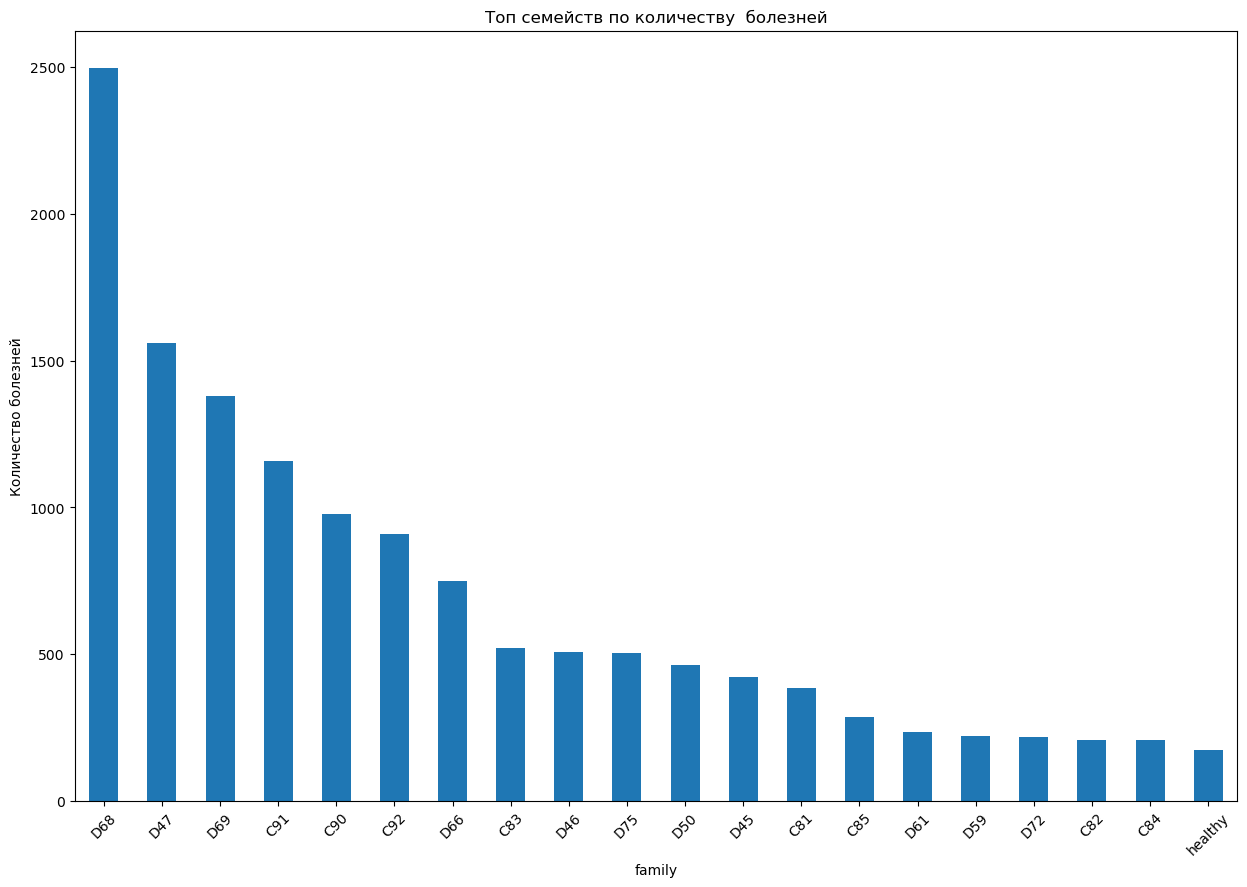

In [10]:
# Анализ распределения болезней по семействам
print("=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОЛЕЗНЕЙ ПО СЕМЕЙСТВАМ ===")

print(f"Всего болезней в данных: {data_train['disease']}")
print(f"Всего семейств в данных: {data_train['family']}")

diseases_with_family = data_train[data_train['family'].notna()]['disease'].unique()
print(f"\nБолезней, связанных с семействами: {len(diseases_with_family)}")


print(f"\n=== РАСПРЕДЕЛЕНИЕ ПО СЕМЕЙСТВАМ ===")
family_disease_counts = data_train.groupby('family')['disease'].count().sort_values(ascending=False)

print("Количество  болезней по семействам:")
print(family_disease_counts.head(15))  


plt.figure(figsize=(15, 10))

family_disease_counts.head(20).plot(kind='bar')
plt.title('Топ семейств по количеству  болезней')
plt.xticks(rotation=45)
plt.ylabel('Количество болезней')




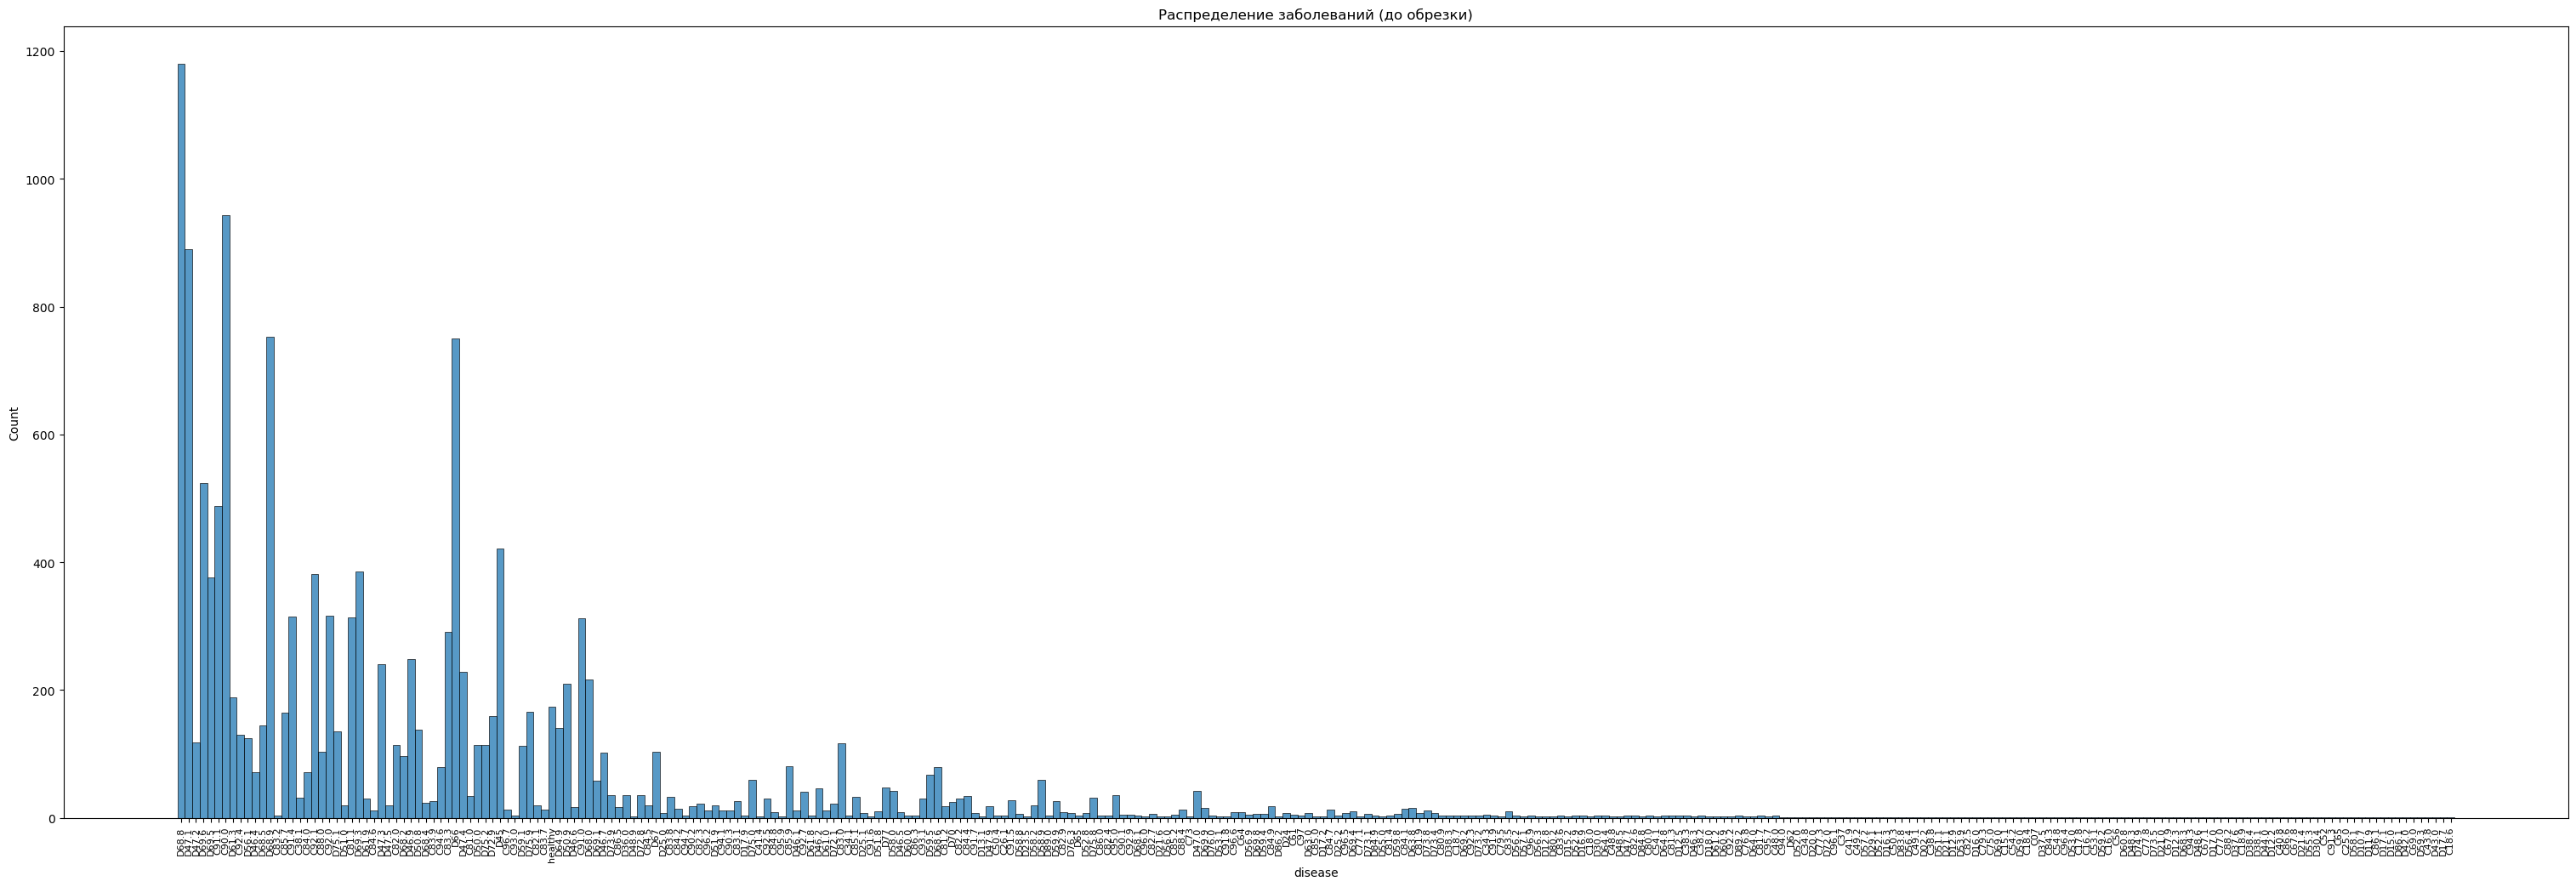

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(60, 20))

plt.subplot(2, 2, 1)
sns.histplot(data=data_train, x="disease")
plt.xticks(rotation=90, fontsize=8)
plt.title("Распределение заболеваний (до обрезки)")
plt.tight_layout()

plt.show()

## После обрезки 

=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОЛЕЗНЕЙ ПО СЕМЕЙСТВАМ после филтрования===
Всего болезней в данных: 0        D68.8
1        D47.1
2        D69.6
3        D69.5
4        C91.1
         ...  
11447    D68.8
11448      D66
11449    D68.9
11450    D46.9
11451    C91.1
Name: disease, Length: 11452, dtype: object
Всего семейств в данных: 0        D68
1        D47
2        D69
3        D69
4        C91
        ... 
11447    D68
11448    D66
11449    D68
11450    D46
11451    C91
Name: family, Length: 11452, dtype: object

Болезней, связанных с семействами: 32

=== РАСПРЕДЕЛЕНИЕ ПО СЕМЕЙСТВАМ после филтрования===
Количество уникальных болезней по семействам после филтрования:
family
D68        2295
D47        1359
D69        1286
C91        1115
C90         943
C92         827
D66         750
D45         422
D50         348
C81         314
D75         301
C83         291
D46         249
D61         189
healthy     174
Name: disease, dtype: int64


Text(0, 0.5, 'Количество после филтрования')

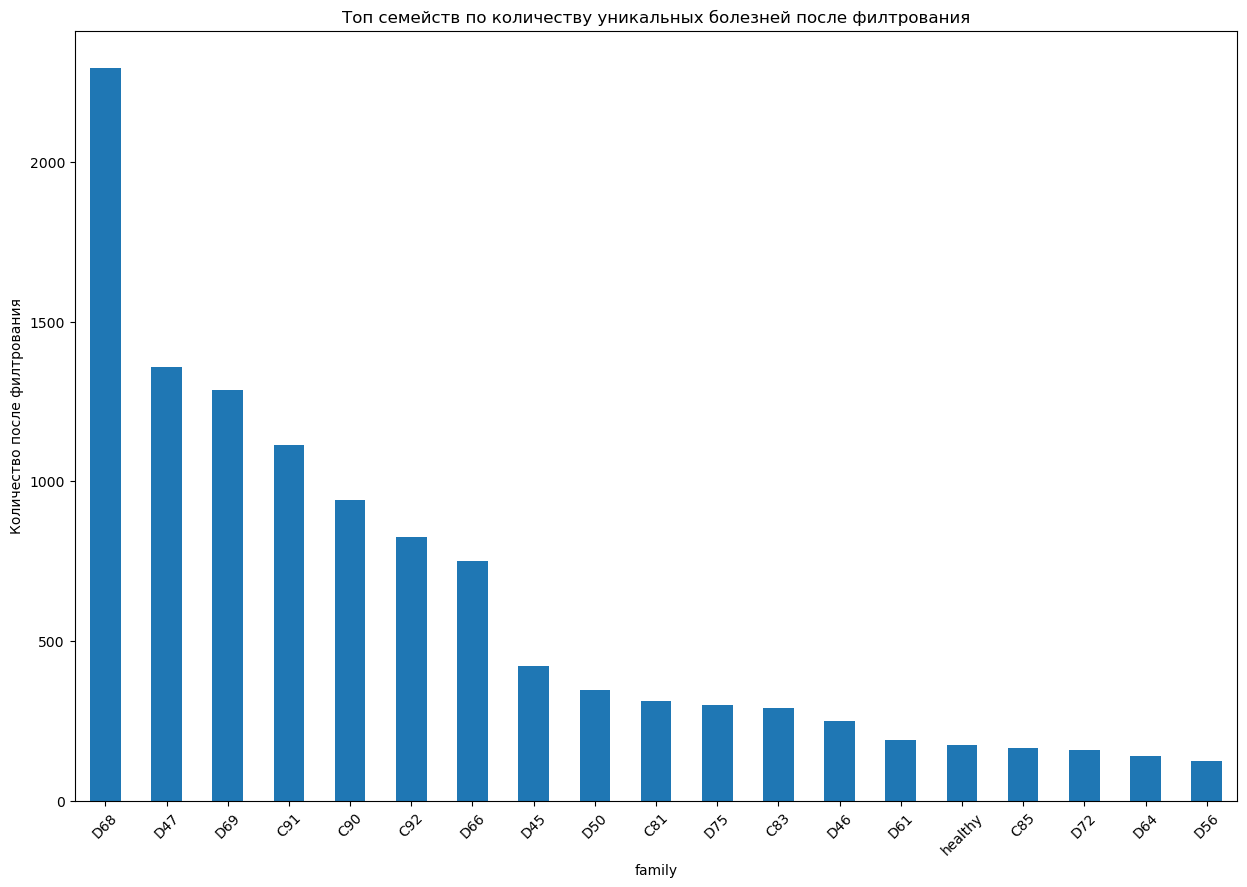

In [12]:
print("=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОЛЕЗНЕЙ ПО СЕМЕЙСТВАМ после филтрования===")

print(f"Всего болезней в данных: {data_final['disease']}")
print(f"Всего семейств в данных: {data_final['family']}")

diseases_with_family = data_final[data_final['family'].notna()]['disease'].unique()
print(f"\nБолезней, связанных с семействами: {len(diseases_with_family)}")


print(f"\n=== РАСПРЕДЕЛЕНИЕ ПО СЕМЕЙСТВАМ после филтрования===")
family_disease_counts_filter = data_final.groupby('family')['disease'].count().sort_values(ascending=False)

print("Количество уникальных болезней по семействам после филтрования:")
print(family_disease_counts_filter.head(15))  

plt.figure(figsize=(15, 10))

family_disease_counts_filter.head(20).plot(kind='bar')
plt.title('Топ семейств по количеству уникальных болезней после филтрования')
plt.xticks(rotation=45)
plt.ylabel('Количество после филтрования')



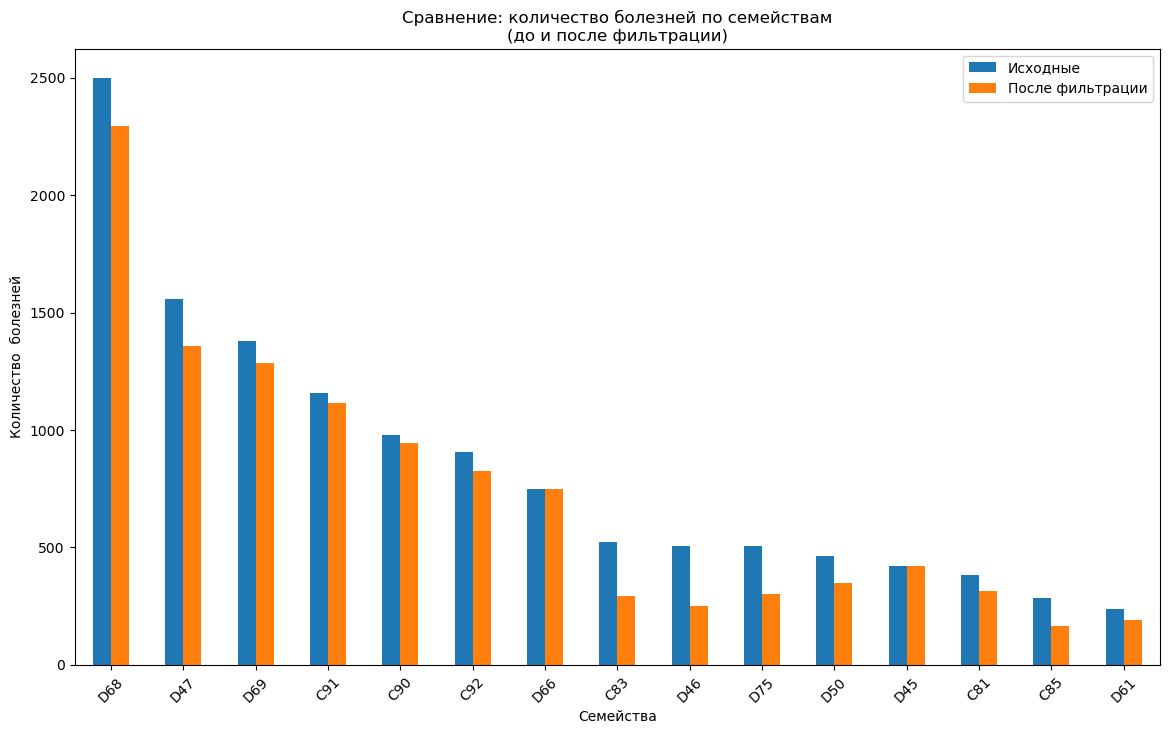

In [13]:

comparison_df = pd.DataFrame({
    'Исходные': family_disease_counts.head(15),
    'После фильтрации': family_disease_counts_filter.reindex(family_disease_counts.head(15).index).fillna(0)
})

comparison_df.plot(kind='bar', figsize=(14, 8))
plt.title('Сравнение: количество болезней по семействам\n(до и после фильтрации)')
plt.xlabel('Семейства')
plt.ylabel('Количество  болезней')
plt.xticks(rotation=45)
plt.legend()


- достаточно презентативно - поэтому оставляем фильтрацию

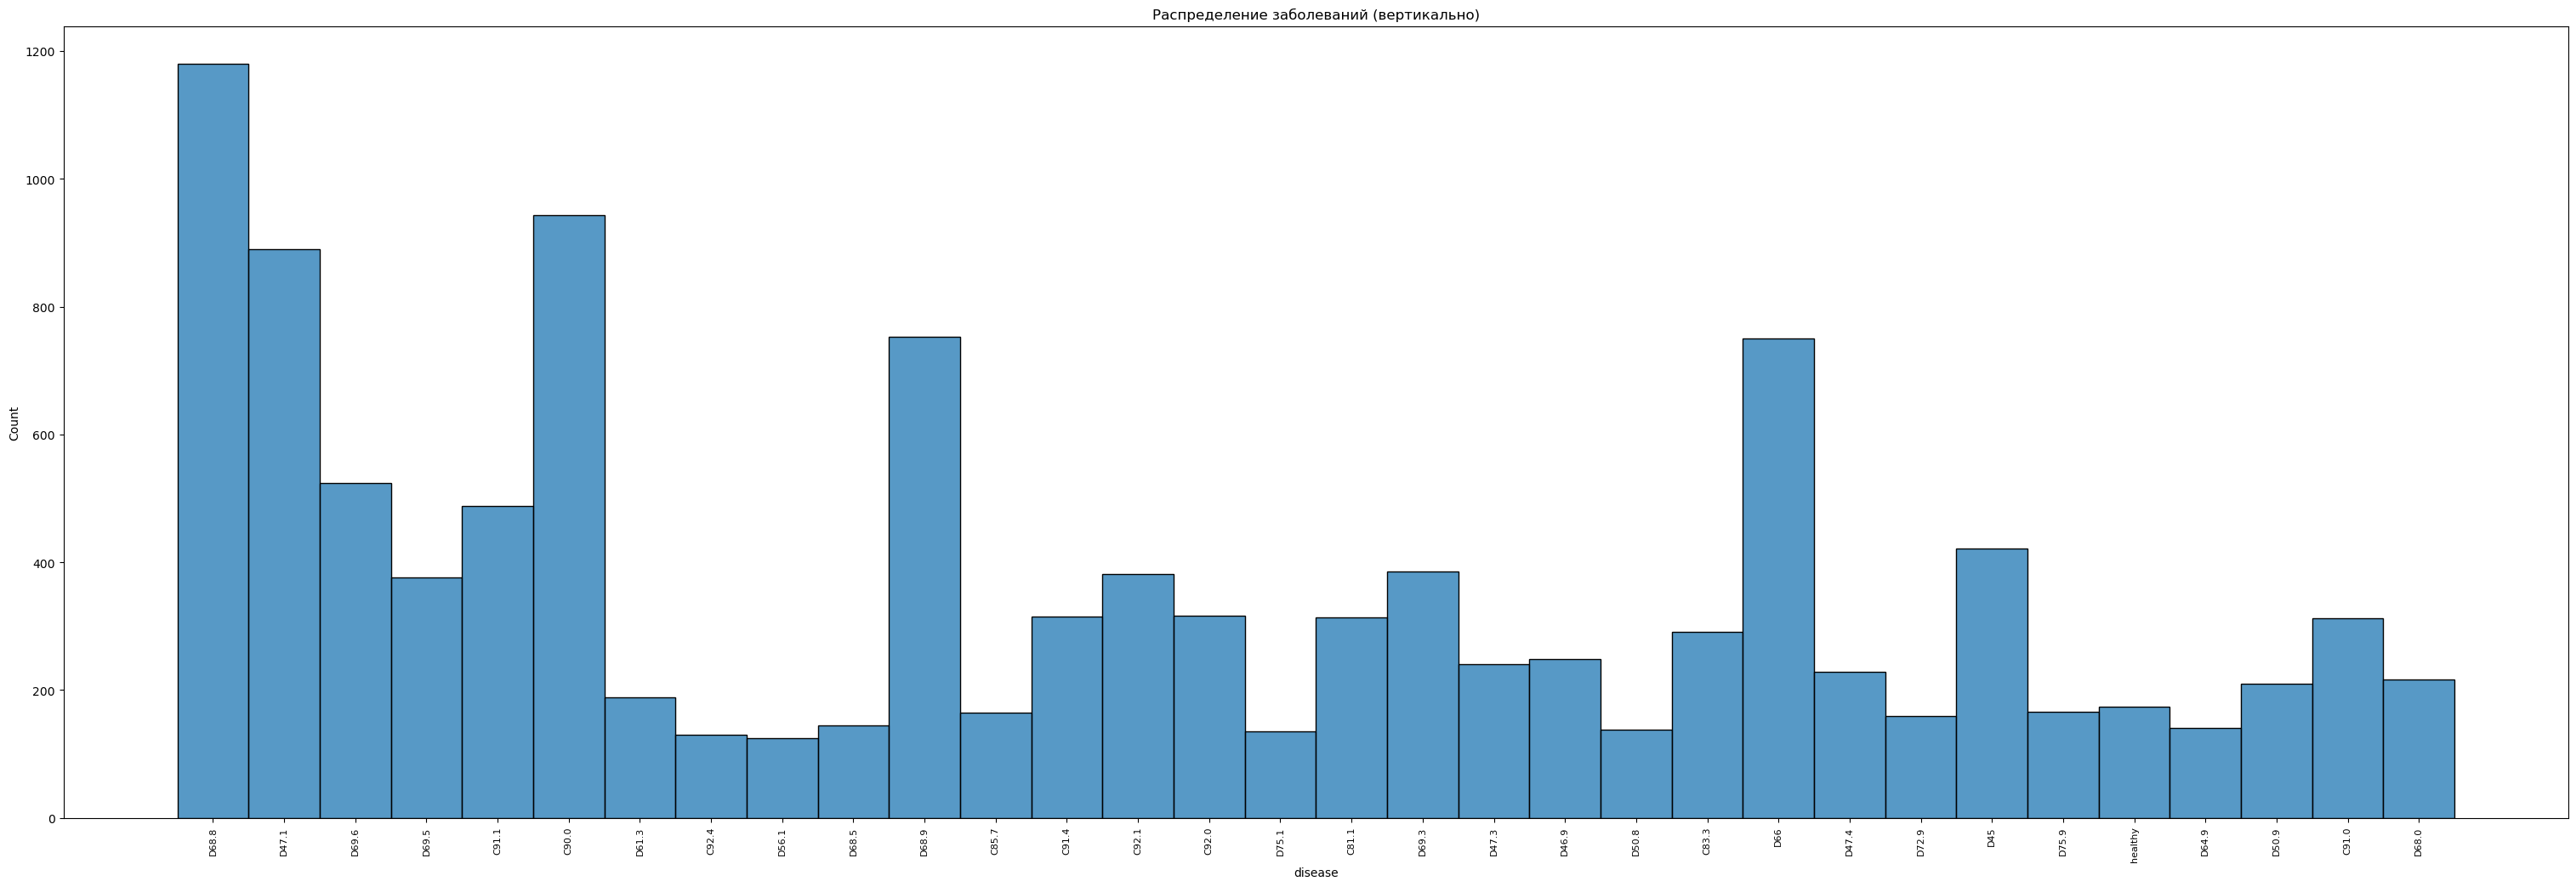

In [14]:


plt.figure(figsize=(60, 20))

plt.subplot(2, 2, 1)
sns.histplot(data=data_final, x="disease")
plt.xticks(rotation=90, fontsize=8)
plt.title("Распределение заболеваний (вертикально)")
plt.tight_layout()

plt.show()

In [15]:
import pickle
with open("./folds_indices_disease_clean.pkl", "rb") as f:
    folds_indices = pickle.load(f)
folds_indices

{'fold_0': [array([    1,     2,     4, ..., 11449, 11450, 11451]),
  array([    0,     3,     7, ..., 11441, 11443, 11444])],
 'fold_1': [array([    0,     1,     2, ..., 11447, 11448, 11449]),
  array([    4,     5,     6, ..., 11440, 11450, 11451])],
 'fold_2': [array([    0,     1,     2, ..., 11449, 11450, 11451]),
  array([    8,    14,    20, ..., 11437, 11446, 11448])],
 'fold_3': [array([    0,     1,     3, ..., 11449, 11450, 11451]),
  array([    2,    10,    15, ..., 11425, 11427, 11435])],
 'fold_4': [array([    0,     2,     3, ..., 11448, 11450, 11451]),
  array([    1,    12,    13, ..., 11445, 11447, 11449])]}

In [16]:
X_train_disease_df = pd.DataFrame(X_disease)
y_train_disease_df = pd.DataFrame(y_disease)


In [17]:
data_final["disease"].nunique()

32

In [18]:
data_train["disease"].nunique()

307

# Logger

In [19]:
import loguru
import logging
import sys
from datetime import datetime


def setup_logging(log_level=logging.INFO, log_file=None):

    formatter = logging.Formatter(
        "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
        datefmt="%Y-%m-%d %H:%M:%S",
    )

    logger = logging.getLogger("MLLetter")
    logger.setLevel(log_level)

    logger.handlers.clear()

    # without terminal processing

    return logger


logger = setup_logging(log_level=logging.INFO)

# Functions before training

In [20]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from typing import Tuple, Dict, List, Optional, Union, Any


def impute_train(
    X_train_balanced: pd.DataFrame, X_val: pd.DataFrame
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Impute missing values using KNN imputer for numeric features.

    Args:
        X_train_balanced: Training features after balancing
        X_val: Validation features

    Returns:
        Tuple of imputed training and validation data
    """

    numeric_features = [col for col in X_train_balanced.columns if col != "gender"]

    X_train_imputed = X_train_balanced.copy()
    X_val_imputed = X_val.copy()

    num_imputer = KNNImputer(n_neighbors=5, weights="uniform")

    X_train_imputed[numeric_features] = num_imputer.fit_transform(
        X_train_imputed[numeric_features]
    )
    X_val_imputed[numeric_features] = num_imputer.transform(
        X_val_imputed[numeric_features]
    )

    print("balanced_complete")

    return X_train_imputed, X_val_imputed


def balanced_train(
    X_train: pd.DataFrame, y_train: pd.DataFrame, 
    bias: int = 0, 
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Balance training data using combination of under and over sampling.

    Args:
        X_train: Training features
        y_train: Training target (DataFrame or Series)

    Returns:
        Tuple of balanced features and target
    """

    if isinstance(y_train, pd.DataFrame):
        if y_train.shape[1] == 1:
            y_train_series = y_train.iloc[:, 0]
        else:
            raise ValueError(f"y_train DataFrame should have 1 column, got {y_train.shape[1]}")
    else:
        y_train_series = y_train
    
    class_distribution = y_train_series.value_counts()
    target_samples = int(np.median(class_distribution.values) + bias)


    y_train_values = np.array(y_train_series).flatten()

    undersample_classes = {
        cls: target_samples
        for cls in np.unique(y_train_values)
        if (y_train_values == cls).sum() > target_samples
    }

    oversample_classes = {
        cls: target_samples
        for cls in np.unique(y_train_values)
        if (y_train_values == cls).sum() < target_samples
    }

    if undersample_classes:
        model_under = RandomUnderSampler(
            sampling_strategy=undersample_classes, random_state=42
        )
        X_temp, y_temp = model_under.fit_resample(X_train, y_train_values)
        if not isinstance(X_temp, pd.DataFrame):
            X_temp = pd.DataFrame(X_temp, columns=X_train.columns)
    else:
        X_temp, y_temp = X_train.copy(), y_train_values

    if oversample_classes:
        model_over = RandomOverSampler(
            sampling_strategy=oversample_classes, random_state=42
        )
        X_balanced, y_balanced = model_over.fit_resample(X_temp, y_temp)
        if not isinstance(X_balanced, pd.DataFrame):
            X_balanced = pd.DataFrame(X_balanced, columns=X_train.columns)
        if isinstance(y_train, pd.DataFrame):
            y_balanced = pd.DataFrame(y_balanced, columns=y_train.columns)
        else:
            y_balanced = pd.DataFrame(y_balanced)
    else:
        X_balanced = X_temp.copy()
        if isinstance(y_train, pd.DataFrame):
            y_balanced = pd.DataFrame(y_temp, columns=y_train.columns)
        else:
            y_balanced = pd.DataFrame(y_temp)

    return X_balanced, y_balanced

def add_noise_to_data(X, noise_ratio=0.05, random_state=42):
    """
    Normal noise for num feature
    
    Args:
        X: DataFrame 
        noise_ratio
        random_state
    """

    np.random.seed(random_state)
    X_noised = X.copy()

    numeric_cols = X.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        col_std = X[col].std()
        if col_std > 0:
            noise_std = col_std * noise_ratio
            noise = np.random.normal(0, noise_std, size=len(X))
            X_noised[col] = X[col] + noise
    
    return X_noised


def preprocessing_data_for_training(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    X_val: pd.DataFrame,
    y_val: pd.Series,
    use_onehot: bool = True,
    bias : int = 0, 
    noise: bool = False, 
    is_balanced: bool = True
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, LabelEncoder]:
    """
    Preprocessing pipeline for training data.

    Args:
        X_train: Training features
        y_train: Training target
        X_val: Validation features
        y_val: Validation target
        use_onehot: Whether to use one-hot encoding for categorical features

    Returns:
        Tuple of (X_train_balanced, y_train_balanced, X_val_processed,
                 y_val_encoded, label_encoder)
    """

    logger.info("START PREPROCESSING")

    try:

        X_train_processed = (
            X_train.drop("client_id", axis=1).copy()
            if "client_id" in X_train.columns
            else X_train.copy()
        )

        cols_to_convert = [col for col in X_train_processed.columns if col != "gender"]
        X_train_processed[cols_to_convert] = X_train_processed[cols_to_convert].apply(
            pd.to_numeric, errors="coerce"
        )

        X_val_processed = (
            X_val.drop("client_id", axis=1).copy()
            if "client_id" in X_val.columns
            else X_val.copy()
        )
        X_val_processed[cols_to_convert] = X_val_processed[cols_to_convert].apply(
            pd.to_numeric, errors="coerce"
        )

        if X_val is not None:
            X_val_processed = (
                X_val.drop("client_id", axis=1).copy()
                if "client_id" in X_val.columns
                else X_val.copy()
            )
            X_val_processed[cols_to_convert] = X_val_processed[cols_to_convert].apply(
                pd.to_numeric, errors="coerce"
            )
        else:
            X_val_processed = None

        if use_onehot:

            if "gender" in X_train_processed.columns.tolist():

                X_train_processed = pd.get_dummies(
                    X_train_processed, columns=["gender"], drop_first=True
                )
                X_val_processed = pd.get_dummies(
                    X_val_processed, columns=["gender"], drop_first=True
                )
                logger.info(f"One-Hot Encoding  - gender.")

            X_train_processed, X_val_processed = X_train_processed.align(
                X_val_processed, join="left", axis=1, fill_value=0
            )

        label_encoder = LabelEncoder()
        y_train_encoded = pd.DataFrame(label_encoder.fit_transform(y_train))
        y_val_encoded = pd.DataFrame(label_encoder.transform(y_val))

        if is_balanced:

            X_train_balanced, y_train_balanced = balanced_train(
                X_train_processed, y_train_encoded, bias
            )

        else: 
            X_train_balanced, y_train_balanced = X_train_processed, y_train_encoded

        if noise:
            X_train_balanced = pd.DataFrame(add_noise_to_data(X_train_balanced, noise_ratio=0.2, random_state=42))

        return (
            X_train_balanced,
            y_train_balanced,
            X_val_processed,
            y_val_encoded,
            label_encoder,
        )

    except Exception as e:
        logger.error(f"❌ Error with data preprocessing: {str(e)}", exc_info=True)
        raise

# Function after training

In [21]:
from sklearn.metrics import top_k_accuracy_score


def calculate_metrics(
    y_val: Union[pd.Series, np.ndarray],
    y_pred: Union[pd.Series, np.ndarray],
    y_proba: Optional[Union[pd.Series, np.ndarray]] = None,
    k_list: Optional[List[int]] = None,
) -> Dict[str, float]:
    """
    Calculate classification metrics.

    Args:
        y_val: True labels
        y_pred: Predicted labels
        y_proba: Predicted probabilities (for AUC and top-k accuracy)
        k_list: List of k values for top-k accuracy

    Returns:
        Dictionary with metric names and values
    """

    y_val = np.array(y_val).flatten()
    y_pred = np.array(y_pred).flatten()

    results = {
        "Accuracy": accuracy_score(y_val, y_pred),
        "F1-micro": f1_score(y_val, y_pred, average="micro"),
        "F1-macro": f1_score(y_val, y_pred, average="macro"),
        "Precision-micro": precision_score(y_val, y_pred, average="micro"),
        "Precision-macro": precision_score(y_val, y_pred, average="macro"),
        "Recall-micro": recall_score(y_val, y_pred, average="micro"),
        "Recall-macro": recall_score(y_val, y_pred, average="macro"),
    }

    if y_proba is not None:
        try:
            results["AUC-ROC"] = roc_auc_score(y_val, y_proba, multi_class="ovr")
        except Exception as e:
            print(f"AUC-ROC calculation failed: {e}")
            results["AUC-ROC"] = None
    else:
        results["AUC-ROC"] = None

    if y_proba is not None:
        for k in k_list:
            top_k = top_k_accuracy_score(y_val, y_proba, k=k)
            results[f"top_{k}_accuracy"] = top_k

    return results


# Calculate confusion matrix
def draw_confusion_matrix(
    y_val: List[Union[pd.Series, np.ndarray]],
    y_pred: List[Union[pd.Series, np.ndarray]],
    classes: Union[List[str], np.ndarray],
    n_splits: int,
    name_model: str,
    bias, 
    noise
) -> None:
    """
    Draw confusion matrices for multiple folds.

    Args:
        y_val: List of true labels for each fold
        y_pred: List of predicted labels for each fold
        classes: List of class names
        n_splits: Number of folds (subplots)
        name_model: Model name for title
    """

    fig, axs = plt.subplots(ncols=n_splits, figsize=(40, 10))
    
    all_fold_matrices = []

    for fold_idx, (ax, y_val_fold, y_pred_fold) in enumerate(zip(axs, y_val, y_pred)):
        conf_matrix = confusion_matrix(y_val_fold, y_pred_fold)
        all_fold_matrices.append(conf_matrix)

        conf_matrix_normalized = (
            conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]
        )
        conf_matrix_normalized = np.round(conf_matrix_normalized, 2)

        class_counts = conf_matrix.sum(axis=1)

        y_ticklabels = []
        for i, class_name in enumerate(classes):
            y_ticklabels.append(f"{class_name}\n({class_counts[i]})")

        sns.heatmap(
            conf_matrix_normalized,
            vmax=1.0,
            annot=True,
            fmt=".2f",
            cmap="Blues",
            cbar=True,
            linewidths=0.5,
            linecolor="black",
            xticklabels=classes,
            yticklabels=y_ticklabels,
            ax=ax,
        )

        ax.set_title(f"Fold {fold_idx + 1}")
        ax.set_xlabel("Predicted Label")
        if fold_idx == 0:
            ax.set_ylabel("True Label")

    fig.suptitle(f"Confusion Matrix for {name_model} with Bias {bias} in balanced in {noise}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    if all_fold_matrices: 
        sum_cm = np.sum(all_fold_matrices, axis=0)
        
        sum_cm_normalized = sum_cm.astype("float") / sum_cm.sum(axis=1)[:, np.newaxis]
        sum_cm_normalized = np.round(sum_cm_normalized, 2)
        
        plt.figure(figsize=(12, 10))
        
        class_counts_total = sum_cm.sum(axis=1)
        y_ticklabels_total = []
        for i, class_name in enumerate(classes):
            y_ticklabels_total.append(f"{class_name}\n(total: {class_counts_total[i]})")
        
        sns.heatmap(
            sum_cm_normalized,
            annot=True,
            fmt=".2f",
            cmap="Blues",
            xticklabels=classes,
            yticklabels=y_ticklabels_total,
            cbar_kws={'label': 'Normalized Ratio'}
        )
        
        plt.title(f'Overall Confusion Matrix for {name_model}\n(Bias: {bias}, Noise: {noise})', fontsize=14, pad=20)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        

        for i in range(len(classes)):
            for j in range(len(classes)):
                plt.text(j + 0.5, i + 0.3, f'({sum_cm[i, j]})', 
                        ha='center', va='center', fontsize=9, color='red')
        
        plt.tight_layout()
        plt.show()
        
   
        plt.figure(figsize=(12, 10))
        sns.heatmap(
            sum_cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes,
            cbar_kws={'label': 'Count'}
        )
        plt.title(f'Absolute Confusion Matrix for {name_model}\n(Bias: {bias}, Noise: {noise})', fontsize=14, pad=20)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()
        
        print(f"\n=== OVERALL METRICS for {name_model} ===")
        print(f"Total samples: {np.sum(sum_cm)}")
        
        overall_accuracy = np.trace(sum_cm) / np.sum(sum_cm)
        print(f"Overall Accuracy: {overall_accuracy:.4f}")
        
        from sklearn.metrics import classification_report
        
        all_y_true = np.concatenate(y_val)
        all_y_pred = np.concatenate(y_pred)
        
        print("\nDetailed Classification Report:")
        print(classification_report(all_y_true, all_y_pred, target_names=classes))

# Decorator for validation

In [22]:
import hashlib
import pandas as pd
from functools import wraps


def data_integrity_check(func):
    """Decorator for checking the integrity of input data"""

    @wraps(func)
    def wrapper(X, y, *args, **kwargs):
        original_hashes = {
            "X_hash": get_data_hash(X),
            "y_hash": get_data_hash(y),
            "X_shape": X.shape if hasattr(X, "shape") else len(X),
            "y_shape": y.shape if hasattr(y, "shape") else len(y),
        }

        result = func(X, y, *args, **kwargs)

        current_hashes = {
            "X_hash": get_data_hash(X),
            "y_hash": get_data_hash(y),
            "X_shape": X.shape if hasattr(X, "shape") else len(X),
            "y_shape": y.shape if hasattr(y, "shape") else len(y),
        }

        if original_hashes != current_hashes:
            raise ValueError("The integrity of the input data is broken!")
        else:
            print(f"{func.__name__} not change")
        return result

    return wrapper


def get_data_hash(data):
    if isinstance(data, pd.DataFrame) or isinstance(data, pd.Series):
        return hashlib.md5(pd.util.hash_pandas_object(data).values).hexdigest()
    elif isinstance(data, np.ndarray):
        return hashlib.md5(data.tobytes()).hexdigest()
    else:
        return hashlib.md5(str(data).encode()).hexdigest()

# Cross-validation

In [23]:
from model_configs import MODEL_CONFIGS
import xgboost as xgb
from scipy.special import softmax  

@data_integrity_check
def models_cross_validation(
    X: pd.DataFrame,
    y: pd.Series,
    models: Dict[str, Any],
    folds_indices: str,
    cat_features: List[str] = None,
    n_splits: int = 5,
    is_imputation: bool = True,
    params: Optional[Dict[str, Any]] = None,
    bias: int = 0, 
    noise: bool = False, 
    draw_matrix: bool = False,
    is_balanced: bool = True
) -> Tuple[
    Dict[str, List[Any]], pd.DataFrame, Dict[int, Dict[str, Any]], List[Dict[str, Any]]
]:
    """
    Perform cross-validation for multiple models with XGBoost native API support.
    """

    cv = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

    results = []
    model_list = {}
    cv_splits_dict = {}
    shap_data_list = []

    for name, model_class in models.items():

        if params:
            config = params
        elif name not in MODEL_CONFIGS:
            print(f"Model_config not found for {name}, use default params")
            config = {
                "params": {"random_state": 42},
                "needs_cat_features": False,
                "use_onehot": True,
                "needs_imputation": True,
                "use_eval_set": False,
                "use_native_api": False,  
            }
        else:
            config = MODEL_CONFIGS[name]

        fold_models = []
        y_val_list = []
        y_pred_list = []
        model_classes = None

        for fold_idx in tqdm(range(n_splits), desc=f"{name} Cross-Validation"):

            fold_key = f"fold_{fold_idx}"
            
            if fold_key not in folds_indices:
                print(f"Warning: Fold {fold_key} not found in folds_indices")
                continue
                
            fold_data = folds_indices[f"fold_{fold_idx}"]  
            train_idx = fold_data[0]  
            val_idx = fold_data[1]  
            
            if hasattr(train_idx, 'tolist'):
                train_idx_list = [int(x) for x in train_idx.tolist()]
            elif isinstance(train_idx, (list, tuple)):
                train_idx_list = [int(x) for x in train_idx]
            else:
                train_idx_list = [int(train_idx)]
                
            if hasattr(val_idx, 'tolist'):
                val_idx_list = [int(x) for x in val_idx.tolist()]
            elif isinstance(val_idx, (list, tuple)):
                val_idx_list = [int(x) for x in val_idx]
            else:
                val_idx_list = [int(val_idx)]

            cv_splits_dict.setdefault(
                fold_idx,
                {
                    "train_idx": train_idx_list,
                    "val_idx": val_idx_list,
                    "train_size": len(train_idx_list),
                    "val_size": len(val_idx_list),
                },
            )

            X_train, y_train = X.iloc[train_idx_list], y.iloc[train_idx_list]
            X_val, y_val = X.iloc[val_idx_list], y.iloc[val_idx_list]

            X_train_imp, X_val_imp = X_train, X_val

            (
                X_train_balanced,
                y_train_balanced,
                X_val_preprocessed,
                y_val_preprocessed,
                label_encoder,
            ) = preprocessing_data_for_training(
                X_train_imp, y_train, X_val_imp, y_val, 
                use_onehot=config["use_onehot"], bias=bias, noise=noise, is_balanced=is_balanced
            )

            X_train_final, X_val_final = X_train_balanced, X_val_preprocessed

            model_params = config["params"].copy()  if "params" in config else {}

            use_native_api = config.get("use_native_api", False)
            
            if use_native_api and name == "XGBoost":
                X_train_native = X_train_final.copy()
                X_val_native = X_val_final.copy()
                
                for col in X_train_native.select_dtypes(include=['object']).columns:
                    X_train_native[col] = X_train_native[col].astype('category')
                    X_val_native[col] = X_val_native[col].astype('category')

                dtrain = xgb.DMatrix(
                    X_train_native,  
                    label=y_train_balanced, 
                    enable_categorical=True
                )
                dval = xgb.DMatrix(
                    X_val_native, 
                    label=y_val_preprocessed, 
                    enable_categorical=True
                )
                
                num_boost_round = model_params.pop("n_estimators", 1000)
                early_stopping_rounds = model_params.pop("early_stopping_rounds", 20)
                

                focal_loss_instance = config.get("focal_loss_instance")
                if focal_loss_instance:
                    model_instance = xgb.train(
                        model_params,
                        dtrain,
                        num_boost_round=num_boost_round,
                        evals=[(dval, 'validation')],
                        early_stopping_rounds=early_stopping_rounds,
                        obj=focal_loss_instance.focal_loss_objective,
                        custom_metric=focal_loss_instance.compute_loss_value,  
                        verbose_eval=False
                    )
                else:
                    model_instance = xgb.train(
                        model_params,
                        dtrain,
                        num_boost_round=num_boost_round,
                        evals=[(dval, 'validation')],
                        early_stopping_rounds=early_stopping_rounds,
                        verbose_eval=False
                    )

                y_pred_raw = model_instance.predict(dval)
                n_samples = len(y_val_preprocessed)
                n_classes = model_params.get("num_class", len(np.unique(y_train_balanced)))

                if len(y_pred_raw) == n_samples * n_classes:
                    y_pred_matrix = y_pred_raw.reshape(n_samples, n_classes)
                    y_proba = softmax(y_pred_matrix, axis=1) 
                    y_pred = np.argmax(y_proba, axis=1)
                else:
                    y_pred = np.round(y_pred_raw).astype(int)
                    y_proba = None
                    
                y_pred = y_pred.astype(int)
                                
            else:
                # For catboost
                if config["needs_cat_features"]:
                    model_params["cat_features"] = cat_features

                model_instance = model_class(**model_params)

                if config["use_eval_set"]:
                    if name == "CatBoost":
                        train_data = Pool(
                            X_train_final, y_train_balanced, cat_features=cat_features
                        )
                        val_data = Pool(
                            X_val_final, y_val_preprocessed, cat_features=cat_features
                        )
                        model_instance.fit(train_data, eval_set=val_data, verbose=False)
                    else:
                        model_instance.fit(
                            X_train_final,
                            y_train_balanced,
                            eval_set=[(X_val_final, y_val_preprocessed)],
                            verbose=False,
                        )
                else:
                    model_instance.fit(X_train_final, y_train_balanced)

                y_pred = model_instance.predict(X_val_final)
                y_proba = (
                    model_instance.predict_proba(X_val_final)
                    if hasattr(model_instance, "predict_proba")
                    else None
                )

            if model_classes is None:
                model_classes = label_encoder.classes_

            if not hasattr(model_instance, "classes_") or model_instance.classes_ is None:
                model_instance.classes_ = model_classes

            y_val_list.append(y_val_preprocessed)
            y_pred_list.append(y_pred)

            metrics = calculate_metrics(
                y_val_preprocessed, y_pred, y_proba, k_list=[2, 3, 5]
            )
            metrics["model"] = name
            metrics["fold"] = fold_idx + 1
            results.append(metrics)

            fold_models.append(model_instance)

            if config.get("shap", False):
                try:
                    if use_native_api and name == "XGBoost":
                        explainer = shap.TreeExplainer(model_instance)
                        shap_values = explainer.shap_values(X_val_final)
                    else:
                        explainer = shap.TreeExplainer(model_instance)
                        shap_values = explainer.shap_values(X_val_final)

                    shap_data = {
                        "model_name": name,
                        "fold": fold_idx,
                        "shap_values": shap_values,
                        "X_val": X_val_final,
                        "feature_names": X_val_final.columns.tolist(),
                        "label_encoder": label_encoder,
                        "classes": model_classes,
                    }
                    shap_data_list.append(shap_data)
                except Exception as e:
                    print(f"SHAP failed for {name} fold {fold_idx}: {e}")

        model_list[name] = fold_models
        if draw_matrix:
            draw_confusion_matrix(y_val_list, y_pred_list, model_classes, n_splits, name, bias, noise)

    return model_list, pd.DataFrame(results), cv_splits_dict, shap_data_list

## Training

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# models = {
#     "LogisticRegression": LogisticRegression,
#     "RandomForest": RandomForestClassifier,
#     "SVM": SVC,
#     "CatBoost": CatBoostClassifier,
#     "XGBoost": XGBClassifier,
#     "LightGBM": LGBMClassifier,
# }

# models = {
#     "CatBoost": CatBoostClassifier,
#     "XGBoost": XGBClassifier,
#     "LightGBM": LGBMClassifier,
# }

models = {
    "CatBoost": CatBoostClassifier,
    "XGBoost": XGBClassifier,
}

In [25]:
def analyze_bias_results(result_balanced):

    metrics_summary = []
    
    for bias, (trained_models, results, cv_dict, shap_data_list) in result_balanced.items():

        avg_metrics = results.groupby('model').mean(numeric_only=True).reset_index()
        avg_metrics['bias'] = bias

        metrics_summary.append(avg_metrics)

    all_metrics = pd.concat(metrics_summary, ignore_index=True)
    
    return all_metrics

def plot_bias_impact(metrics_df):

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    metric = 'F1-macro'

    for model in metrics_df['model'].unique():
        model_data = metrics_df[metrics_df['model'] == model]
        model_data = model_data.sort_values("bias")
        ax.plot(model_data['bias'], model_data[metric], 
                    marker='o', linewidth=2, markersize=8, label=model)
        
        for idx, row in model_data.iterrows():
            ax.annotate(f'{row[metric]:.3f}', 
                            (row['bias'], row[metric]),
                            textcoords="offset points",
                            xytext=(0,10), ha='center', fontsize=8)
        
    ax.set_xlabel('Bias')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Bias')
    ax.legend()
    ax.grid(True, alpha=0.3)
                
                
    plt.tight_layout()
    plt.show()
        

In [26]:
y_train_disease_df

disease
0       D68.8
1       D47.1
2       D69.6
3       D69.5
4       C91.1
...       ...
11447   D68.8
11448     D66
11449   D68.9
11450   D46.9
11451   C91.1

[11452 rows x 1 columns]

 # Best bias  

In [ ]:
list(range(-1000, 1000, 500))

[-1000, -500, 0, 500]

: 

In [ ]:
bias_list = list(range(0, 1000, 250))
result_balanced = {}


for bias in bias_list:
    trained_models_disease, results_disease, cv_dict_disease, shap_data_list_disease = models_cross_validation(
    X=X_train_disease_df, y=y_train_disease_df, models=models, folds_indices=folds_indices, n_splits=5, bias=bias, noise=True, draw_matrix=False)
    result_balanced[bias] = (trained_models_disease, results_disease, cv_dict_disease, shap_data_list_disease)


CatBoost Cross-Validation:  60%|██████    | 3/5 [00:22<00:15,  7.51s/it]

In [ ]:
y_train_disease_df.nunique()

disease    32
dtype: int64

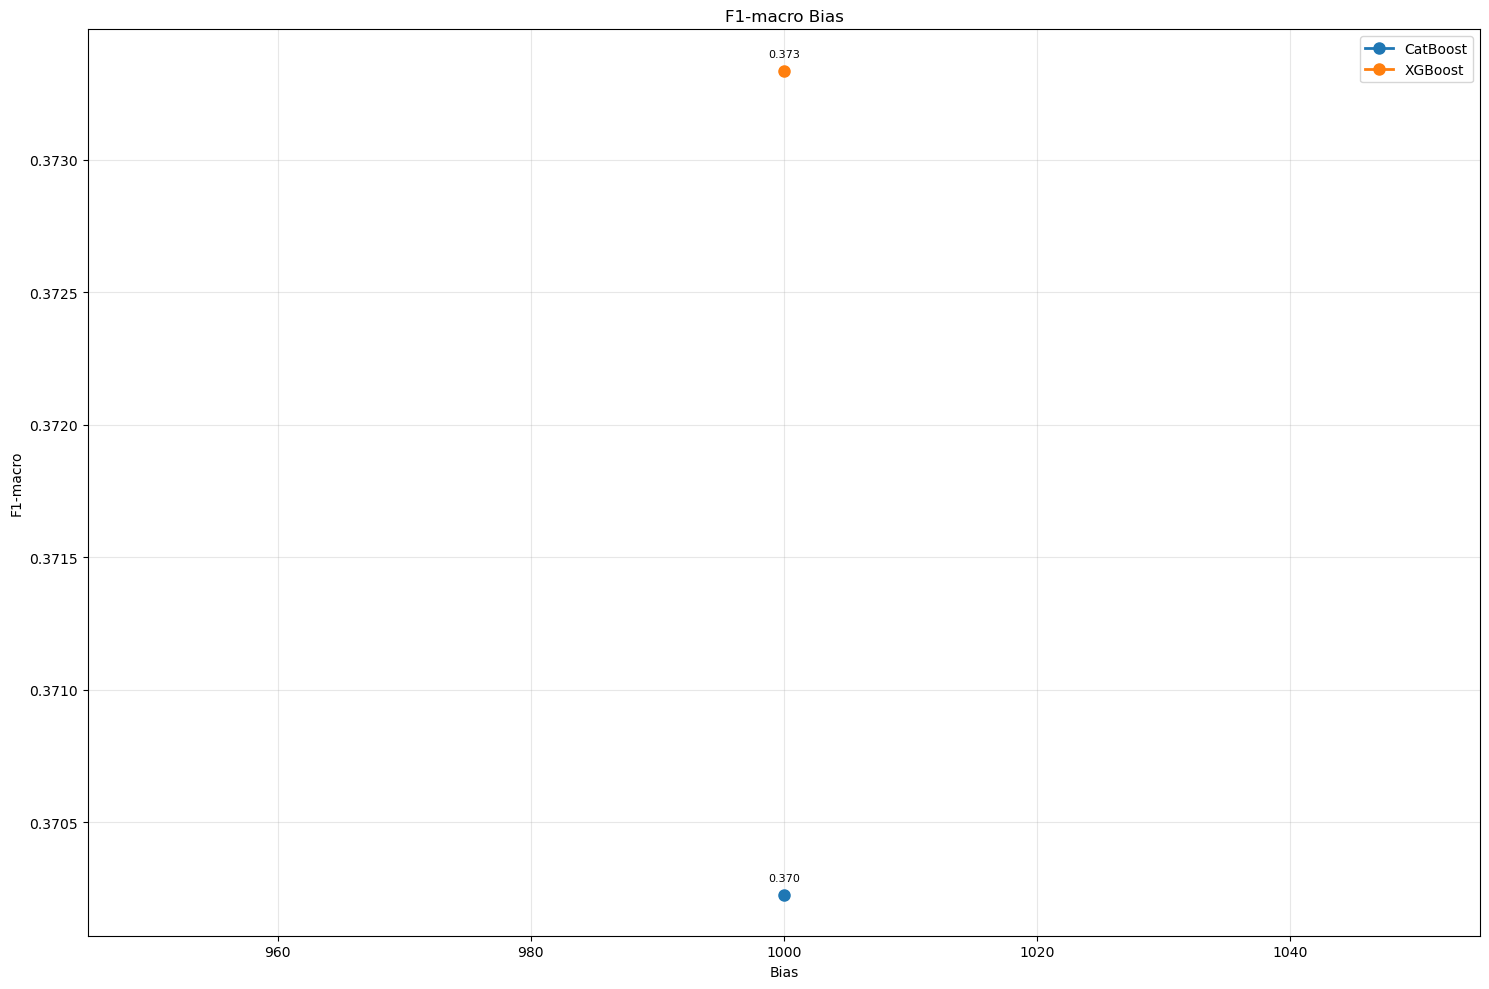

In [ ]:
metrics_df = analyze_bias_results(result_balanced)
plot_bias_impact(metrics_df)


In [ ]:
metrics_df[metrics_df["F1-macro"] == metrics_df["F1-macro"].max()]

model  Accuracy  F1-micro  F1-macro  Precision-micro  Precision-macro  \
1  XGBoost  0.793798  0.793798  0.705847         0.793798         0.701045   

   Recall-micro  Recall-macro   AUC-ROC  top_2_accuracy  top_3_accuracy  \
1      0.793798      0.715456  0.910256        0.992519             1.0   

   top_5_accuracy  fold  bias  
1             1.0   3.0   800

# With Noise 

CatBoost Cross-Validation: 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]


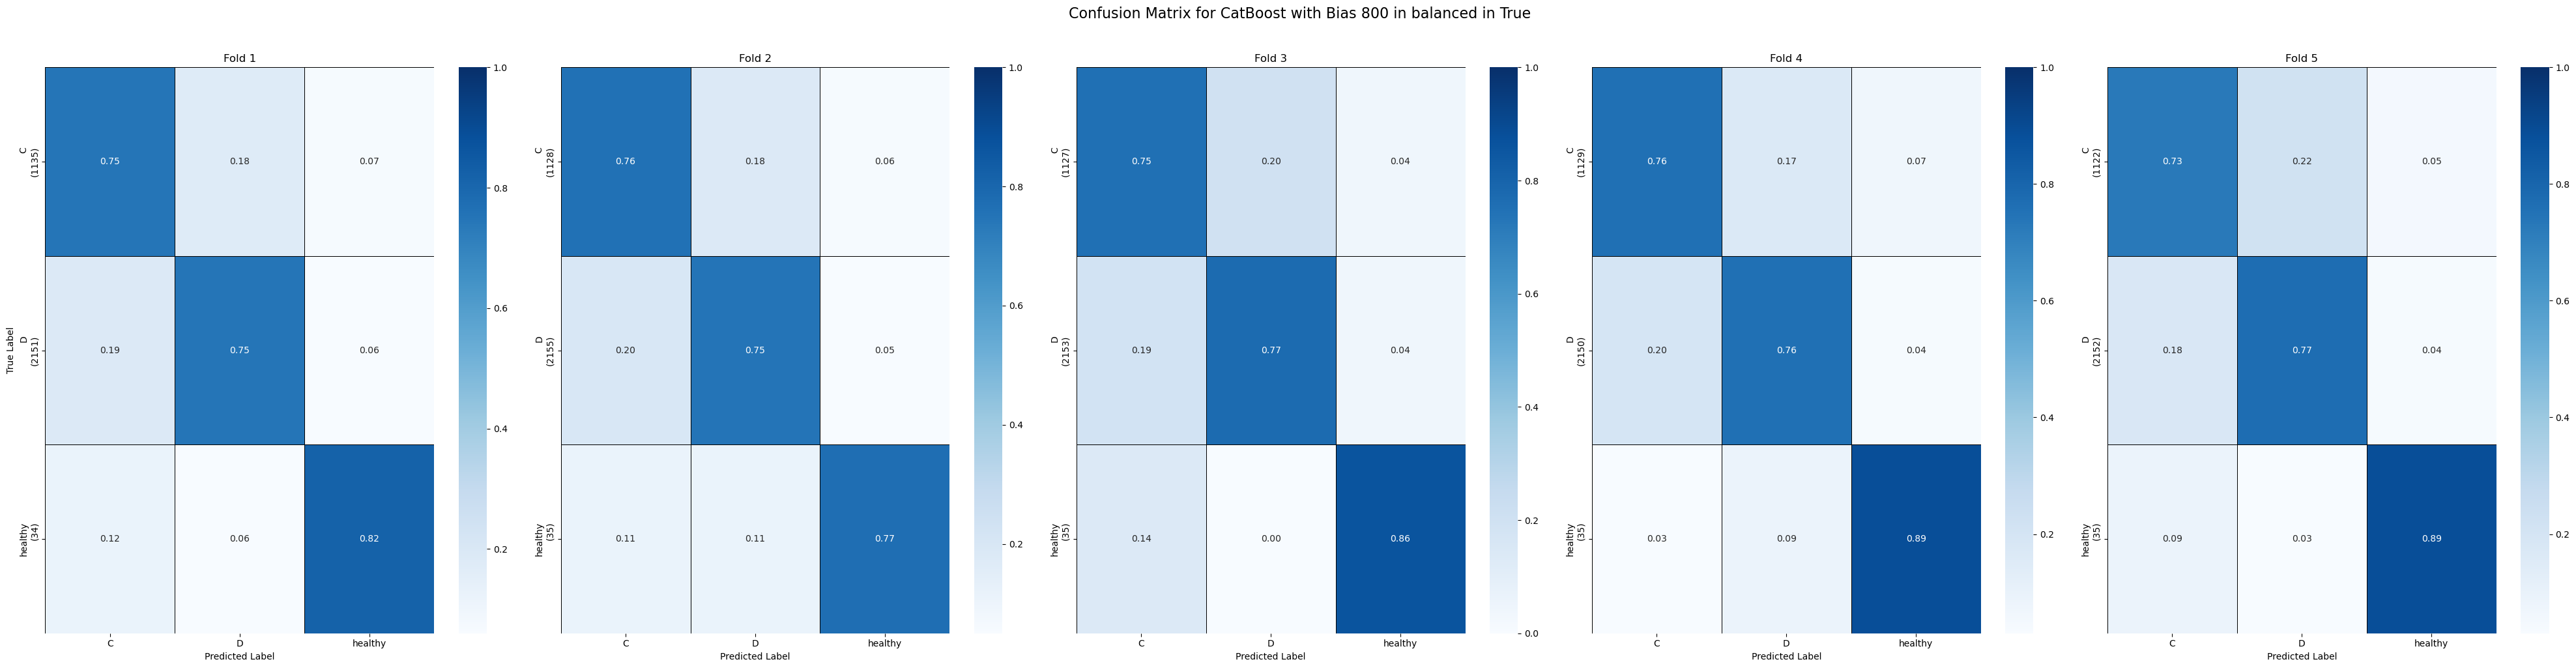

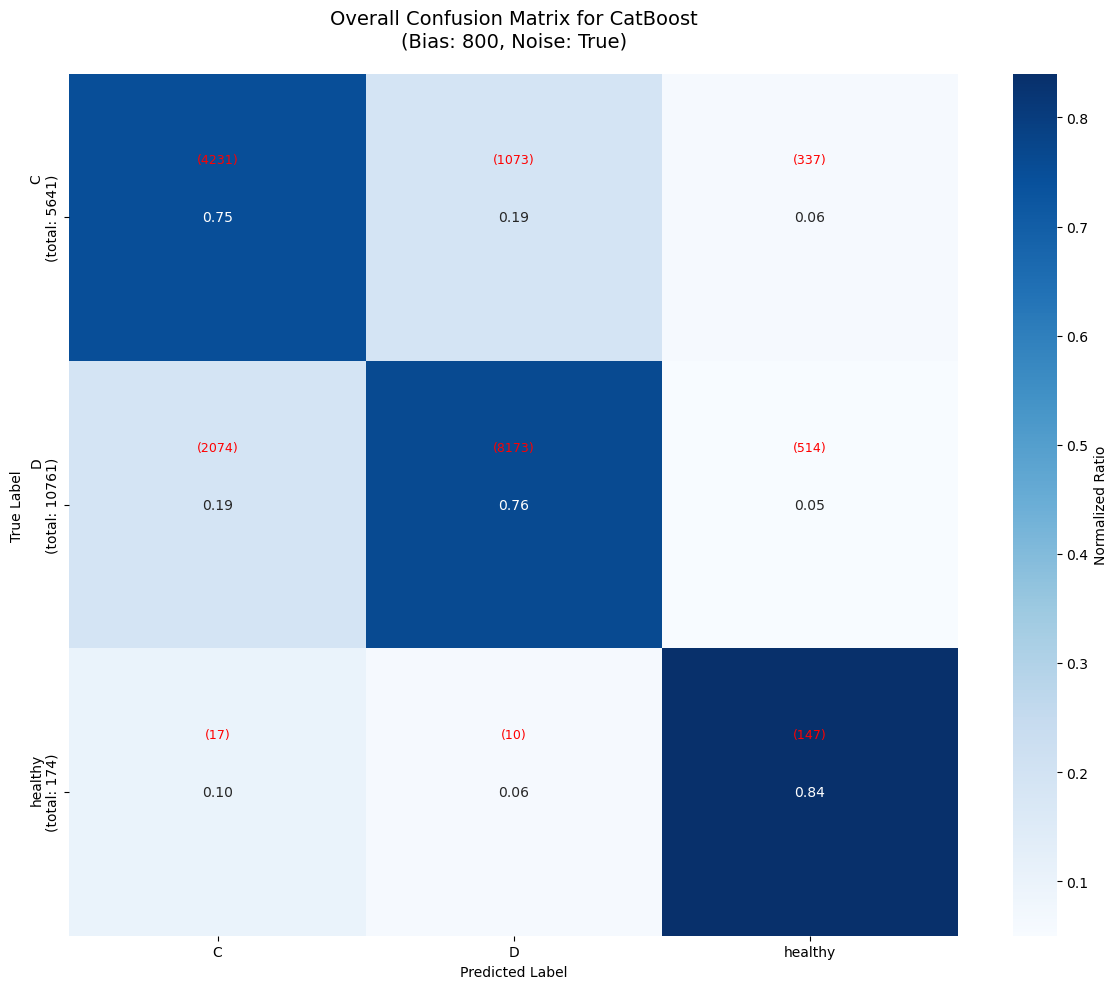

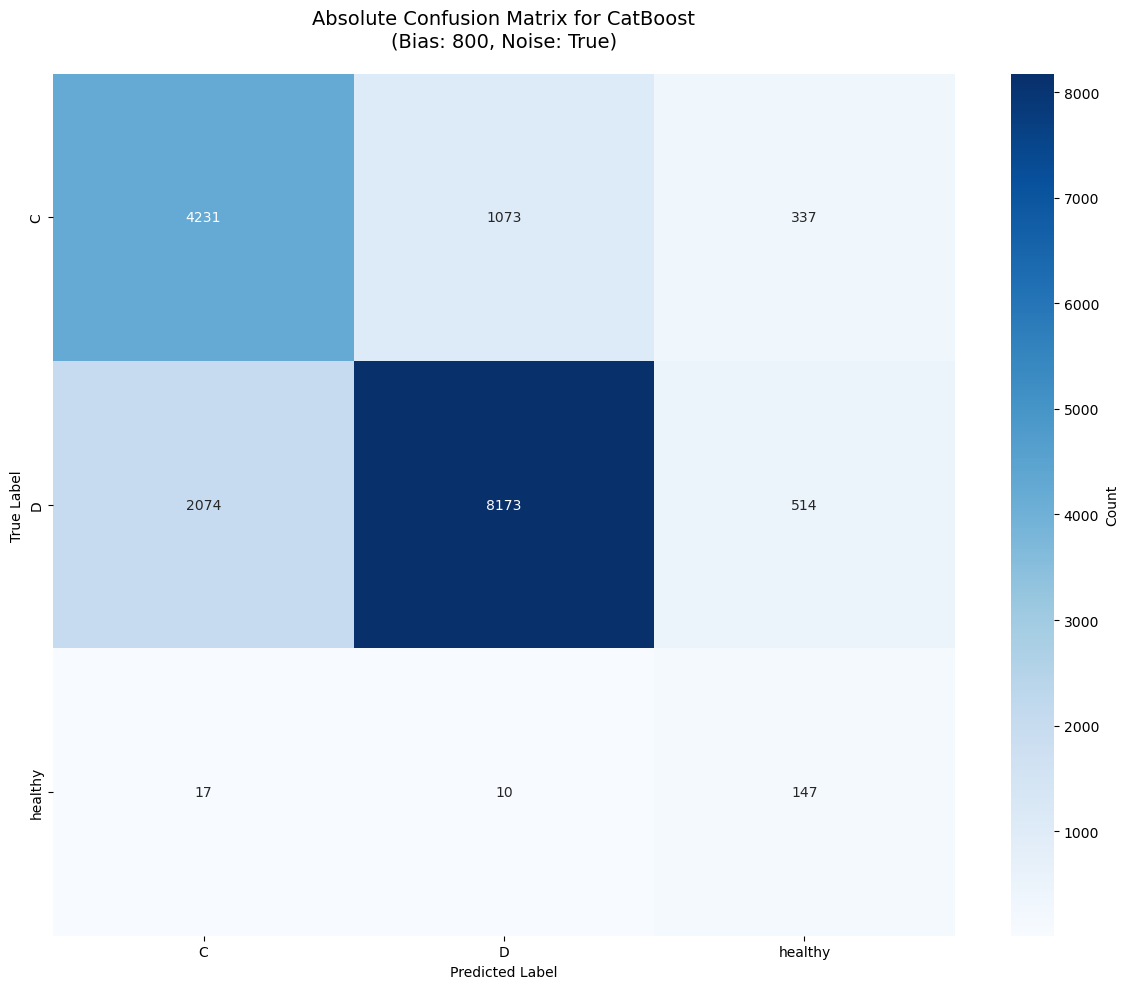


=== OVERALL METRICS for CatBoost ===
Total samples: 16576
Overall Accuracy: 0.7572

Detailed Classification Report:
              precision    recall  f1-score   support

           C       0.67      0.75      0.71      5641
           D       0.88      0.76      0.82     10761
     healthy       0.15      0.84      0.25       174

    accuracy                           0.76     16576
   macro avg       0.57      0.78      0.59     16576
weighted avg       0.80      0.76      0.77     16576



XGBoost Cross-Validation: 100%|██████████| 5/5 [00:11<00:00,  2.27s/it]


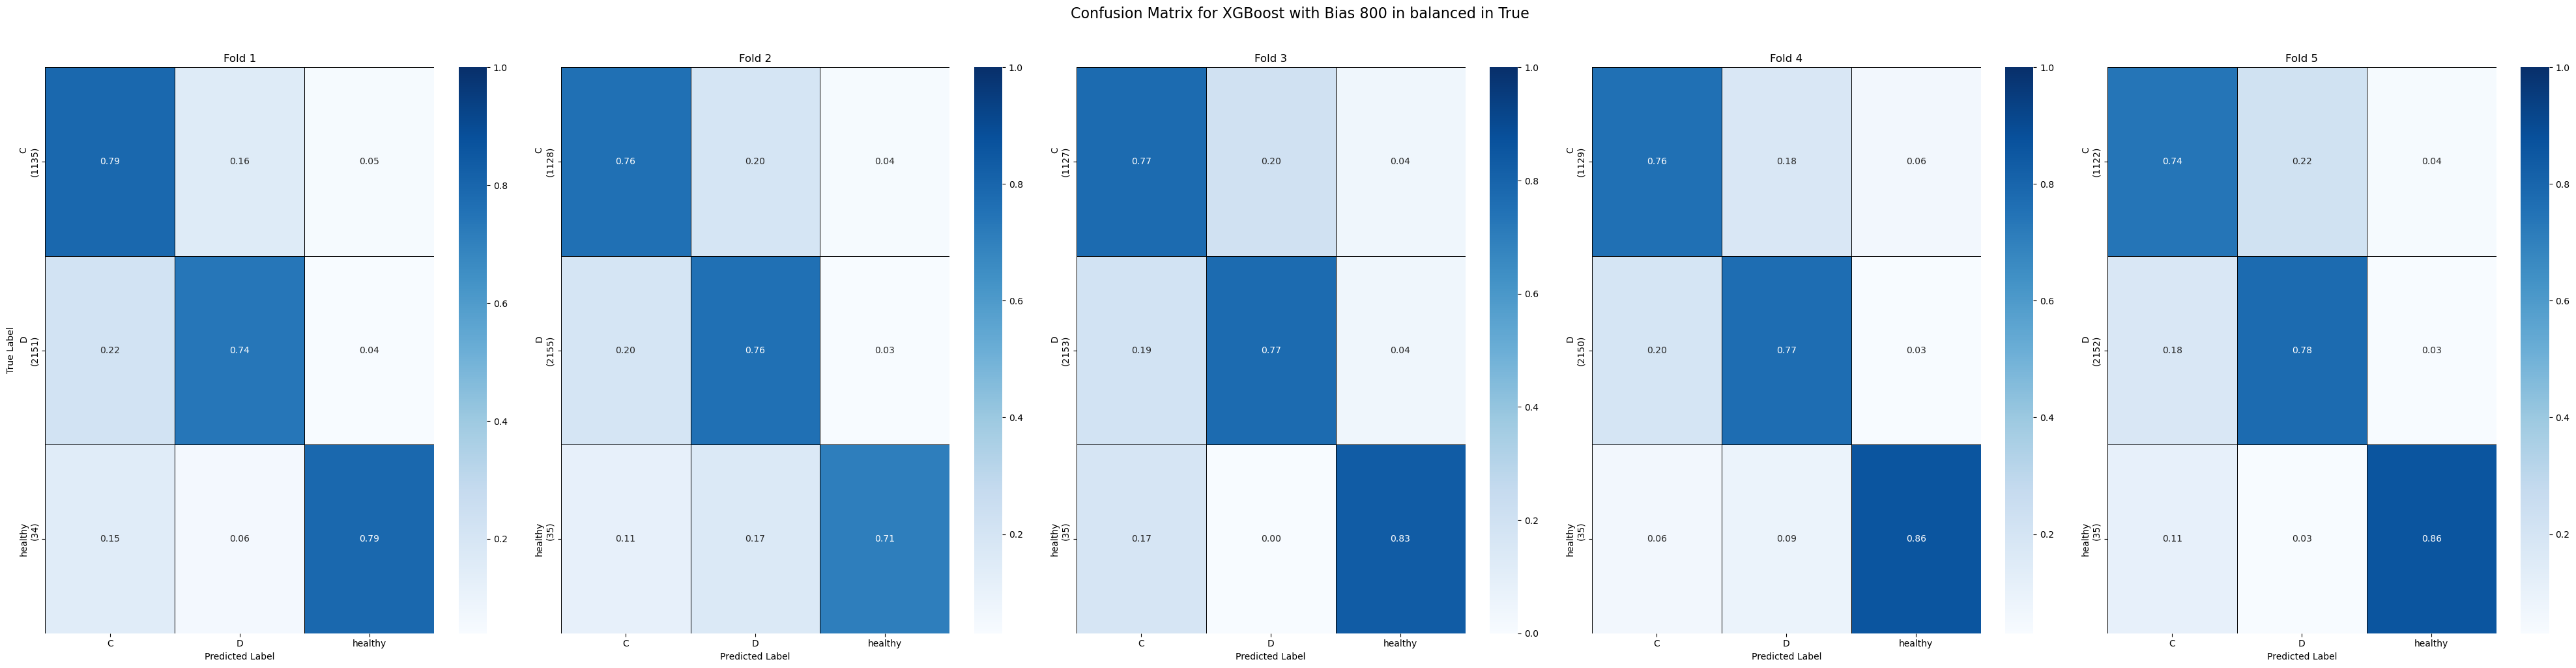

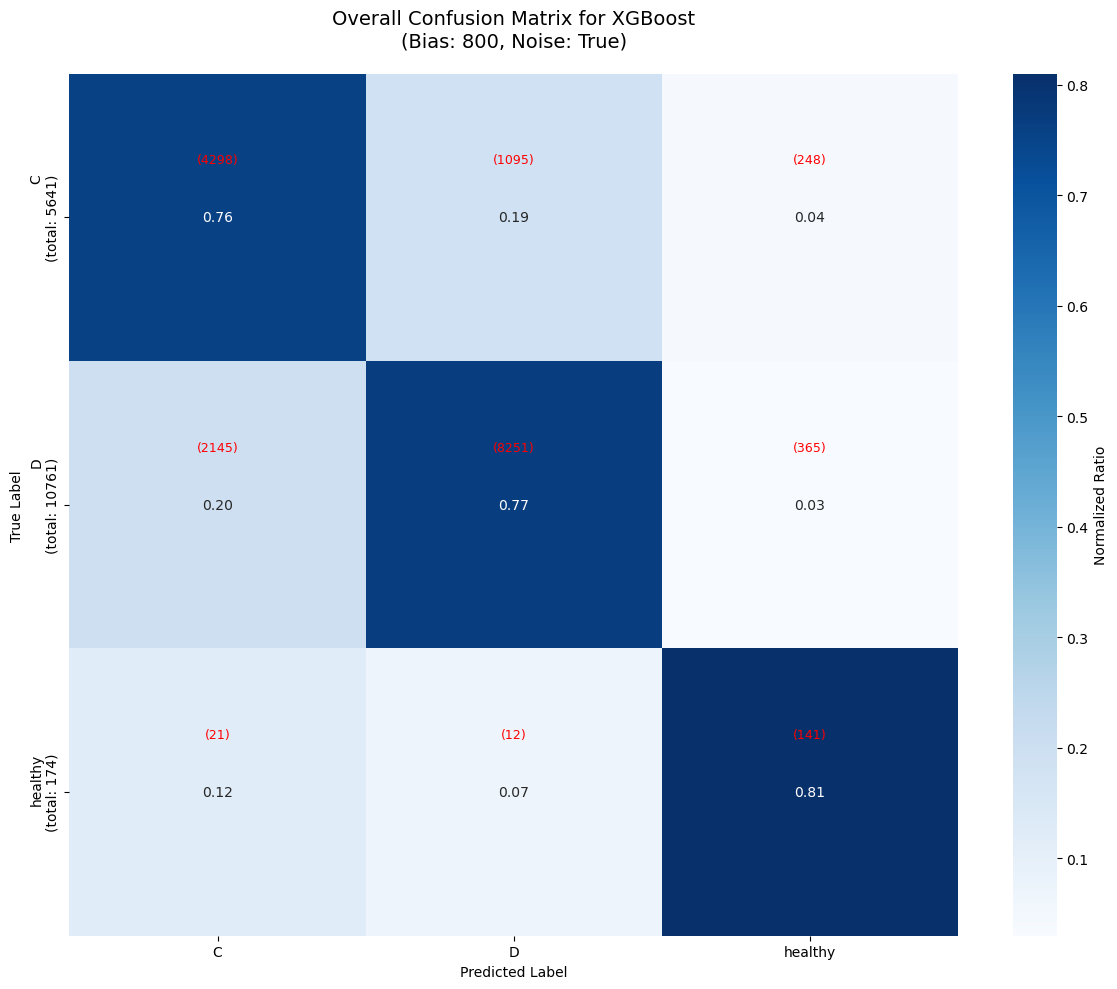

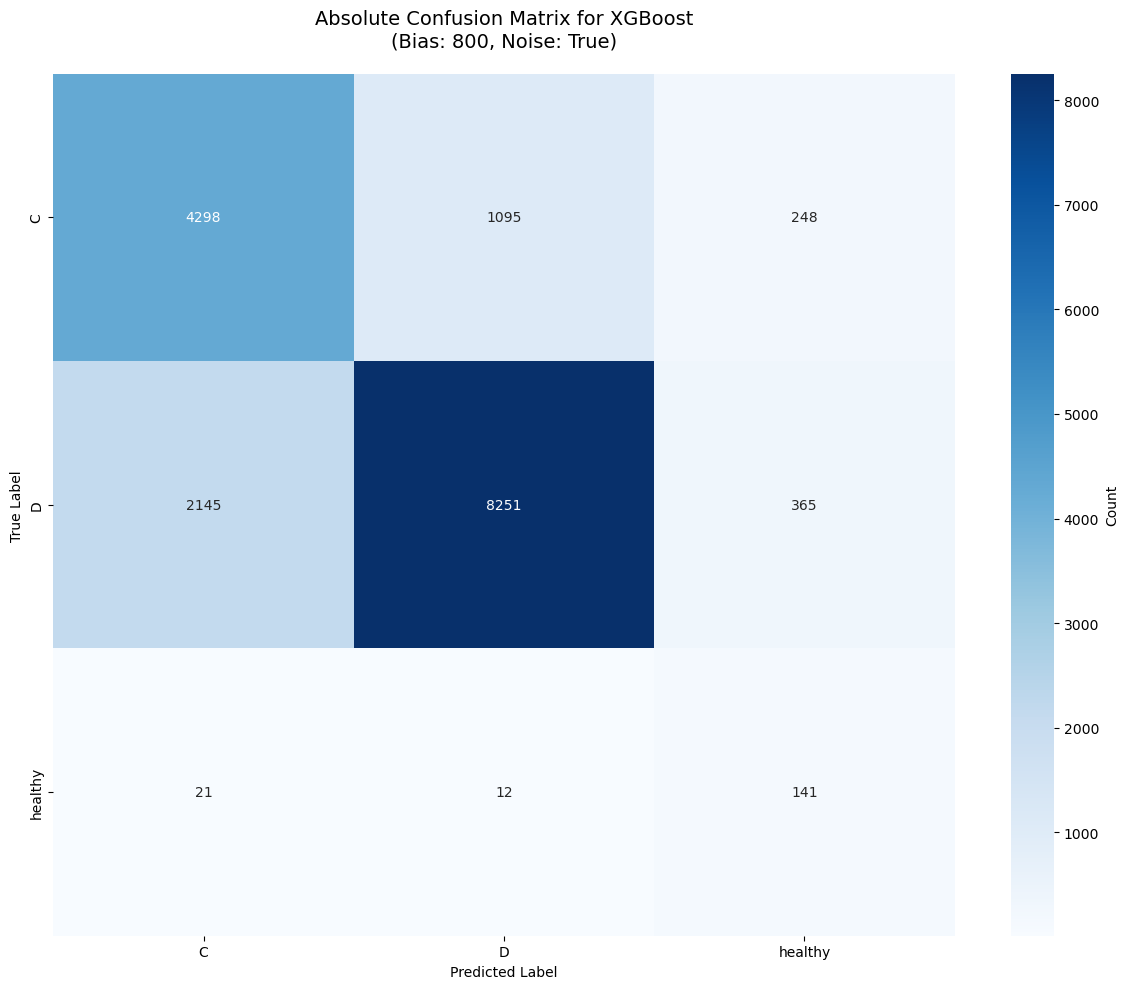


=== OVERALL METRICS for XGBoost ===
Total samples: 16576
Overall Accuracy: 0.7656

Detailed Classification Report:
              precision    recall  f1-score   support

           C       0.66      0.76      0.71      5641
           D       0.88      0.77      0.82     10761
     healthy       0.19      0.81      0.30       174

    accuracy                           0.77     16576
   macro avg       0.58      0.78      0.61     16576
weighted avg       0.80      0.77      0.78     16576

models_cross_validation not change


CatBoost Cross-Validation: 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]


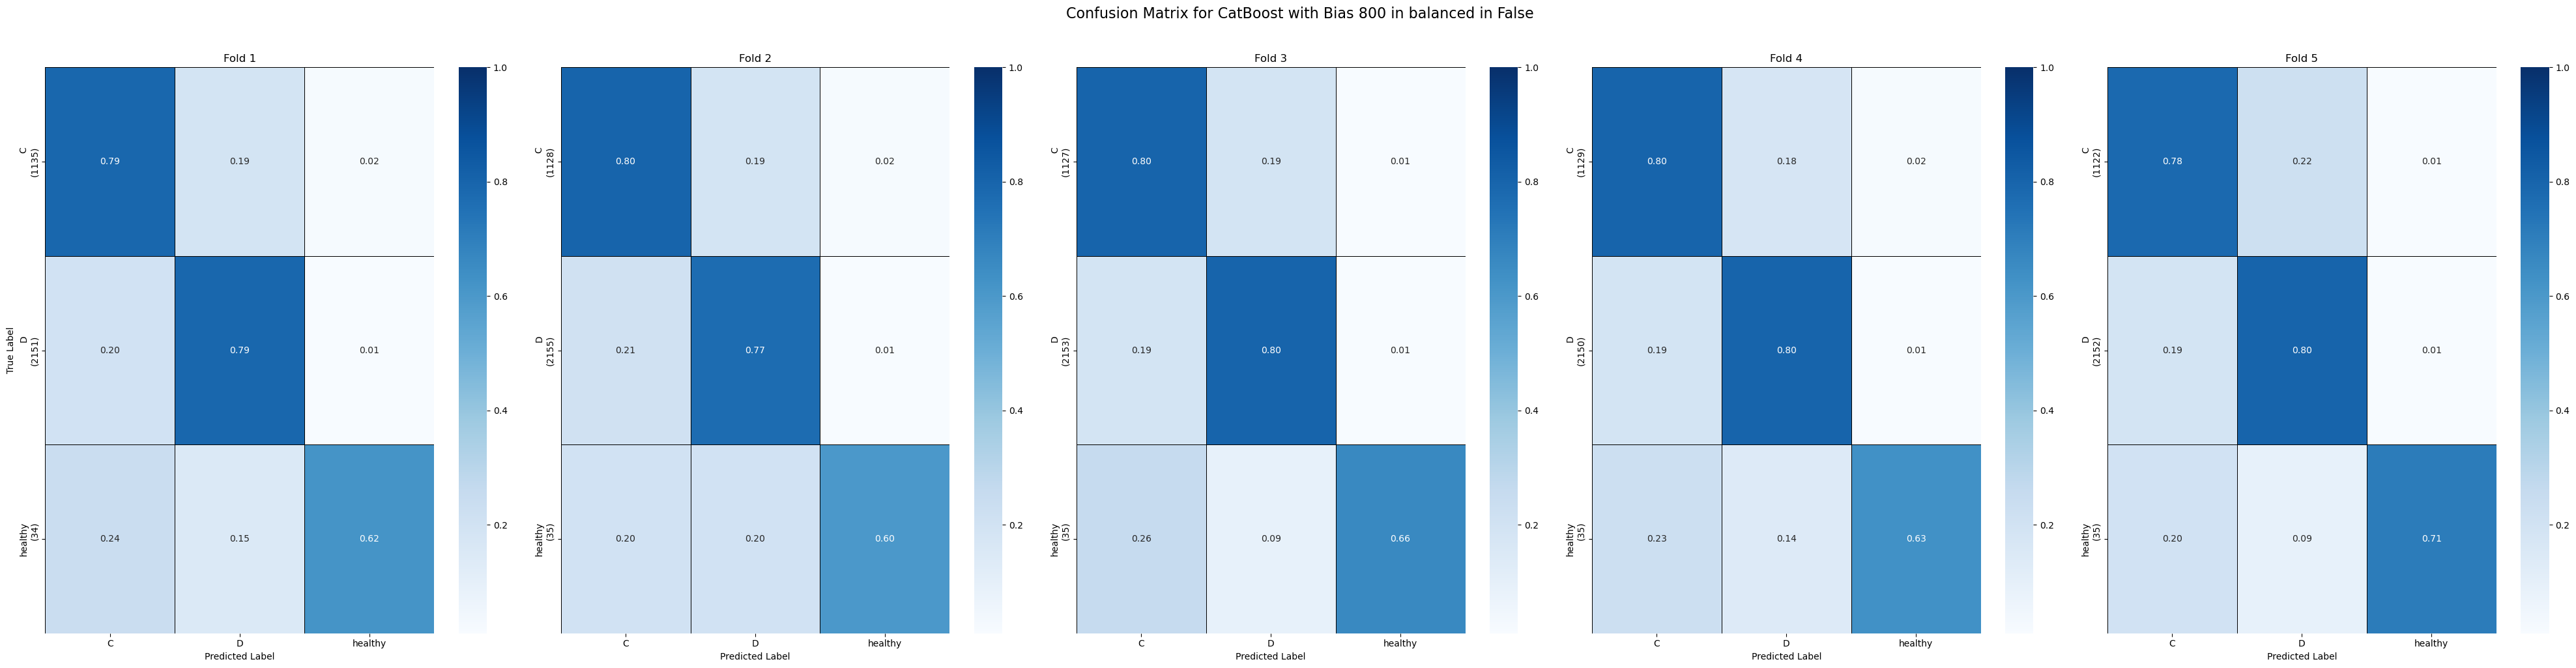

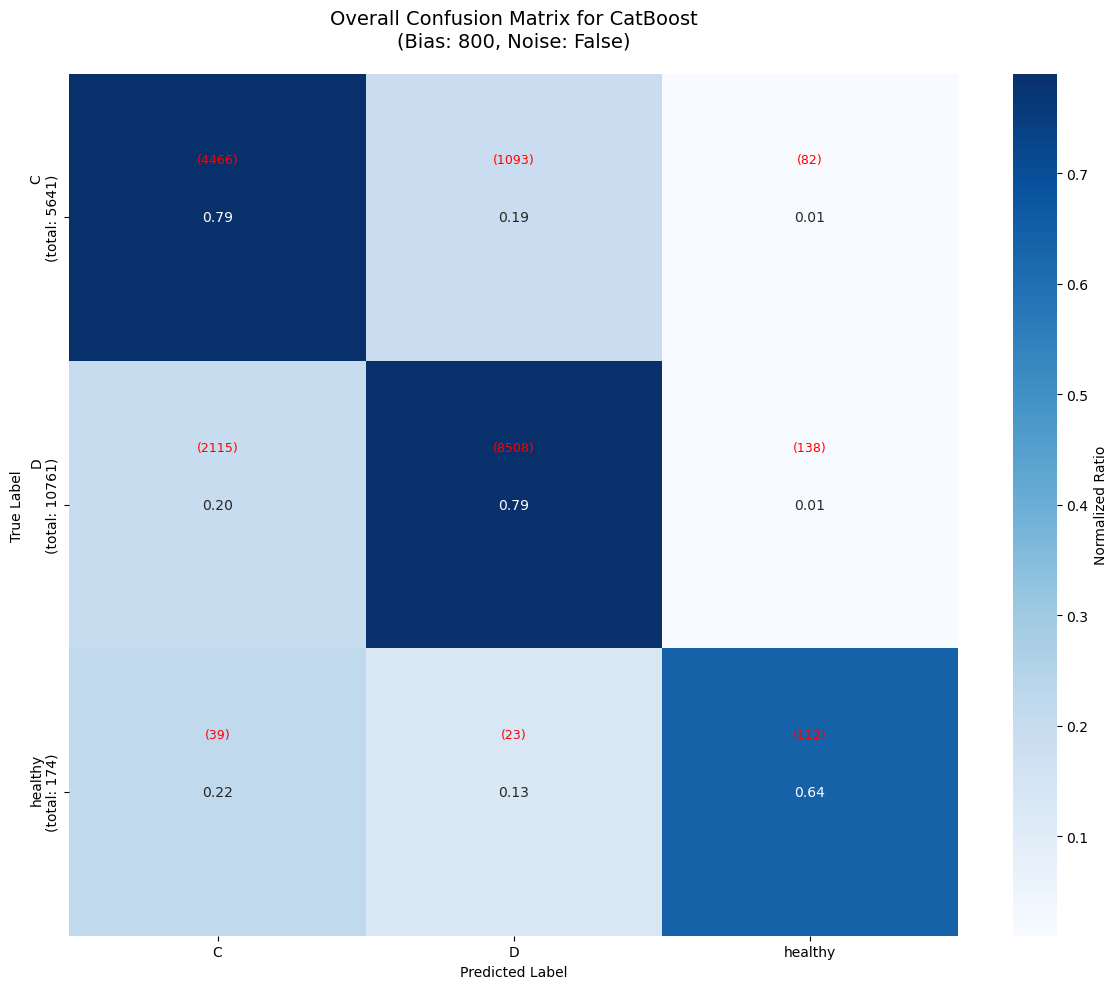

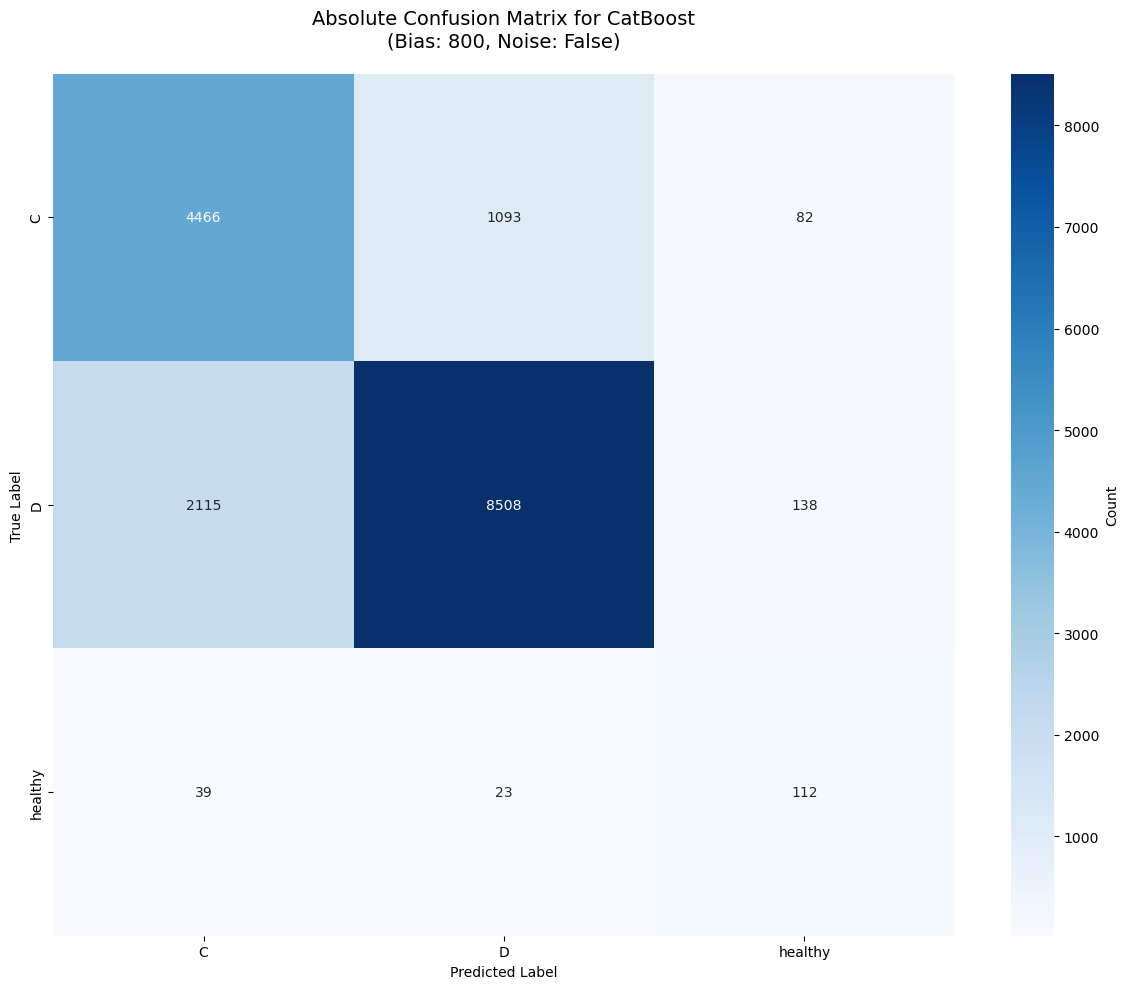


=== OVERALL METRICS for CatBoost ===
Total samples: 16576
Overall Accuracy: 0.7895

Detailed Classification Report:
              precision    recall  f1-score   support

           C       0.67      0.79      0.73      5641
           D       0.88      0.79      0.83     10761
     healthy       0.34      0.64      0.44       174

    accuracy                           0.79     16576
   macro avg       0.63      0.74      0.67     16576
weighted avg       0.81      0.79      0.79     16576



XGBoost Cross-Validation: 100%|██████████| 5/5 [00:06<00:00,  1.35s/it]


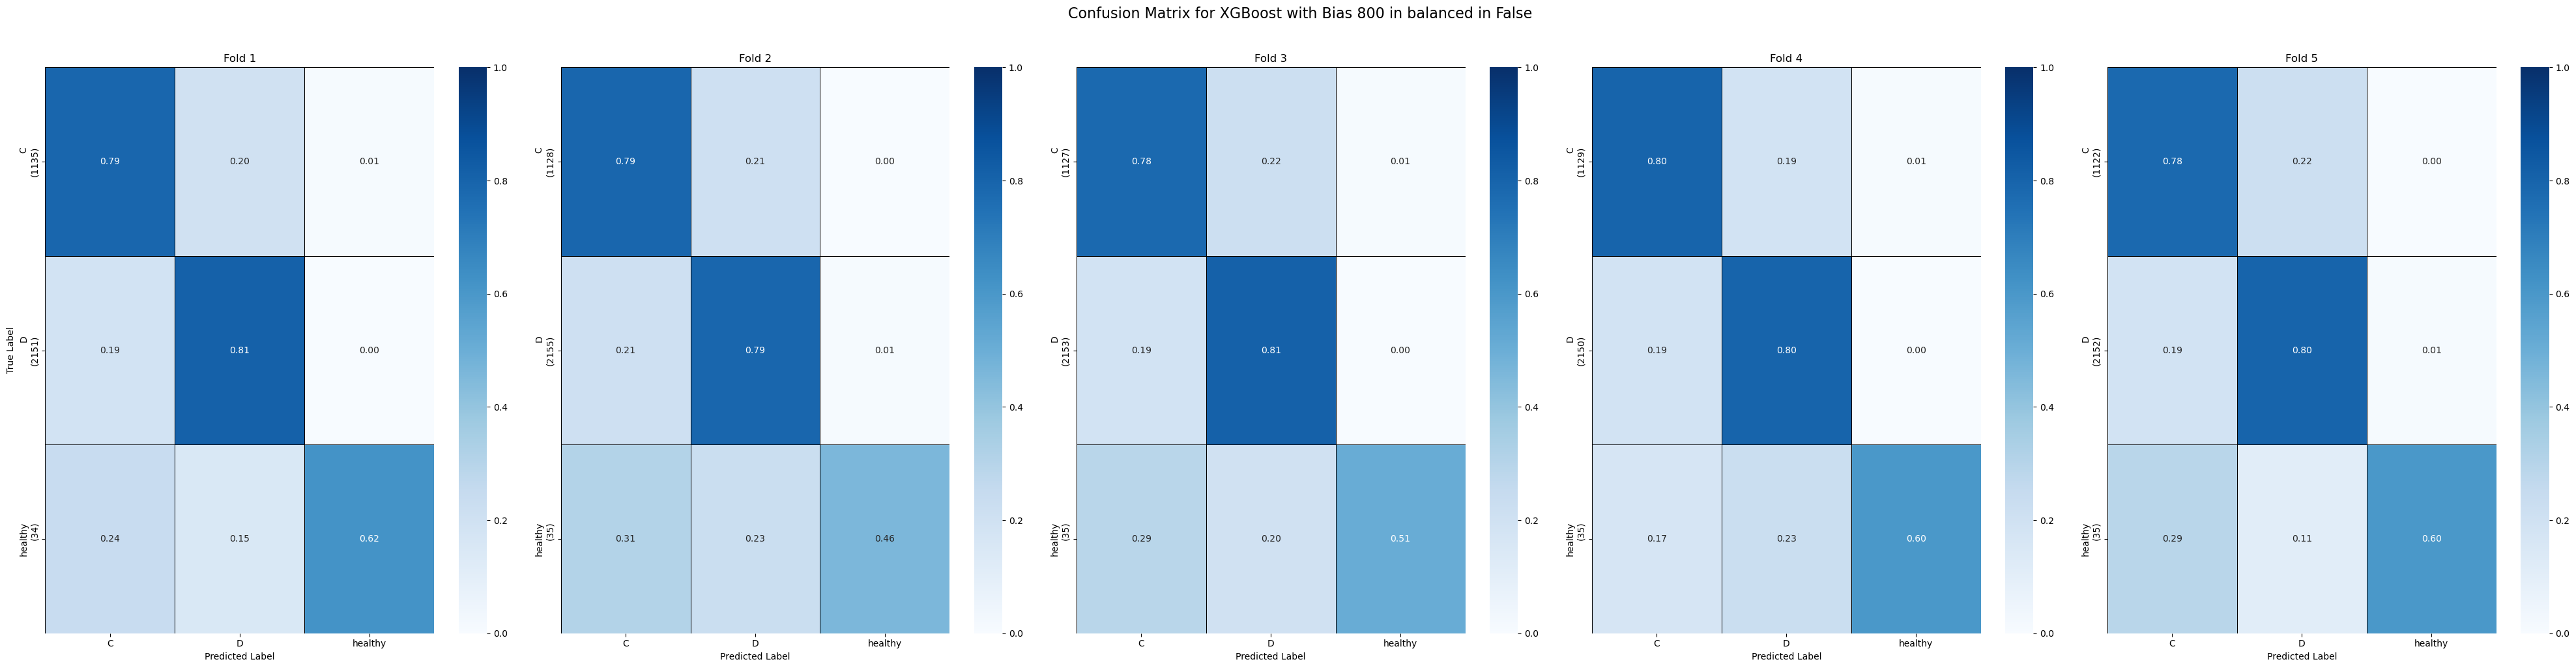

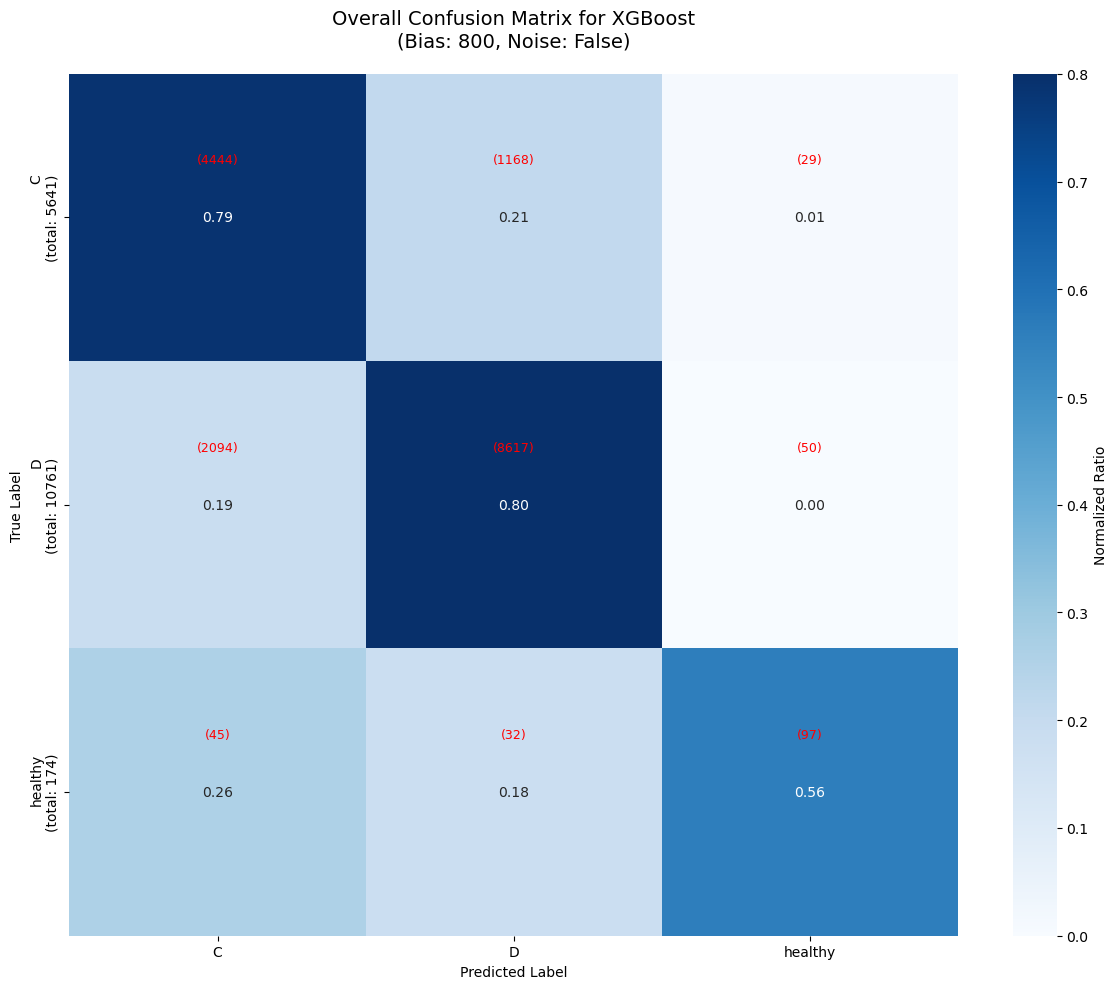

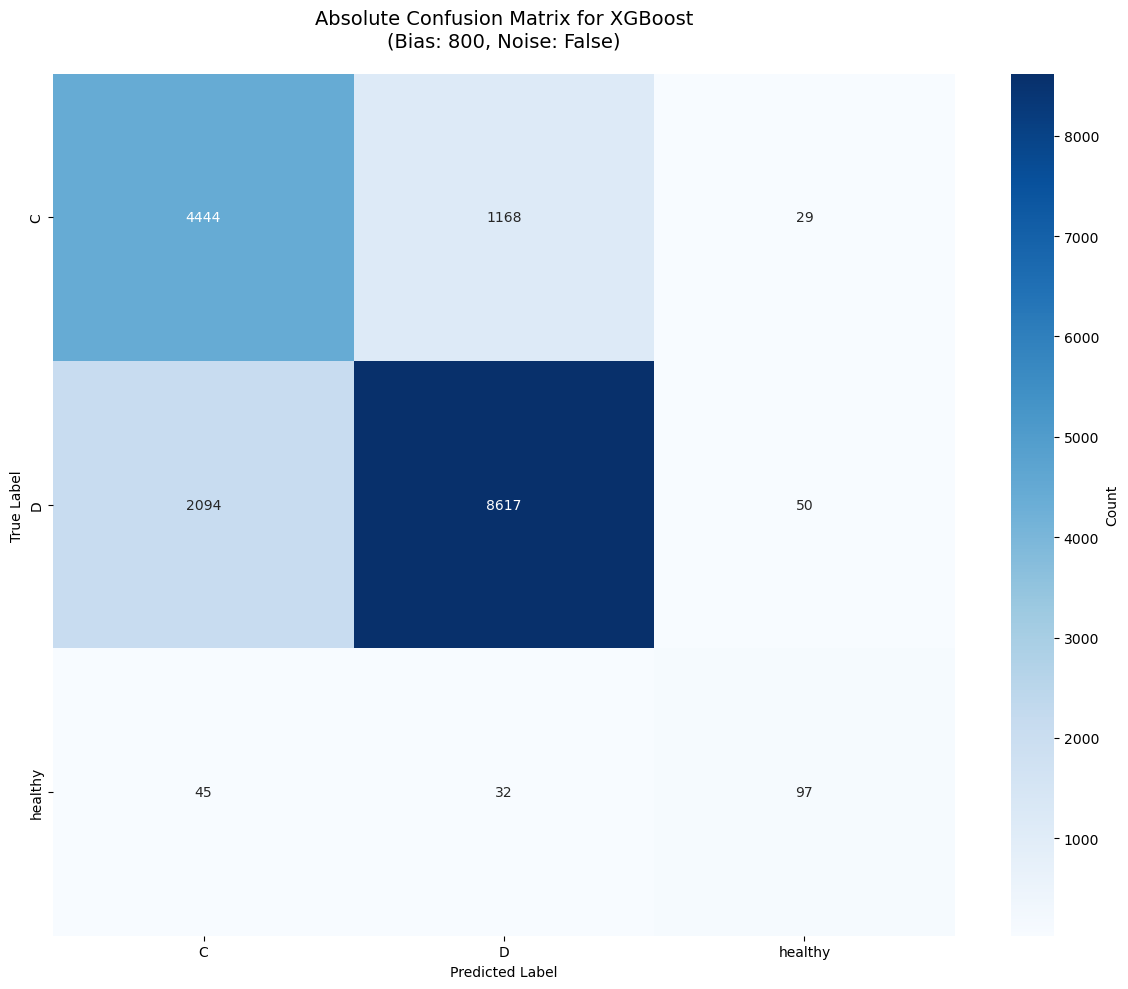


=== OVERALL METRICS for XGBoost ===
Total samples: 16576
Overall Accuracy: 0.7938

Detailed Classification Report:
              precision    recall  f1-score   support

           C       0.68      0.79      0.73      5641
           D       0.88      0.80      0.84     10761
     healthy       0.55      0.56      0.55       174

    accuracy                           0.79     16576
   macro avg       0.70      0.72      0.71     16576
weighted avg       0.81      0.79      0.80     16576

models_cross_validation not change


In [24]:
trained_models, results, cv_dict, shap_data_list = models_cross_validation(
    X=X_train_df, y=y_train_df, models=models, folds_indices=folds_indices_clean, n_splits=5, bias=800, noise=True, draw_matrix=True
)

trained_models, results, cv_dict, shap_data_list = models_cross_validation(
    X=X_train_df, y=y_train_df, models=models, folds_indices=folds_indices_clean, n_splits=5, bias=800, noise=False, draw_matrix=True
)


In [25]:
for model_name in results["model"].unique():
    df_model = pd.DataFrame(results[results["model"] == model_name])

    print(f"\n{'='*60}")
    print(f"📊 МОДЕЛЬ: {model_name}")
    print(f"Mean Accuracy = {round(df_model['Accuracy'].mean(), 2)}")
    print(f"Mean F1-macro = {round(df_model['F1-macro'].mean(), 2)}")
    print(f"Mean F1-micro = {round(df_model['F1-micro'].mean(), 2)}")
    print(f"Top_2_accuracy = {round(df_model['top_2_accuracy'].mean(), 2)}")
    print(f"Top_3_accuracy = {round(df_model['top_3_accuracy'].mean(), 2)}")
    print(f"Top_5_accuracy = {round(df_model['top_5_accuracy'].mean(), 2)}")
    print(f"{'='*60}")


📊 МОДЕЛЬ: CatBoost
Mean Accuracy = 0.79
Mean F1-macro = 0.67
Mean F1-micro = 0.79
Top_2_accuracy = 0.99
Top_3_accuracy = 1.0
Top_5_accuracy = 1.0

📊 МОДЕЛЬ: XGBoost
Mean Accuracy = 0.79
Mean F1-macro = 0.71
Mean F1-micro = 0.79
Top_2_accuracy = 0.99
Top_3_accuracy = 1.0
Top_5_accuracy = 1.0


## Loss

- focuses on examples that are difficult to classify
- the implementation allows XGBoost to  work with unbalanced data, focusing on complex and rare disease cases.

Formula:
 - FL(p_t) = -α_t * (1 - p_t)^γ * log(p_t)

In [26]:
# import numpy as np
# import xgboost as xgb
# from scipy.special import softmax

# class FocalLossMultiClass:
#     def __init__(self, alpha=None, gamma=2.0):
#         '''
#         alpha: weight list - ex. [1, 2, 5])
#         gamma: focus param
#         '''
#         self.alpha = alpha 
#         self.gamma = gamma
    
#     def compute_alpha_weights(self, y):
#         """Compute class weights if not provided"""
#         if self.alpha is not None:
#             return np.array(self.alpha)
        
#         class_counts = np.bincount(y)
#         print(class_counts.shape)
#         total_samples = len(y)
#         n_classes = len(class_counts)
#         alpha = total_samples / (n_classes * class_counts)
#         return alpha
    
#     def focal_loss_gradient_hessian(self, y_true, y_pred):
#         """
#         Compute gradient and hessian for focal loss
#         y_true: true labels [n_samples] - FLOAT from XGBoost!
#         y_pred: predicted probabilities [n_samples, n_classes]
#         """
#         n_samples = y_true.shape[0]
#         n_classes = y_pred.shape[1]

#         # CONVERT y_true to integer - FIX
#         y_true_int = y_true.astype(int)
        
#         y_true_onehot = dtrain.reshape(dtrain.shape[0], dtrain.shape[1])

#         probs = softmax(y_pred, axis=1)

#         focal_weights = (1 - probs) ** self.gamma

#         if self.alpha is not None:
#             alpha_weights = np.array(self.alpha)
#             if len(alpha_weights) == n_classes:
#                 # Multiply each example
#                 class_weights = alpha_weights[y_true]
#                 focal_weights = focal_weights * class_weights[:, np.newaxis]
        
#         print(focal_weights)
#         gradient = focal_weights * (probs - y_true_onehot)

#         # Simplified hessian for stability - FIX
#         hessian = focal_weights * probs * (1 - probs)
#         hessian = np.clip(hessian, 1e-6, 1 - 1e-6)

#         return gradient.flatten(), hessian.flatten()
    
#     def get_gradient_hessian(self, y_true, y_pred):
#         """
#         XGBoost compatible interface for gradient and hessian
#         """
#         grad, hess = self.focal_loss_gradient_hessian(y_true, y_pred)
#         return grad.flatten(), hess.flatten()  # FIX: was hess.gradient()
    
#     def focal_loss_objective(self, preds, dtrain):
#         """
#         Objective function for XGBoost
#         CORRECTED: parameters are (preds, dtrain) not (y_true, y_pred)
#         """
#         # Get true labels from dtrain
#         y_true = dtrain
#         n_samples = len(y_true)
        
#         # Determine number of classes from predictions shape
#         n_classes = preds.shape[0] // n_samples
        
#         # Reshape predictions
#         y_pred_reshaped = preds.reshape(n_samples, n_classes)

#         grad, hess = self.get_gradient_hessian(y_true, y_pred_reshaped)
#         return grad, hess
    
#     def compute_loss_value(self, preds, dtrain):
#         """
#         Compute actual focal loss value for monitoring
#         CORRECTED: parameters are (preds, dtrain) not (y_true, y_pred)
#         """
#         # Get true labels from dtrain
#         y_true = dtrain
#         n_samples = len(y_true)
#         n_classes = preds.shape[0] // n_samples
        
#         y_pred_reshaped = preds.reshape(n_samples, n_classes)
#         probs = softmax(y_pred_reshaped, axis=1)

#         # Convert to integer - FIX
#         y_true_int = y_true.astype(int)
#         y_true_onehot = np.eye(n_classes)[y_true_int]

#         ce_loss = -np.log(probs + 1e-15) * y_true_onehot

#         focal_modulation = (1 - probs) ** self.gamma

#         if self.alpha is not None:
#             alpha_weights = np.array(self.alpha)
#             if len(alpha_weights) == n_classes:
#                 class_weights = alpha_weights[y_true_int]
#                 focal_modulation = focal_modulation * class_weights[:, np.newaxis]

#         focal_loss = focal_modulation * ce_loss
#         return 'focal_loss', np.sum(focal_loss) / len(y_true)

## Оптимизация параметров Focal Loss

### Рекомендуемые диапазоны для перебора:

**gamma (фокус на сложных примерах):**
- Диапазон: 0.5 - 5.0
- Рекомендуемые значения для начала: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
- Чем выше gamma, тем больше фокус на сложных примерах
- Для  дисбаланса (healthy: 174) лучше начать с 1.5-3.0

**alpha_weights (веса классов для дисбаланса):**
- Вариант 1: Автоматический расчет по обратной пропорции
- Вариант 2: Ручная настройка для класса healthy
- Рекомендуемые значения:
  - Без весов: None
  - С весами: [1.0, 1.9, 61.8] для [D, C, healthy] (обратная пропорция)
  - Или: [1.0, 2.0, 10.0] для более сильного акцента на healthy
  - Или: [1.0, 1.5, 5.0] для умеренного акцента


In [27]:
import numpy as np
import xgboost as xgb
from scipy.special import softmax

class FocalLossMultiClass:
    def __init__(self, num_class, alpha_weights=None, gamma=1.0):
        self.num_class = num_class
        self.alpha_weights = alpha_weights
        self.gamma = gamma
    
    def _get_labels(self, data):
        """Universal data retrieval from different types"""
        if hasattr(data, 'get_label'):  # DMatrix
            return data.get_label().astype(int)
        elif isinstance(data, tuple):   # (X, y) from sklearn API
            return data[1].astype(int)
        else:                           # y as numpy array
            return data.astype(int)
    
    def focal_loss_objective(self, preds, data):
        """
        Focal Loss for multi-class classification: DMatrix or numpy arrays
        """

        y_true_int = self._get_labels(data)
        n_samples = len(y_true_int)
        
        # Reshape predictions - [n_samples, n_classes]
        preds_matrix = preds.reshape(n_samples, self.num_class)
        probs = softmax(preds_matrix, axis=1)
        
        # one-hot encoded matrix
        y_true_onehot = np.eye(self.num_class)[y_true_int]
        
        # Focal weights
        focal_weights = (1 - probs) ** self.gamma
        
        # Apply class weights if provided
        if self.alpha_weights is not None and len(self.alpha_weights) == self.num_class:
            class_weights = self.alpha_weights[y_true_int]
            focal_weights = focal_weights * class_weights[:, np.newaxis]
        
        # Gradient and hessian
        gradient_2d = focal_weights * (probs - y_true_onehot)
        hessian_2d = focal_weights * probs * (1 - probs)
        hessian_2d = np.clip(hessian_2d, 1e-6, 1 - 1e-6)
        
        return gradient_2d.flatten(), hessian_2d.flatten()
    
    def compute_loss_value(self, preds, data):
        """
        Focal Loss metric
        """
        y_true_int = self._get_labels(data)
        n_samples = len(y_true_int)
        
        preds_matrix = preds.reshape(n_samples, self.num_class)
        probs = softmax(preds_matrix, axis=1)
        
        # Probability of true class
        pt = probs[np.arange(n_samples), y_true_int]
        
        # Focal loss
        focal_loss = -((1 - pt) ** self.gamma) * np.log(np.clip(pt, 1e-7, 1))
        
        # Apply class weights
        if self.alpha_weights is not None and len(self.alpha_weights) == self.num_class:
            class_weights = self.alpha_weights[y_true_int]
            focal_loss = focal_loss * class_weights
        
        loss_value = np.mean(focal_loss)
        return 'focal_loss', loss_value

- training with focal loss

In [28]:
model = {
    "XGBoost": XGBClassifier,
}

In [29]:
# Focal Loss
n_classes = len(np.unique(y_train_df))
focal_loss = FocalLossMultiClass(num_class=n_classes, gamma=2.0)

# XGBoost - Focal Loss
config_xg = {
    "XGBoost": {
        "params": {
            "max_depth": 6,
            "learning_rate": 0.1,
            "random_state": 42,
            "num_class": n_classes,
            "n_estimators": 1000,
            "early_stopping_rounds": 20,
        },
        "needs_cat_features": False,
        "use_onehot": True, 
        "use_eval_set": False,
        "needs_imputation": False,
        "shap": True,
        "use_native_api": True, 
        "focal_loss_instance": focal_loss, 
    }
}

params = config_xg["XGBoost"]


In [30]:
gamma_list = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0] 

print(f"📊 Distribution: {y_train_df.value_counts().to_dict()}")
print(f"🔍 Tests: {len(gamma_list)} gamma values")
print("="*70)

all_results = []

n_classes = len(np.unique(y_train_df))
model = {"XGBoost": XGBClassifier}

for gamma in gamma_list:
    print(f"\n{'='*70}")
    print(f"🔍 Testing gamma={gamma}")
    print(f"{'='*70}")
    
    focal_loss = FocalLossMultiClass(
        num_class=n_classes, 
        alpha_weights=None,  # всегда None
        gamma=gamma
    )
    
    config_xg = {
        "XGBoost": {
            "params": {
                "max_depth": 6,
                "learning_rate": 0.1,
                "random_state": 42,
                "num_class": n_classes,
                "n_estimators": 1000,
                "early_stopping_rounds": 20,
            },
            "needs_cat_features": False,
            "use_onehot": True, 
            "use_eval_set": False,
            "needs_imputation": False,
            "shap": False,
            "use_native_api": True, 
            "focal_loss_instance": focal_loss, 
        }
    }
    
    params = config_xg["XGBoost"]
    
    try:
        trained_models_fl, results_fl, cv_dict_fl, shap_data_list_fl = models_cross_validation(
            X=X_train_df, 
            y=y_train_df, 
            models=model, 
            folds_indices=folds_indices_clean, 
            n_splits=5, 
            params=params, 
            noise=False, 
            draw_matrix=False,  
            is_balanced=False
        )
        
        avg_metrics = results_fl.groupby('model').mean(numeric_only=True).reset_index()
        
        result = {
            'gamma': gamma,
            'F1-macro': avg_metrics['F1-macro'].iloc[0],
            'F1-micro': avg_metrics['F1-micro'].iloc[0],
            'Accuracy': avg_metrics['Accuracy'].iloc[0],
        }
        
        if 'AUC-ROC' in avg_metrics.columns:
            result['AUC-ROC'] = avg_metrics['AUC-ROC'].iloc[0]
        
        all_results.append(result)
        
        print(f"✅ Results:")
        print(f"   F1-macro: {result['F1-macro']:.4f}")
        print(f"   F1-micro: {result['F1-micro']:.4f}")
        print(f"   Accuracy: {result['Accuracy']:.4f}")
        
    except Exception as e:
        print(f"❌ Error: {e}")
        all_results.append({
            'gamma': gamma,
            'F1-macro': None,
            'F1-micro': None,
            'Accuracy': None,
            'error': str(e)
        })
        continue

results_df_focal = pd.DataFrame(all_results)

if len(results_df_focal) > 0 and 'F1-macro' in results_df_focal.columns:
    results_df_focal_clean = results_df_focal.dropna(subset=['F1-macro'])
    
    if len(results_df_focal_clean) > 0:
        best_idx = int(results_df_focal_clean['F1-macro'].idxmax())
        
        best_gamma = float(results_df_focal_clean.loc[best_idx, 'gamma'])
        best_f1_macro = float(results_df_focal_clean.loc[best_idx, 'F1-macro'])
        best_f1_micro = float(results_df_focal_clean.loc[best_idx, 'F1-micro'])
        best_accuracy = float(results_df_focal_clean.loc[best_idx, 'Accuracy'])
        
        print("\n" + "="*70)
        print("🏆 BEST FOCAL LOSS PARAMETERS:")
        print("="*70)
        print(f"gamma: {best_gamma}")
        print(f"\nMetrics:")
        print(f"  F1-macro: {best_f1_macro:.4f}")
        print(f"  F1-micro: {best_f1_micro:.4f}")
        print(f"  Accuracy: {best_accuracy:.4f}")
        
        if 'AUC-ROC' in results_df_focal_clean.columns:
            auc_roc_val = results_df_focal_clean.loc[best_idx, 'AUC-ROC']
            if pd.notna(auc_roc_val):
                print(f"  AUC-ROC: {float(auc_roc_val):.4f}")
        
        print("="*70)
        
        print("\n📊 TOP-5 BEST GAMMA VALUES:")
        print("="*70)
        top5 = results_df_focal_clean.nlargest(5, 'F1-macro')[['gamma', 'F1-macro', 'F1-micro', 'Accuracy']].copy()
        print(top5.to_string(index=False))
        print("="*70)
        
        print(f"\n💡 Use these parameters:")
        print(f"focal_loss = FocalLossMultiClass(num_class={n_classes}, alpha_weights=None, gamma={best_gamma})")
    else:
        print("❌ All gamma values failed with errors")
else:
    print("❌ Failed to collect results")

print(f"\n📁 All results saved in results_df_focal")
print(f"   Total gamma values tested: {len(results_df_focal)}")

📊 Distribution: {('D',): 10761, ('C',): 5641, ('healthy',): 174}
🔍 Tests: 6 gamma values

🔍 Testing gamma=0.5


XGBoost Cross-Validation: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


models_cross_validation not change
✅ Results:
   F1-macro: 0.7080
   F1-micro: 0.8080
   Accuracy: 0.8080

🔍 Testing gamma=1.0


XGBoost Cross-Validation: 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]


models_cross_validation not change
✅ Results:
   F1-macro: 0.7024
   F1-micro: 0.8036
   Accuracy: 0.8036

🔍 Testing gamma=1.5


XGBoost Cross-Validation: 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]


models_cross_validation not change
✅ Results:
   F1-macro: 0.7031
   F1-micro: 0.8036
   Accuracy: 0.8036

🔍 Testing gamma=2.0


XGBoost Cross-Validation: 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]


models_cross_validation not change
✅ Results:
   F1-macro: 0.7017
   F1-micro: 0.8031
   Accuracy: 0.8031

🔍 Testing gamma=2.5


XGBoost Cross-Validation: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]


models_cross_validation not change
✅ Results:
   F1-macro: 0.6997
   F1-micro: 0.8011
   Accuracy: 0.8011

🔍 Testing gamma=3.0


XGBoost Cross-Validation: 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

models_cross_validation not change
✅ Results:
   F1-macro: 0.6956
   F1-micro: 0.7993
   Accuracy: 0.7993

🏆 BEST FOCAL LOSS PARAMETERS:
gamma: 0.5

Metrics:
  F1-macro: 0.7080
  F1-micro: 0.8080
  Accuracy: 0.8080

📊 TOP-5 BEST GAMMA VALUES:
 gamma  F1-macro  F1-micro  Accuracy
   0.5  0.707970  0.807972  0.807972
   1.5  0.703071  0.803633  0.803633
   1.0  0.702367  0.803631  0.803631
   2.0  0.701699  0.803085  0.803085
   2.5  0.699718  0.801097  0.801097

💡 Use these parameters:
focal_loss = FocalLossMultiClass(num_class=3, alpha_weights=None, gamma=0.5)

📁 All results saved in results_df_focal
   Total gamma values tested: 6


## Calibration

#### - Calibration Board ( a multinomial Logistic Regression on top of the outputs of the model)
#### - Dirichlet calibration (https://github.com/dirichletcal/dirichlet_python)
#### - Temperature scaling (we take the softmax from the outputs of the model divided by T).
  - T is selected by gradient descent, minimizing LogLoss, for example

## Calibration Estimate 


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss, log_loss
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
import warnings 
from sklearn.preprocessing import LabelEncoder

def expected_calibration_error(y_true, y_proba, n_bins=10):
    """
    Calculate Expected Calibration Error (ECE) with proper input handling
    """

    y_true_encoded = y_true

    
    # Multiclass
    pred_class = np.argmax(y_proba, axis=1)
    confidence = np.max(y_proba, axis=1)
    y_true_binary = (y_true_encoded == pred_class).astype(int)

    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    ece = 0.0
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = (confidence > bin_lower) & (confidence <= bin_upper)
        prop_in_bin = np.mean(in_bin)
        
        if prop_in_bin > 0:
            accuracy_in_bin = np.mean(y_true_binary[in_bin])
            avg_confidence_in_bin = np.mean(confidence[in_bin])
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin
    
    return ece

def plot_calibration_curve(y_true, y_proba, model_name, n_bins=10):
    """
    Plot calibration curve for multiclass (one-vs-rest) with proper encoding
    """ 

    #  DataFrame
    if hasattr(y_true, 'iloc'):
        if hasattr(y_true, 'columns'):
            y_true_values = y_true.iloc[:, 0]
        else:
            y_true_values = y_true
    else:
        y_true_values = y_true

    #  NaN
    if hasattr(y_true_values, 'isna') and y_true_values.isna().any():
        print(f"  ⚠️  Found {y_true_values.isna().sum()} NaN values in y_true")
        mask = ~y_true_values.isna()
        y_true_clean = y_true_values[mask]
        y_proba_clean = y_proba[mask]
        print(f"  Removed {y_true_values.isna().sum()} rows with NaN, remaining: {len(y_true_clean)}")
    else:
        y_true_clean = y_true_values
        y_proba_clean = y_proba

    if hasattr(y_true_clean, 'dtype') and y_true_clean.dtype == 'object':
        le = LabelEncoder()
        y_true_encoded = le.fit_transform(y_true_clean)
        print(f"  String labels encoded: {dict(zip(le.classes_, range(len(le.classes_))))}")
    else:
        y_true_encoded = y_true_clean.values if hasattr(y_true_clean, 'values') else y_true_clean
    
    class_names = [f"Class {i}" for i in range(y_proba_clean.shape[1])]
    
    n_classes = y_proba_clean.shape[1]
    fig, axes = plt.subplots(1, n_classes, figsize=(5*n_classes, 5))
    

    
    for i in range(n_classes):
        prob_true, prob_pred = calibration_curve(
            (y_true_encoded == i).astype(int), 
            y_proba_clean[:, i], 
            n_bins=n_bins
        )
        
        axes[i].plot(prob_pred, prob_true, 's-', label=f'{model_name}')
        axes[i].plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
        axes[i].set_xlabel('Predicted Probability')
        axes[i].set_ylabel('True Probability')
        axes[i].set_title(f'{class_names[i]}' if i < len(class_names) else f'Class {i}')
        axes[i].legend()
        axes[i].grid(True)
    
    plt.tight_layout()
    return fig

def evaluate_calibration(y_true, y_proba, model_name):
    """
    Comprehensive calibration evaluation with proper label encoding
    """
    metrics = {}
    
    #  DataFrame
    if hasattr(y_true, 'iloc'):
        if hasattr(y_true, 'columns'):
            y_true_values = y_true.iloc[:, 0]
        else:
            y_true_values = y_true
    else:
        y_true_values = y_true

    #  NaN
    if hasattr(y_true_values, 'isna') and y_true_values.isna().any():
        print(f"  ⚠️  Found {y_true_values.isna().sum()} NaN values in y_true")
        mask = ~y_true_values.isna()
        y_true_clean = y_true_values[mask]
        y_proba_clean = y_proba[mask]
        print(f"  Removed {y_true_values.isna().sum()} rows with NaN, remaining: {len(y_true_clean)}")
    else:
        y_true_clean = y_true_values
        y_proba_clean = y_proba

    if hasattr(y_true_clean, 'dtype') and y_true_clean.dtype == 'object':
        le = LabelEncoder()
        y_true_encoded = le.fit_transform(y_true_clean)
        print(f"  String labels encoded: {dict(zip(le.classes_, range(len(le.classes_))))}")
    else:
        y_true_encoded = y_true_clean.values if hasattr(y_true_clean, 'values') else y_true_clean
    
    print(f"  True labels shape: {y_true_encoded.shape}, unique: {np.unique(y_true_encoded)}")
    print(f"  Prediction shape: {y_proba_clean.shape}")
    

    n_classes_true = len(np.unique(y_true_encoded))
    n_classes_pred = y_proba_clean.shape[1] if y_proba_clean.ndim == 2 else 2
    
    if n_classes_true != n_classes_pred:
        print(f"  ⚠️  CLASS MISMATCH: True has {n_classes_true}, predictions have {n_classes_pred}")
        return {'brier_score': np.nan, 'log_loss': np.nan, 'ece': np.nan}
    
    # Brier Score (multi-class)
    if y_proba_clean.ndim == 2:
        n_classes = y_proba_clean.shape[1]
        brier_scores = []
        for i in range(n_classes):
            brier_scores.append(brier_score_loss((y_true_encoded == i).astype(int), y_proba_clean[:, i]))
        metrics['brier_score'] = np.mean(brier_scores)
        metrics['brier_score_per_class'] = brier_scores
    else:
        metrics['brier_score'] = brier_score_loss(y_true_encoded, y_proba_clean)
    
    # Log Loss - labels
    metrics['log_loss'] = log_loss(y_true_encoded, y_proba_clean, labels=list(range(n_classes_true)))
    
    # ECE
    metrics['ece'] = expected_calibration_error(y_true_encoded, y_proba_clean)
    
    print(f"=== Calibration Metrics for {model_name} ===")
    print(f"Brier Score: {metrics['brier_score']:.4f}")
    print(f"Log Loss: {metrics['log_loss']:.4f}")
    print(f"ECE: {metrics['ece']:.4f}")
    
    return metrics

def evaluate_all_calibrations(calibrated_predictions, y_test, oof_predictions=None):
    """
    Parameters:
    - calibrated_predictions: results of apply_calibration
    - y_test
    - oof_predictions
    """
    
    all_metrics = {}
    all_figures = {}
    
    for model_name, methods in calibrated_predictions.items():
        print(f"\n{'='*50}")
        print(f"EVALUATING {model_name}")
        print(f"{'='*50}")
        
        model_metrics = {}
        model_figures = {}
        
        for method_name, y_proba in methods.items():
            print(f"\n--- {method_name.upper()} ---")
            
            metrics = evaluate_calibration(y_test, y_proba, f"{model_name} ({method_name})")
            model_metrics[method_name] = metrics
            
            fig = plot_calibration_curve(y_test, y_proba, f"{model_name} ({method_name})")
            model_figures[method_name] = fig
            
            plt.show()
        
        all_metrics[model_name] = model_metrics
        all_figures[model_name] = model_figures
    
    return all_metrics, all_figures


# Calibration 

### Plot

In [32]:
sys.path.append('/path/to/dirichlet_python') 
from sklearn.linear_model import LogisticRegression
from dirichlet_python.dirichletcal.calib.fulldirichlet import FullDirichletCalibrator

def calibrate_platt_scaling(oof_proba, oof_true, test_proba):
    """
    Platt Scaling
    """
    try:
        print(f"DEBUG calibrate_platt_scaling:")
        print(f"  oof_proba shape: {oof_proba.shape}, NaN: {np.isnan(oof_proba).any()}")
        print(f"  oof_true shape: {oof_true.shape}, NaN: {np.isnan(oof_true).any()}")
        print(f"  test_proba shape: {test_proba.shape}, NaN: {np.isnan(test_proba).any()}")
        
        if np.isnan(oof_proba).any() or np.isnan(oof_true).any():
            print("❌ NaN values detected in calibration data")
            mask = ~np.isnan(oof_proba).any(axis=1) & ~np.isnan(oof_true.flatten())
            if mask.sum() == 0:
                raise ValueError("No valid samples after NaN removal")
            
            oof_proba = oof_proba[mask]
            oof_true = oof_true[mask]
            print(f"  Using {len(oof_proba)} clean samples after NaN removal")
        
        unique_classes = np.unique(oof_true)
        if len(unique_classes) < 2:
            raise ValueError(f"Need at least 2 classes for calibration, got {len(unique_classes)}")
        
        if len(oof_proba) != len(oof_true):
            raise ValueError(f"Shape mismatch: oof_proba {len(oof_proba)} != oof_true {len(oof_true)}")
        
        if len(oof_true.shape) > 1:
            oof_true = oof_true.flatten()
        
        calibrator = LogisticRegression(
            multi_class="multinomial", 
            solver='lbfgs', 
            max_iter=1000,
            random_state=42
        )

        calibrator.fit(oof_proba, oof_true)
        calibrated_proba = calibrator.predict_proba(test_proba)
        
        print("✅ Calibration successful")
        return calibrated_proba, calibrator
        
    except Exception as e:
        print(f"❌ Calibration failed: {str(e)}")
        raise

def calibrate_temperature_scaling(oof_logits, oof_true, test_logits):
    """
    Temperature Scaling
    
    calibrated_proba = softmax(logits / T)
    Где T > 0 - "temperature", min  NLL
    """

    def objective(T):
        """Minimize negative log likelihood"""

        scaled_logits = oof_logits/T
        scaled_logits = scaled_logits - np.max(scaled_logits, axis=1, keepdims=True)

        exp_logits = np.exp(scaled_logits)

        probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

        # Negative log likelihood
        nll = -np.mean(np.log(probs[np.arange(len(oof_true)), oof_true] + 1e-15))
        return nll
    
    # opt temp 
    result = minimize(objective, x0=1.0, bounds=[(0.1, 5.0)], method='L-BFGS-B')

    best_T = result.x[0]
    
    print(f"Optimal temperature: {best_T:.4f}")

    scaled_test_logits = test_logits / best_T
    scaled_test_logits = scaled_test_logits - np.max(scaled_test_logits, axis=1, keepdims=True)
    exp_test_logits = np.exp(scaled_test_logits)
    calibrated_proba = exp_test_logits / np.sum(exp_test_logits, axis=1, keepdims=True)
    
    return calibrated_proba, best_T


def calibrate_dirichlet(oof_proba, oof_true, test_proba):
    """
    Dirichlet Calibration
    
    calibrated_logits = A * logits + b 
    calibrated_proba = softmax(calibrated_logits)

    """
    calibrator = FullDirichletCalibrator()
    calibrator.fit(oof_proba, oof_true)
    
    calibrated_proba = calibrator.predict(test_proba)

    return calibrated_proba, calibrator



In [33]:
from catboost import Pool
import xgboost as xgb
from scipy.special import softmax
from typing import Dict, List, Optional, Tuple, Any
from functools import lru_cache

def _predict_xgboost_native(model, X_val_preprocessed):
    """
    Helper function to predict with XGBoost native API.
    """
    X_val_native = X_val_preprocessed.copy()
    for col in X_val_native.select_dtypes(include=['object']).columns:
        X_val_native[col] = X_val_native[col].astype('category')
    
    dval = xgb.DMatrix(X_val_native, enable_categorical=True)
    y_pred_raw = model.predict(dval)
    
    if y_pred_raw.ndim == 1 or y_pred_raw.shape[1] == 1:
        fold_proba = np.column_stack([1 - y_pred_raw, y_pred_raw])
    else:
        fold_proba = softmax(y_pred_raw, axis=1)
    
    return fold_proba


def collect_oof_predictions(
    trained_models: Dict[str, List[Any]], 
    X: pd.DataFrame, 
    y: pd.Series, 
    cv_splits_dict: Dict[int, Dict[str, Any]], 
    models_config: Dict[str, Dict[str, Any]],
    bias: int = 0,
    noise: bool = False,
    is_balanced: bool = True,
    use_cache: bool = True
) -> Dict[str, Dict[str, np.ndarray]]:
    """
    Collect Out-of-Fold (OOF) predictions from trained models.
    
    - Caches preprocessed validation data to avoid redundant processing
    - Accepts preprocessing parameters to match training configuration
    - Uses helper functions to reduce code duplication
    
    Args:
        trained_models: Dictionary of model names to lists of fold models
        X: Full feature dataframe
        y: Full target series
        cv_splits_dict: Dictionary with fold indices (from models_cross_validation)
        models_config: Model configuration dictionary
        bias: Bias parameter for balancing (should match training)
        noise: Whether to add noise (should match training)
        is_balanced: Whether to balance data (should match training)
        use_cache: Whether to cache preprocessed data (recommended: True)
    
    Returns:
        Dictionary with model names as keys and dicts containing:
        - 'proba': OOF probability predictions (n_samples, n_classes)
        - 'true': True labels (n_samples,)
        - 'indices': Original indices (n_samples,)
    """
    oof_predictions = {}
    
    # Cache for preprocessed validation data (fold_idx -> preprocessed_data)
    preprocessing_cache = {}
    
    for model_name, fold_models in trained_models.items():
        print(f"Collecting OOF predictions for {model_name}...")
        
        config = models_config.get(model_name, {
            "use_onehot": True,
            "needs_cat_features": False,
            "use_native_api": False
        })
        
        oof_proba_list = []
        oof_true_list = []
        oof_indices_list = []
        
        for fold_idx, model in enumerate(fold_models):
            if fold_idx not in cv_splits_dict:
                print(f"  ⚠️ Fold {fold_idx} not found in cv_splits_dict...")
                continue
            
            val_idx = cv_splits_dict[fold_idx]["val_idx"]
            train_idx = cv_splits_dict[fold_idx]["train_idx"]
            
            # Check cache first
            cache_key = (fold_idx, bias, noise, is_balanced, config.get("use_onehot", True))
            
            if use_cache and cache_key in preprocessing_cache:
                X_val_preprocessed, y_val_preprocessed, label_encoder = preprocessing_cache[cache_key]
                print(f"  Fold {fold_idx}: Using cached preprocessed data ({len(val_idx)} samples)")
            else:
                # Extract fold data
                X_train = X.iloc[train_idx]
                y_train = y.iloc[train_idx]
                X_val = X.iloc[val_idx]
                y_val = y.iloc[val_idx]
                
                # Preprocess validation data only (no need to rebalance train)
                #  only need X_val_preprocessed and y_val_preprocessed for predictions
                try:
                    (
                        _,  # X_train_balanced - not needed for OOF
                        _,  # y_train_balanced - not needed for OOF
                        X_val_preprocessed, 
                        y_val_preprocessed,
                        label_encoder,
                    ) = preprocessing_data_for_training(
                        X_train, y_train, X_val, y_val, 
                        use_onehot=config.get("use_onehot", True), 
                        bias=bias, 
                        noise=noise, 
                        is_balanced=is_balanced
                    )
                    
                    # Cache the preprocessed data
                    if use_cache:
                        preprocessing_cache[cache_key] = (X_val_preprocessed, y_val_preprocessed, label_encoder)
                    
                except Exception as e:
                    print(f"  ❌ Error preprocessing fold {fold_idx}: {e}")
                    continue
            
            # Get predictions based on model type
            try:
                if model_name == "CatBoost":
                    cat_columns = X_val_preprocessed.select_dtypes(include=['object', 'category']).columns
                    cat_indices = [i for i, col in enumerate(X_val_preprocessed.columns) if col in cat_columns]
                    
                    val_pool = Pool(X_val_preprocessed, label=y_val_preprocessed, cat_features=cat_indices)
                    fold_proba = model.predict_proba(val_pool)
                    
                elif model_name == "XGBoost" and config.get("use_native_api", False):
                    fold_proba = _predict_xgboost_native(model, X_val_preprocessed)
                        
                else:
                    # Standard sklearn/CatBoost API
                    fold_proba = model.predict_proba(X_val_preprocessed)
                
                # Validate predictions shape
                if fold_proba is None or fold_proba.shape[0] != len(val_idx):
                    raise ValueError(
                        f"Prediction shape mismatch: expected {len(val_idx)} samples, "
                        f"got {fold_proba.shape[0] if fold_proba is not None else 0}"
                    )
                
                oof_proba_list.append(fold_proba)
                oof_true_list.append(y_val_preprocessed)
                oof_indices_list.append(np.array(val_idx))
                
                print(f"  ✅ Fold {fold_idx}: {len(val_idx)} samples collected")
                
            except AttributeError as e:
                print(f"  ❌ Model {model_name} fold {fold_idx} missing required method: {e}")
                continue
            except ValueError as e:
                print(f"  ❌ Validation error in fold {fold_idx}: {e}")
                continue
            except Exception as e:
                print(f"  ❌ Unexpected error in fold {fold_idx}: {e}")
                import traceback
                traceback.print_exc()
                continue
        
        # Aggregate all folds
        if oof_proba_list:
            all_indices = np.concatenate(oof_indices_list)
            all_proba = np.vstack(oof_proba_list)
            all_true = np.concatenate(oof_true_list)
            
            # Sort by original indices to maintain order
            sort_order = np.argsort(all_indices)
            
            oof_predictions[model_name] = {
                'proba': all_proba[sort_order],
                'true': all_true[sort_order],
                'indices': all_indices[sort_order]
            }
            
            print(f"  ✅ Total: {len(all_true)} OOF predictions collected for {model_name}")
        else:
            print(f"  ⚠️ No OOF predictions collected for {model_name}")
    
    return oof_predictions

In [34]:
def apply_calibration(models, X_new, oof_predictions, all_calibration=True, model_configs=MODEL_CONFIGS):
    """
    Calibration To new data 
    """
    calibrated_predictions = {}
    calibrators = {}
    
    for model_name, fold_models in models.items():
        print(f"Applying calibration for {model_name}...")
        
        if model_name not in oof_predictions:
            print(f"  ⚠️ No OOF predictions found for {model_name}, skipping...")
            continue
            
        config = model_configs.get(model_name, {})
        
        test_proba_list = []
        test_logits_list = []
        
        for model_idx, model in enumerate(fold_models):
            try:
                X_new_processed = X_new.copy()
                
                if config.get("use_onehot", True):
                    cat_columns = X_new_processed.select_dtypes(include=['object', 'category']).columns
                    if len(cat_columns) > 0:
                        X_new_processed = pd.get_dummies(X_new_processed, columns=cat_columns, drop_first=True)
                
                if hasattr(fold_models[0], 'feature_names_in_'):
                    expected_features = fold_models[0].feature_names_in_
                    for feature in expected_features:
                        if feature not in X_new_processed.columns:
                            X_new_processed[feature] = 0
                    X_new_processed = X_new_processed[expected_features]
                
                if model_name == "CatBoost":
                    fold_proba = model.predict_proba(X_new_processed)
                    
                elif model_name == "XGBoost" and config.get("use_native_api", False):
                    X_new_native = X_new_processed.copy()
                    cat_columns = X_new_native.select_dtypes(include=['category']).columns
                    for col in cat_columns:
                        X_new_native[col] = X_new_native[col].astype('category')
                    
                    dnew = xgb.DMatrix(X_new_native, enable_categorical=True)
                    y_pred_raw = model.predict(dnew)
                    
                    if y_pred_raw.ndim == 1 or y_pred_raw.shape[1] == 1:
                        fold_proba = np.column_stack([1 - y_pred_raw, y_pred_raw])
                    else:
                        fold_proba = softmax(y_pred_raw, axis=1)
                else:
                    fold_proba = model.predict_proba(X_new_processed)
                
                test_proba_list.append(fold_proba)
                
                #  temperature scaling
                epsilon = 1e-15
                test_logits = np.log(np.clip(fold_proba, epsilon, 1 - epsilon))
                test_logits_list.append(test_logits)
                
                print(f"  Fold {model_idx}: success")
                
            except Exception as e:
                print(f"  Fold {model_idx} failed: {e}")
                continue
        
        if test_proba_list:
            mean_test_proba = np.mean(test_proba_list, axis=0)
            mean_test_logits = np.mean(test_logits_list, axis=0)
            
            oof_proba = oof_predictions[model_name]['proba']
            oof_true = oof_predictions[model_name]['true']
            oof_logits = np.log(np.clip(oof_proba, epsilon, 1 - epsilon))

            calibrators[model_name] = {}
            
            if all_calibration:
                platt_pred, platt_calibrator = calibrate_platt_scaling(oof_proba, oof_true, mean_test_proba)
                temp_pred, temp_calibrator = calibrate_temperature_scaling(oof_logits, oof_true, mean_test_logits)
                dirichlet_pred, dirichlet_calibrator = calibrate_dirichlet(oof_proba, oof_true, mean_test_proba)
                
                calibrated_predictions[model_name] = {
                    'original': mean_test_proba,
                    'platt': platt_pred,
                    'temperature': temp_pred,
                    'dirichlet': dirichlet_pred
                }
                
                calibrators[model_name] = {
                    'platt': platt_calibrator,
                    'temperature': temp_calibrator,
                    'dirichlet': dirichlet_calibrator
                }
            else:
                dirichlet_pred, dirichlet_calibrator = calibrate_dirichlet(oof_proba, oof_true, mean_test_proba)
                
                calibrated_predictions[model_name] = {
                    'original': mean_test_proba,
                    'dirichlet': dirichlet_pred,
                }
                
                calibrators[model_name] = {
                    'dirichlet': dirichlet_calibrator
                }
    
    return calibrated_predictions, calibrators

In [35]:
target_column = "letter"
y_test_letter= data_test[target_column]
X_test_letter = data_test.drop(
    columns=[target_column, "diagnosis", "client_id", "family", "chapter", "disease", "Unnamed: 0"]
)

X_test_df = pd.DataFrame(X_test_letter)
y_test_df = pd.DataFrame(y_test_letter)

# Pipeline

In [36]:
print("Step 1: Collecting OOF predictions...")
oof_predictions = collect_oof_predictions(
    trained_models=trained_models,
    X=X_train_df, 
    y=y_train_df,
    cv_splits_dict=cv_dict,
    models_config=MODEL_CONFIGS
)


Step 1: Collecting OOF predictions...
  ✅ Fold 0: 3320 samples collected
  ✅ Fold 1: 3318 samples collected
  ✅ Fold 2: 3315 samples collected
  ✅ Fold 3: 3314 samples collected
  ✅ Fold 4: 3309 samples collected
  ✅ Total: 16576 OOF predictions collected for CatBoost
  Fold 0: Using cached preprocessed data (3320 samples)
  ✅ Fold 0: 3320 samples collected
  Fold 1: Using cached preprocessed data (3318 samples)
  ✅ Fold 1: 3318 samples collected
  Fold 2: Using cached preprocessed data (3315 samples)
  ✅ Fold 2: 3315 samples collected
  Fold 3: Using cached preprocessed data (3314 samples)
  ✅ Fold 3: 3314 samples collected
  Fold 4: Using cached preprocessed data (3309 samples)
  ✅ Fold 4: 3309 samples collected
  ✅ Total: 16576 OOF predictions collected for XGBoost


In [37]:
X_test_df

gender  age  Атипичные_мононуклеары  Базофилы_кл  Гематокрит  Гемоглобин  \
0         Ж   51                     0.0         0.00       0.420       139.0   
1         М   71                     NaN         0.05       0.335       109.0   
2         Ж   67                     0.0         0.00       0.380       126.0   
3         М   31                     NaN         0.02       0.427       154.0   
4         Ж   46                     NaN         0.02       0.370       115.0   
...     ...  ...                     ...          ...         ...         ...   
2882      Ж   64                     NaN         0.04       0.416       141.0   
2883      М   47                     0.0         0.06       0.400       139.0   
2884      М   68                     NaN          NaN         NaN         NaN   
2885      М   37                     NaN         0.04      45.000       154.0   
2886      Ж   44                     0.0         0.00       0.390       130.0   

      Контрольная_сумма  Лейкоциты  Лимфoциты  Лимфобласты  ...  Эритроциты  \
0                 100.0       8.78       25.0          0.0  ...        4.63   
1                   NaN       9.18       14.0          0.0  ...        4.07   
2                 100.0       4.55       48.0          0.0  ...        3.71   
3                   NaN       8.09       16.0          0.0  ...        5.15   
4                   NaN       5.46        NaN          NaN  ...        4.44   
...                 ...        ...        ...          ...  ...         ...   
2882                NaN       5.51       32.0          0.0  ...        4.80   
2883              100.0       8.21       56.0          0.0  ...        4.49   
2884                NaN        NaN        NaN          NaN  ...         NaN   
2885                NaN       5.70       34.7          NaN  ...        4.83   
2886              100.0      10.33       14.0          0.0  ...        4.54   

       АЛТ   АСТ  Альбумин  Креатинин    ЛДГ  Мочевая_кислота  Мочевина  \
0      NaN   NaN       NaN        NaN    NaN              NaN       NaN   
1      NaN   NaN       NaN        NaN    NaN              NaN       NaN   
2     98.1  43.5       NaN       72.4    NaN              NaN     6.654   
3      NaN   NaN       NaN        NaN    NaN              NaN       NaN   
4     16.1  21.7       NaN        NaN  168.0              NaN       NaN   
...    ...   ...       ...        ...    ...              ...       ...   
2882   NaN   NaN       NaN        NaN    NaN              NaN       NaN   
2883  21.3  31.0      33.1      117.3  214.0           556.29     5.666   
2884   NaN   NaN       NaN       88.2    NaN           410.03     8.687   
2885  39.7  23.3       NaN       95.5    NaN              NaN       NaN   
2886   NaN   NaN       NaN        NaN    NaN              NaN       NaN   

      Общий_белок  Общий_билирубин  
0             NaN              NaN  
1             NaN              NaN  
2             NaN             18.0  
3             NaN              NaN  
4            69.2              7.9  
...           ...              ...  
2882          NaN              NaN  
2883        112.2              8.3  
2884          NaN              NaN  
2885         72.5              8.4  
2886          NaN              NaN  

[2887 rows x 55 columns]


Step 2: Applying calibration to test data...
Applying calibration for CatBoost...
  Fold 0: success
  Fold 1: success
  Fold 2: success
  Fold 3: success
  Fold 4: success
DEBUG calibrate_platt_scaling:
  oof_proba shape: (16576, 3), NaN: False
  oof_true shape: (16576, 1), NaN: False
  test_proba shape: (2887, 3), NaN: False
✅ Calibration successful
Optimal temperature: 3.3850
Applying calibration for XGBoost...
  Fold 0: success
  Fold 1: success
  Fold 2: success
  Fold 3: success
  Fold 4: success
DEBUG calibrate_platt_scaling:
  oof_proba shape: (16576, 3), NaN: False
  oof_true shape: (16576, 1), NaN: False
  test_proba shape: (2887, 3), NaN: False
✅ Calibration successful
Optimal temperature: 3.5813

Step 3: Evaluating calibration...

EVALUATING CatBoost

--- ORIGINAL ---
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}
  True labels shape: (2885,), unique: [0 1 2]
  Prediction shape: (2885, 3)

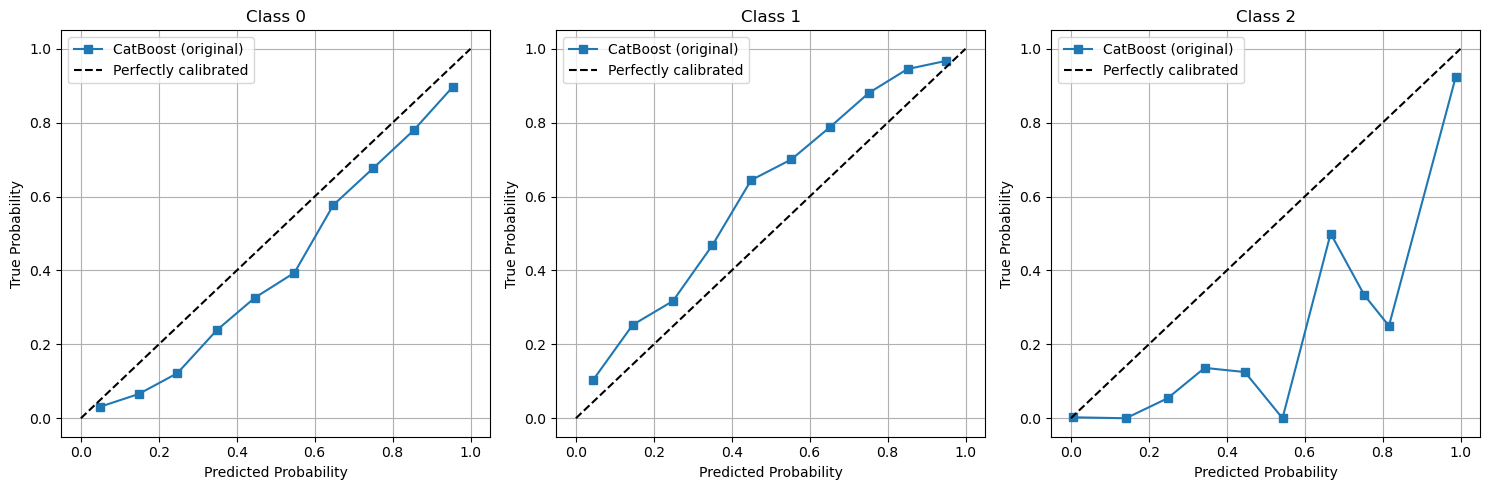


--- PLATT ---
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}
  True labels shape: (2885,), unique: [0 1 2]
  Prediction shape: (2885, 3)
=== Calibration Metrics for CatBoost (platt) ===
Brier Score: 0.0865
Log Loss: 0.4248
ECE: 0.0163
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}


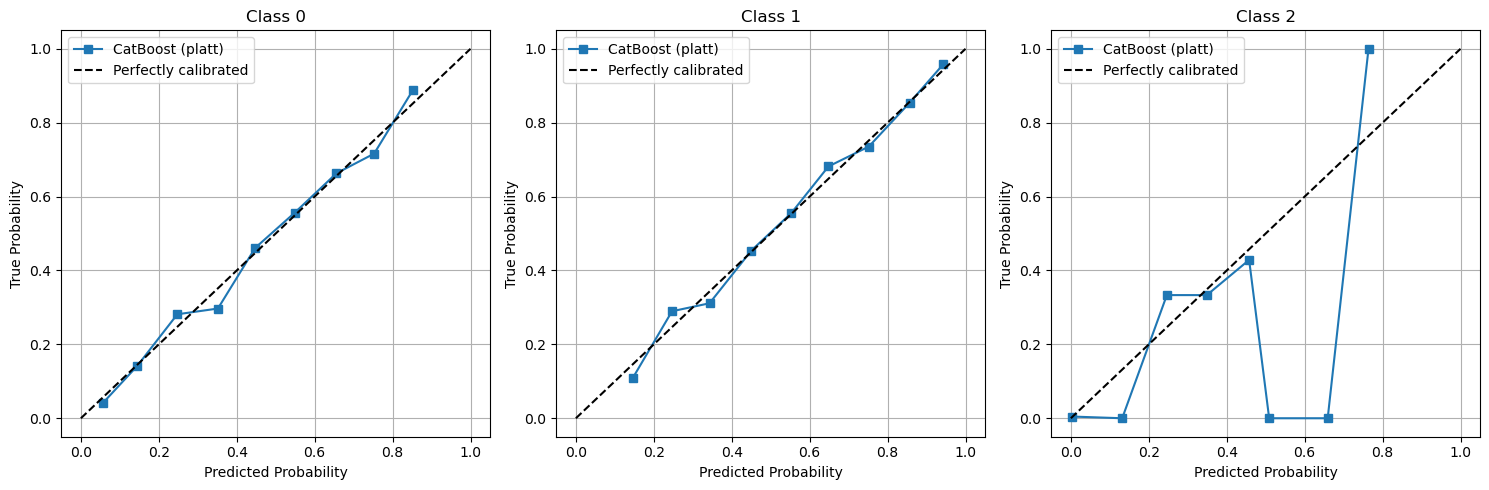


--- TEMPERATURE ---
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}
  True labels shape: (2885,), unique: [0 1 2]
  Prediction shape: (2885, 3)
=== Calibration Metrics for CatBoost (temperature) ===
Brier Score: 0.1242
Log Loss: 0.6187
ECE: 0.2181
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}


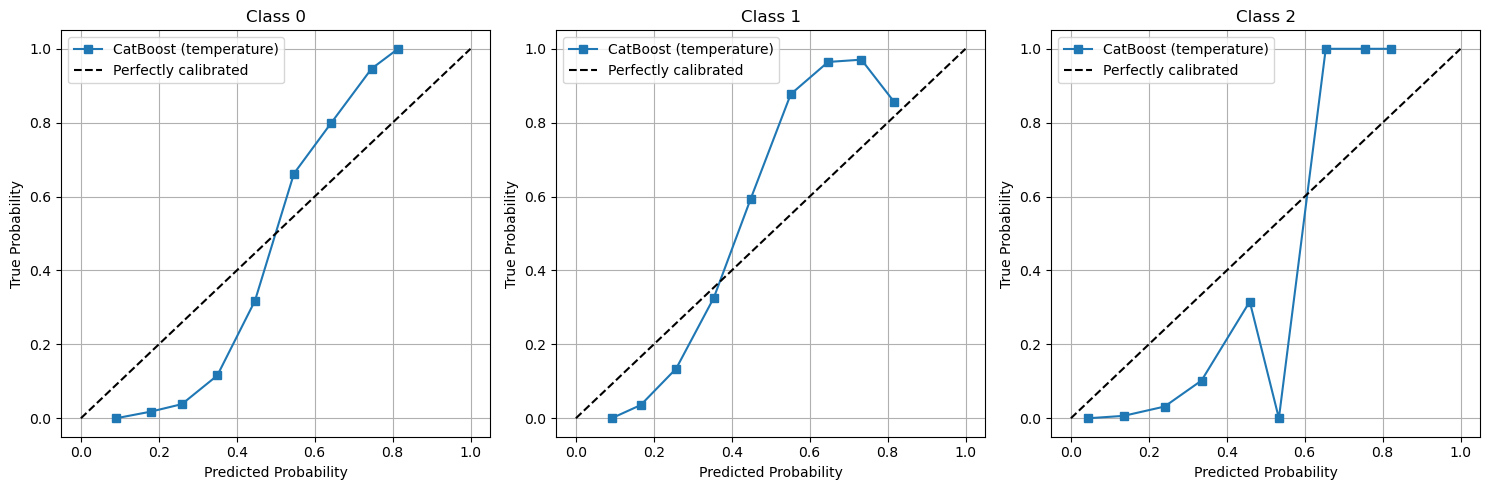


--- DIRICHLET ---
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}
  True labels shape: (2885,), unique: [0 1 2]
  Prediction shape: (2885, 3)
=== Calibration Metrics for CatBoost (dirichlet) ===
Brier Score: 0.0866
Log Loss: 0.4211
ECE: 0.0203
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}


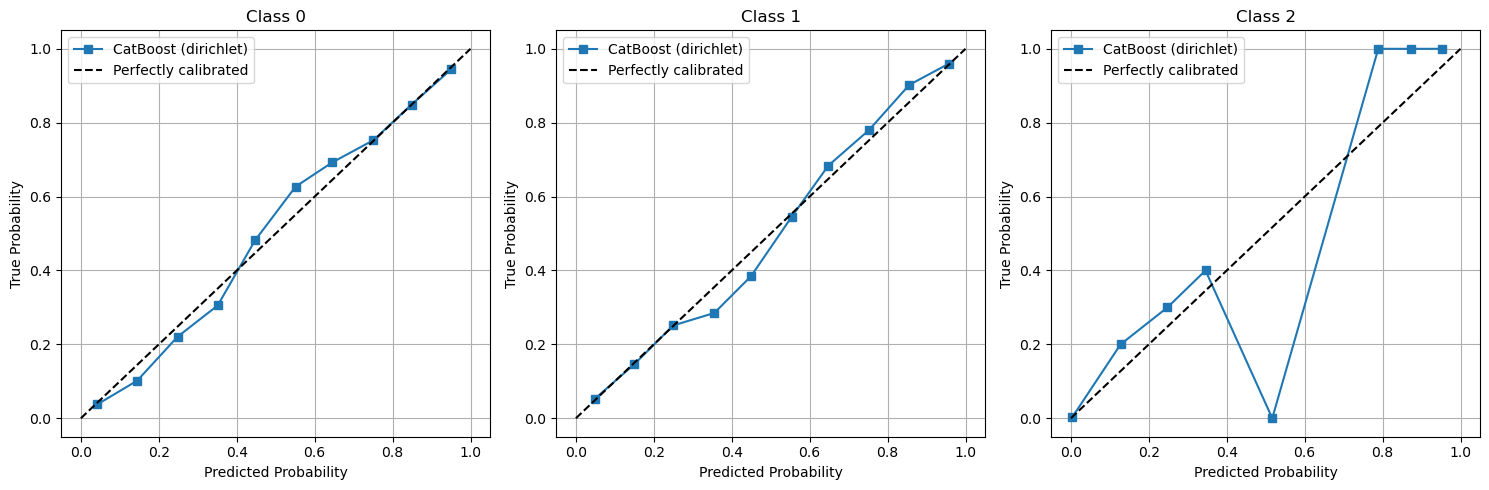


EVALUATING XGBoost

--- ORIGINAL ---
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}
  True labels shape: (2885,), unique: [0 1 2]
  Prediction shape: (2885, 3)
=== Calibration Metrics for XGBoost (original) ===
Brier Score: 0.0915
Log Loss: 0.4421
ECE: 0.0135
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}


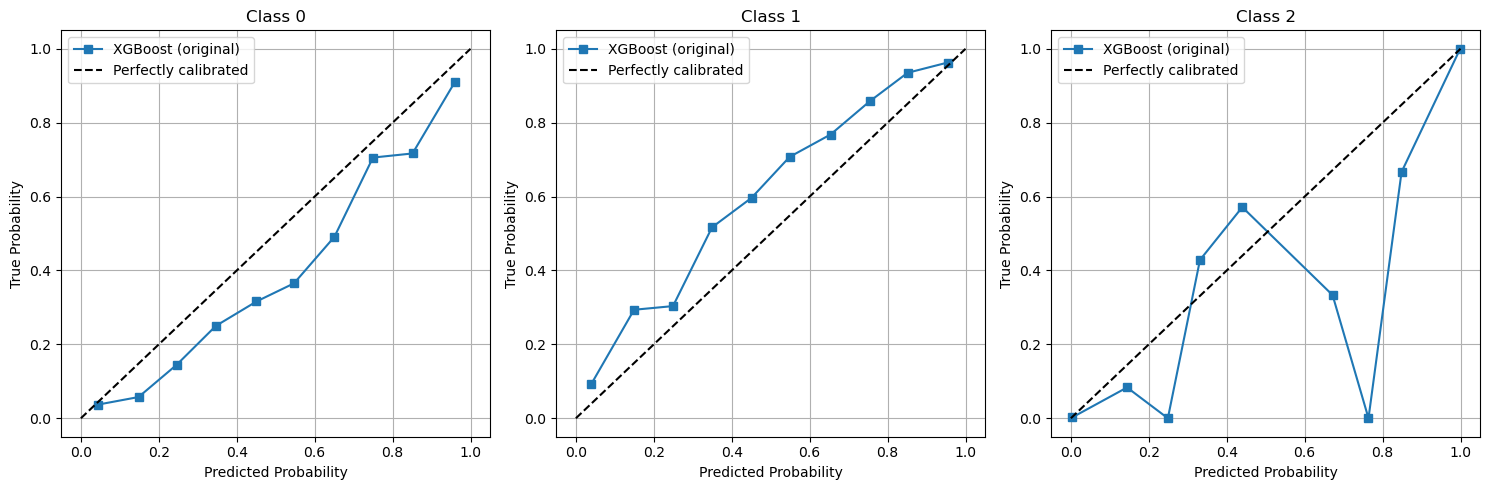


--- PLATT ---
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}
  True labels shape: (2885,), unique: [0 1 2]
  Prediction shape: (2885, 3)
=== Calibration Metrics for XGBoost (platt) ===
Brier Score: 0.0862
Log Loss: 0.4234
ECE: 0.0197
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}


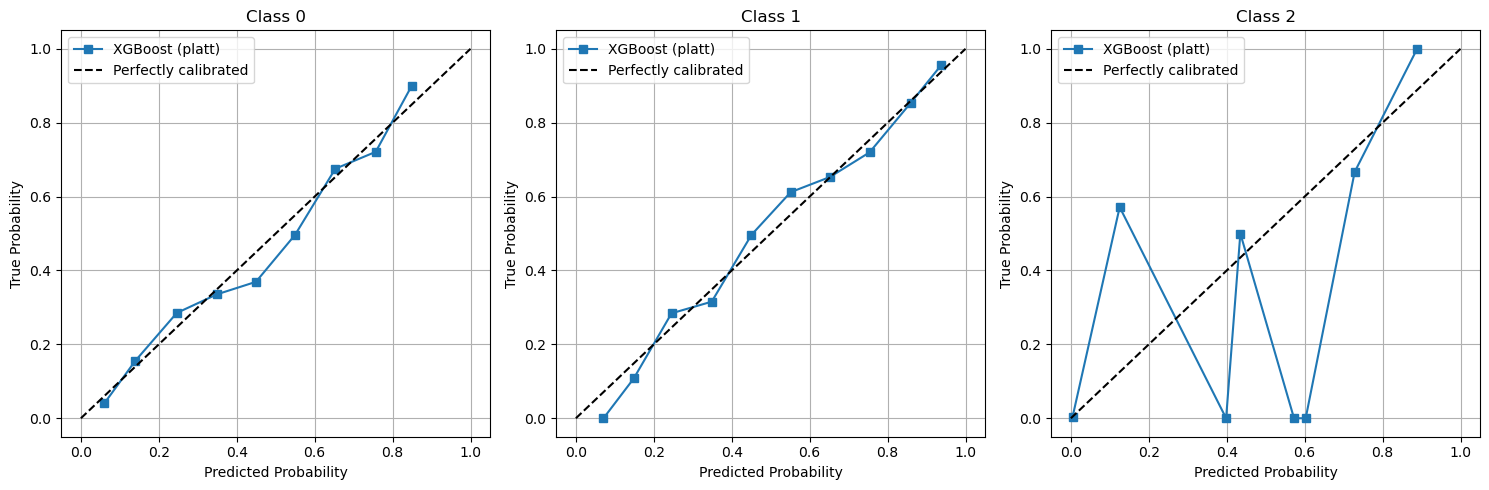


--- TEMPERATURE ---
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}
  True labels shape: (2885,), unique: [0 1 2]
  Prediction shape: (2885, 3)
=== Calibration Metrics for XGBoost (temperature) ===
Brier Score: 0.1206
Log Loss: 0.6045
ECE: 0.2149
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}


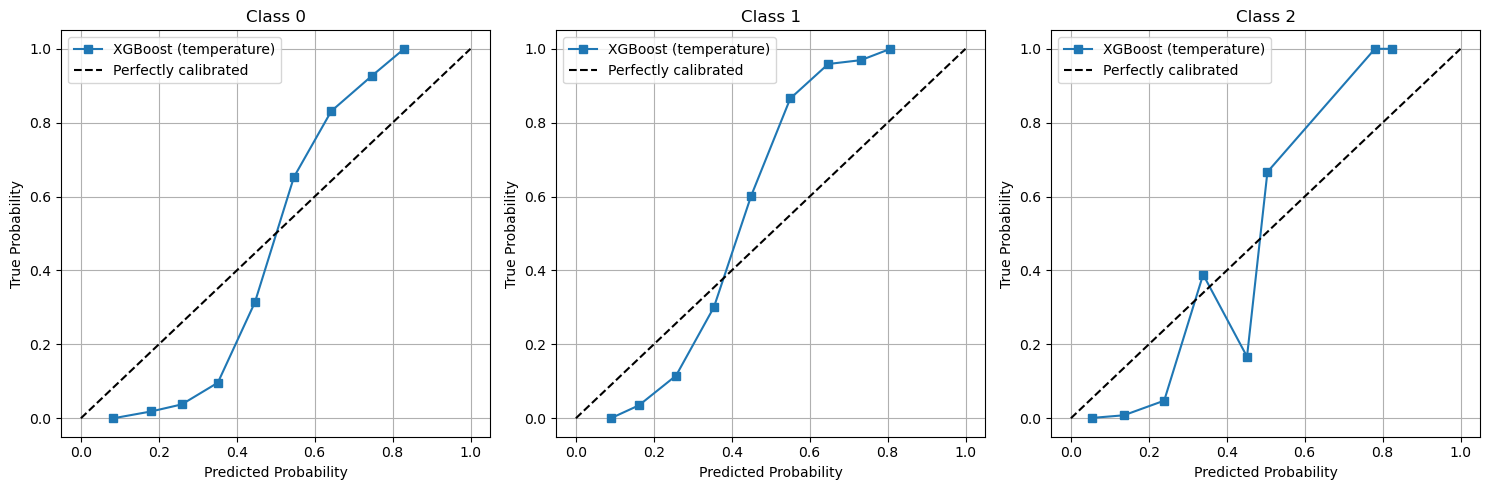


--- DIRICHLET ---
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}
  True labels shape: (2885,), unique: [0 1 2]
  Prediction shape: (2885, 3)
=== Calibration Metrics for XGBoost (dirichlet) ===
Brier Score: 0.0859
Log Loss: 0.4164
ECE: 0.0219
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}


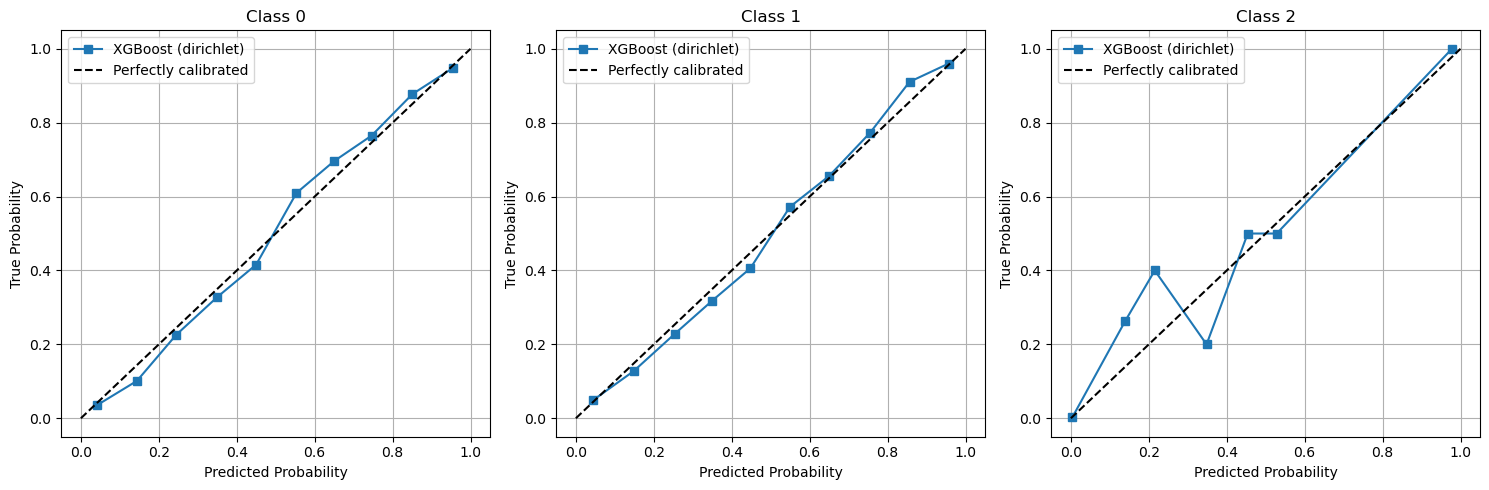

In [38]:
print("\nStep 2: Applying calibration to test data...")
test_calibrated, calibrator = apply_calibration(trained_models, X_test_df, oof_predictions)

print("\nStep 3: Evaluating calibration...")
all_metrics, all_figures = evaluate_all_calibrations(
    test_calibrated, 
    y_test_df,  
    oof_predictions
)

# Tringle 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from sklearn.preprocessing import LabelEncoder

def plot_triangle_calibration(y_true, methods, model_name="Model", n_bins=10):
    """
    Triangle calibration plot for 3-class classification
    Plots multiple calibration methods in subplots
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    methods : dict
        Dictionary with method_name: y_proba pairs
    model_name : str
        Name of the model for title
    n_bins : int
        Number of bins for calibration
    """
    
    # prepare data
    if hasattr(y_true, "iloc"):
        y_true_values = y_true.iloc[:, 0] if y_true.shape[1] == 1 else y_true 
    else:
        y_true_values = y_true
    
    le = LabelEncoder()
    y_true_encoded = le.fit_transform(y_true_values) 
    class_names = le.classes_

    # Create subplots 
    n_methods = len(methods)
    fig, axes = plt.subplots(1, n_methods, figsize=(5 * n_methods, 5))
    
    if n_methods == 1:
        axes = [axes]

    for idx, (method_name, y_proba) in enumerate(methods.items()):
        ax = axes[idx]
        print(f"--- {method_name.upper()} ---")
        
        # True class distribution in probability space
        plot_ternary_probability_space(ax, y_proba, y_true_encoded, class_names, 
                                     f"{model_name} ({method_name})")
    
    plt.tight_layout()
    return fig

def plot_ternary_probability_space(ax, y_proba, y_true, class_names, title):
    """
    Ternary plot showing true class distribution in probability simplex
    """

    if y_proba.shape[1] != 3:
        raise ValueError(f"Expected 3 classes, got {y_proba.shape[1]}")
    
    # Convert 3D probabilities to 2D coordinates
    x = 0.5 * (2 * y_proba[:, 1] + y_proba[:, 2])
    y = (np.sqrt(3)/2) * y_proba[:, 2]

    #  triangle
    vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
    triangle = Polygon(vertices, closed=True, fill=False, edgecolor="blue", 
                      linewidth=2, alpha=0.7)
    ax.add_patch(triangle)

    # add class labels
    ax.text(0, -0.05, class_names[0], ha='center', va='top', fontsize=12, fontweight='bold')
    ax.text(1, -0.05, class_names[1], ha='center', va='top', fontsize=12, fontweight='bold')
    ax.text(0.5, np.sqrt(3)/2 + 0.05, class_names[2], ha='center', va='bottom', fontsize=12, fontweight='bold')

    # plot points for each class
    colors = ['red', 'blue', 'green'] 
    for class_idx in range(len(colors)):
        mask = (y_true == class_idx)
        if np.sum(mask) > 0:  
            ax.scatter(x[mask], y[mask], c=colors[class_idx], alpha=0.6, 
                      label=f'True {class_names[class_idx]}', s=30, 
                      edgecolors='white', linewidth=0.5)
    
    # Add probability grid
    for i in np.linspace(0, 1, 5):
        # Lines parallel to sides
        ax.plot([i/2, 0.5 + i/2], [i*np.sqrt(3)/2, (1-i)*np.sqrt(3)/2], 
                'gray', alpha=0.3, linewidth=0.5)
        ax.plot([i, 1-i/2], [0, i*np.sqrt(3)/2], 'gray', alpha=0.3, linewidth=0.5)
        ax.plot([i/2, i], [i*np.sqrt(3)/2, 0], 'gray', alpha=0.3, linewidth=0.5)
    
    # Set limits and properties
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 0.95)
    ax.set_aspect('equal')
    ax.legend(loc='upper right')
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)

def evaluate_with_triangle_plots(calibrated_predictions, y_test):
    """
    Comprehensive evaluation with triangle plots for all models and methods
    """
    all_figures = {}
    
    for model_name, methods in calibrated_predictions.items():
        print(f"\n{'='*50}")
        print(f"TRIANGLE CALIBRATION: {model_name}")
        print(f"{'='*50}")

        # with all methods
        fig = plot_triangle_calibration(y_test, methods, model_name)
        all_figures[model_name] = fig
        plt.show()
    
    return all_figures

def plot_all_models_comparison(calibrated_predictions, y_test):
    """
    Plot all models and methods in a grid for easy comparison
    """
    # prepare true labels
    if hasattr(y_test, "iloc"):
        y_true_values = y_test.iloc[:, 0] if y_test.shape[1] == 1 else y_test 
    else:
        y_true_values = y_test
    
    le = LabelEncoder()
    y_true_encoded = le.fit_transform(y_true_values) 
    class_names = le.classes_
    
    # calculate grid size
    n_models = len(calibrated_predictions)
    max_methods = max(len(methods) for methods in calibrated_predictions.values())
    
    fig, axes = plt.subplots(n_models, max_methods, figsize=(5 * max_methods, 5 * n_models))
    
    if n_models == 1:
        axes = axes.reshape(1, -1)
    if max_methods == 1:
        axes = axes.reshape(-1, 1)
    
    # plot each model and method
    for model_idx, (model_name, methods) in enumerate(calibrated_predictions.items()):
        for method_idx, (method_name, y_proba) in enumerate(methods.items()):
            ax = axes[model_idx, method_idx]
            plot_ternary_probability_space(ax, y_proba, y_true_encoded, class_names,
                                         f"{model_name}\n({method_name})")
    
    for model_idx in range(n_models):
        for method_idx in range(len(list(calibrated_predictions.values())[model_idx]), max_methods):
            axes[model_idx, method_idx].set_visible(False)
    
    plt.tight_layout()
    return fig


Step 5: Triangle calibration visualization...

TRIANGLE CALIBRATION: CatBoost
--- ORIGINAL ---
--- PLATT ---
--- TEMPERATURE ---
--- DIRICHLET ---


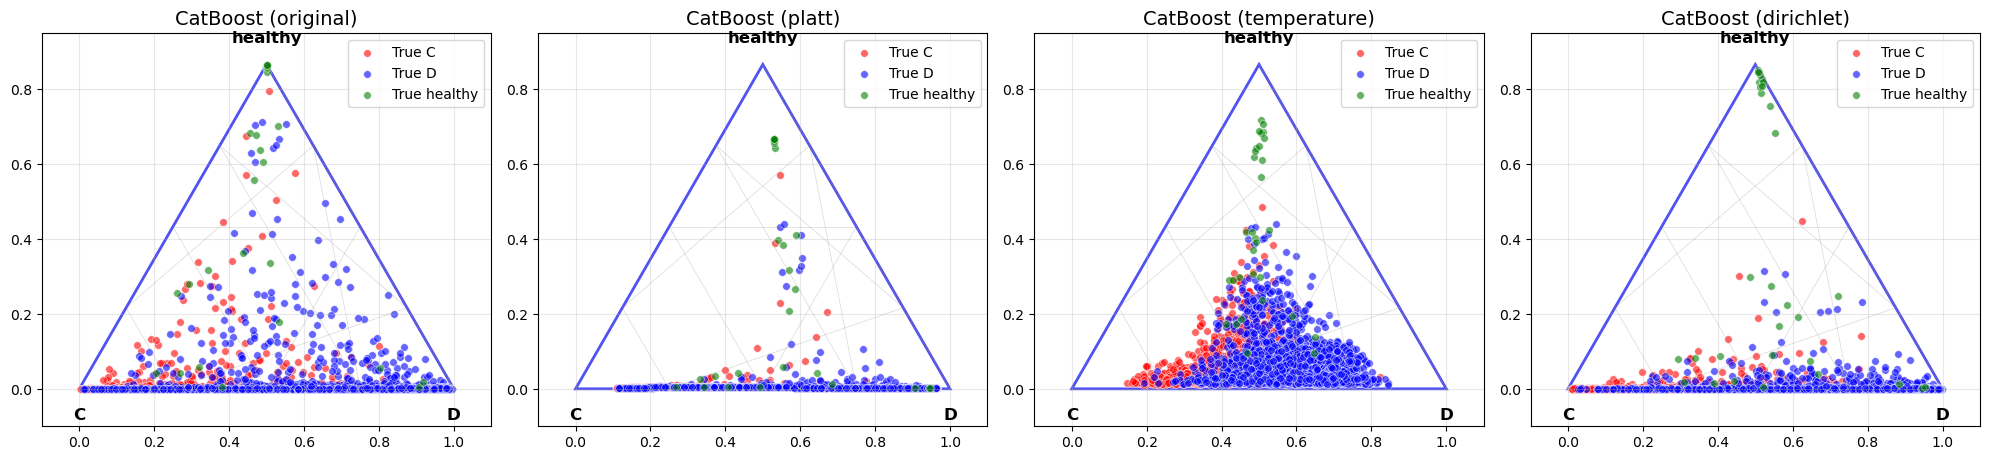


TRIANGLE CALIBRATION: XGBoost
--- ORIGINAL ---
--- PLATT ---
--- TEMPERATURE ---
--- DIRICHLET ---


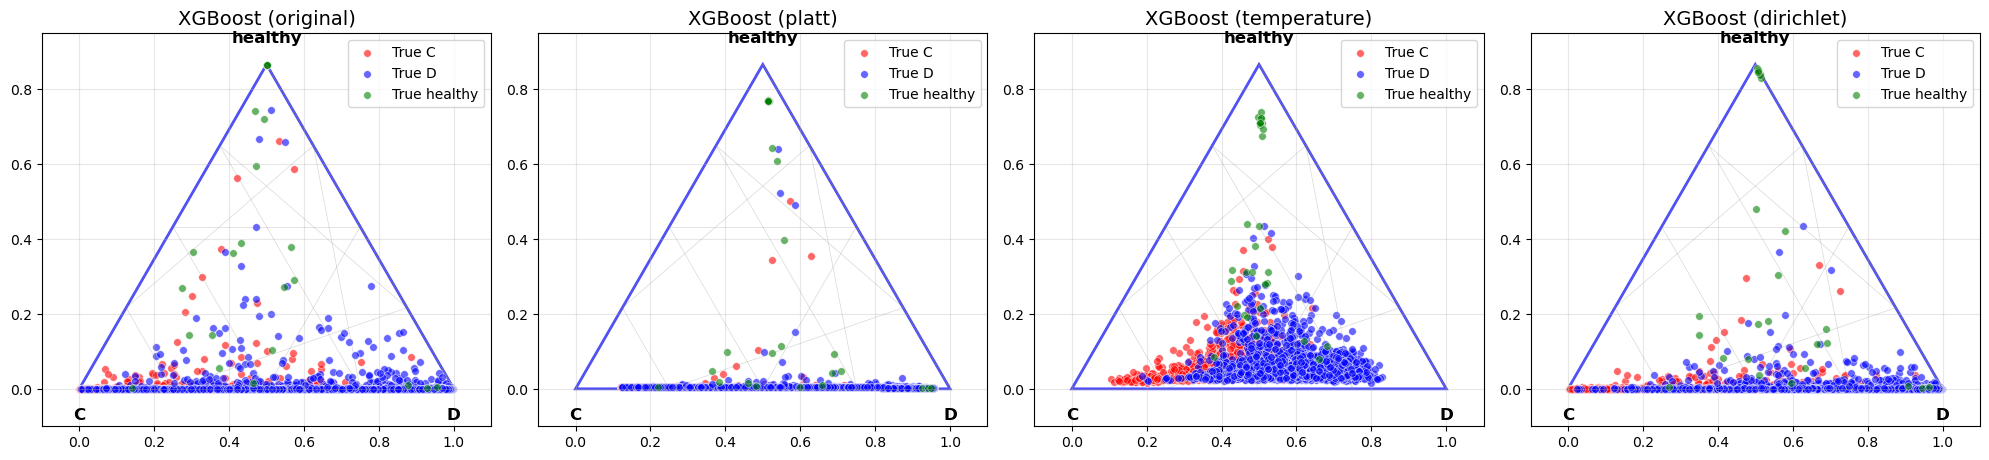

In [40]:
print("\nStep 5: Triangle calibration visualization...")
triangle_figures = evaluate_with_triangle_plots(test_calibrated, y_test_df)

## Cross validation + calibration

- Кросс-Валидация + Калибратор + Ансамблирование

Перейдем на русский 

## Итоговая Валидация

### Обучение калибратора:
1. **Собираем все OOF предсказания** от всех моделей и всех фолдов
2. **Обучаем единый калибратор** на этих предсказаниях
3. **Проверка тесте?** (`data_test`) - финальные метрики модели

- Калибратор обучается на OOF, проверяется на test - нет data leakage

### Метрики на test set:
- Log Loss - оценка качества вероятностей
- ECE (Expected Calibration Error) - оценка калибровки
- Brier Score - оценка качества вероятностей


## Optuna for XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder

def optimize_xgboost(
    X: pd.DataFrame,
    y: pd.Series,
    folds_indices: Dict,
    n_trials: int = 10,
    bias: int = 800,
    noise: bool = False,
    is_balanced: bool = True
) -> Tuple[Dict, pd.DataFrame]:
    
    def objective(trial):
        xgb_params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 200),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "max_depth": trial.suggest_int("max_depth", 3, 8),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
            "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
            "random_state": 42
        }
        
        cv_scores = []
        log_loss_scores = []
        
        for fold_idx in range(len(folds_indices)):
            fold_key = f"fold_{fold_idx}"
            if fold_key not in folds_indices:
                continue
                
            fold_data = folds_indices[fold_key]
            train_idx = fold_data[0]
            val_idx = fold_data[1]
            
            train_idx_list = train_idx.tolist() if hasattr(train_idx, 'tolist') else train_idx
            val_idx_list = val_idx.tolist() if hasattr(val_idx, 'tolist') else val_idx

            X_train, y_train = X.iloc[train_idx_list], y.iloc[train_idx_list]
            X_val, y_val = X.iloc[val_idx_list], y.iloc[val_idx_list]

            common_le = LabelEncoder()
            y_combined = pd.concat([y_train, y_val])
            common_le.fit(y_combined)
            
            y_train_encoded = common_le.transform(y_train)
            y_val_encoded = common_le.transform(y_val)
            
            X_train_processed, y_train_processed, X_val_processed, y_val_processed, label_encoder = preprocessing_data_for_training(
                X_train, y_train_encoded,  
                X_val, y_val_encoded,    
                use_onehot=True, bias=bias, noise=noise, is_balanced=is_balanced
            )


            if hasattr(y_train_processed, 'values'):
                y_train_values = y_train_processed.values.ravel()
            else:
                y_train_values = y_train_processed.ravel() if hasattr(y_train_processed, 'ravel') else y_train_processed
            
            if hasattr(y_val_processed, 'values'):
                y_val_values = y_val_processed.values.ravel()
            else:
                y_val_values = y_val_processed.ravel() if hasattr(y_val_processed, 'ravel') else y_val_processed

            unique_classes_train = np.unique(y_train_values)
            unique_classes_val = np.unique(y_val_values)
            
            if len(unique_classes_train) < 2:
                continue
            
            missing_classes = set(unique_classes_val) - set(unique_classes_train)
            if missing_classes:
                continue

            model = xgb.XGBClassifier(**xgb_params)
            model.fit(X_train_processed, y_train_values)  
            
        
            val_proba = model.predict_proba(X_val_processed)
            val_pred = np.argmax(val_proba, axis=1)
            
            log_loss_score = log_loss(y_val_encoded, val_proba)
            log_loss_scores.append(log_loss_score)
            
            f1_score_val = f1_score(y_val_encoded, val_pred, average='macro')
            cv_scores.append(f1_score_val)
            
            print(f"Fold {fold_idx}: LogLoss = {log_loss_score:.4f}, F1 = {f1_score_val:.4f}")
        
        if not log_loss_scores:
            return 10.0
            
        mean_log_loss = np.mean(log_loss_scores)
        mean_f1 = np.mean(cv_scores)
        
        trial.set_user_attr('mean_f1', mean_f1)
        trial.set_user_attr('std_f1', np.std(cv_scores))
        trial.set_user_attr('mean_log_loss', mean_log_loss)
        trial.set_user_attr('successful_folds', len(log_loss_scores))
        
        print(f"Trial {trial.number}: Mean LogLoss = {mean_log_loss:.4f}, Mean F1 = {mean_f1:.4f}")
        
        return mean_log_loss

    study = optuna.create_study(
        direction='minimize',
        sampler=optuna.samplers.TPESampler(seed=42)
    )
    
    study.optimize(objective, n_trials=n_trials, show_progress_bar=False)
    
    if study.best_trial:
        best_xgb_params = study.best_params
        best_log_loss = study.best_value
        
        print(f"\n🎯 XGBoost optimization completed")
        print(f"Best XGBoost parameters: {best_xgb_params}")
        print(f"Best log loss: {best_log_loss:.4f}")
        print(f"Best F1 score: {study.best_trial.user_attrs['mean_f1']:.4f}")
        
        compatible_params = {
            "params": best_xgb_params,
            "needs_cat_features": False,
            "use_onehot": True,
            "needs_imputation": False,
            "use_eval_set": False,
            "shap": False,
            "use_native_api": False,
        }
        
        results_df = pd.DataFrame([{
            'model': "XGBoost_optimized",
            'xgb_params': str(best_xgb_params),
            'n_trials': len(study.trials),
            'successful_folds': study.best_trial.user_attrs['successful_folds'],
            'mean_log_loss': best_log_loss,
            'mean_f1': study.best_trial.user_attrs['mean_f1'],
            'calibration_method': 'none'
        }])
        
        return compatible_params, results_df
    else:
        print("❌ No successful trials completed")
        return {}, pd.DataFrame()

In [42]:
best_params, optimization_results = optimize_xgboost(
    X=X_train_df, 
    y=y_train_df, 
    folds_indices=folds_indices_clean,
    n_trials=30
)

[I 2025-11-23 19:27:51,243] A new study created in memory with name: no-name-cdef87b6-f3e7-420d-8c07-720598b08bb3
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4688, F1 = 0.7005


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4801, F1 = 0.6878


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4691, F1 = 0.6945


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4613, F1 = 0.7226


[I 2025-11-23 19:27:54,831] Trial 0 finished with value: 0.4707331359764013 and parameters: {'n_estimators': 106, 'learning_rate': 0.2536999076681772, 'max_depth': 7, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 0.7799726016810132, 'reg_lambda': 0.2904180608409973}. Best is trial 0 with value: 0.4707331359764013.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4743, F1 = 0.7251
Trial 0: Mean LogLoss = 0.4707, Mean F1 = 0.7061


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4561, F1 = 0.7145


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4554, F1 = 0.6755


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4468, F1 = 0.7004


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4407, F1 = 0.7123


[I 2025-11-23 19:28:02,020] Trial 1 finished with value: 0.45237215412800447 and parameters: {'n_estimators': 180, 'learning_rate': 0.07725378389307355, 'max_depth': 7, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'reg_alpha': 4.162213204002109, 'reg_lambda': 1.0616955533913808}. Best is trial 1 with value: 0.45237215412800447.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4629, F1 = 0.7089
Trial 1: Mean LogLoss = 0.4524, Mean F1 = 0.7024


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.7681, F1 = 0.5193


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.7546, F1 = 0.5416


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.7621, F1 = 0.5385


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.7536, F1 = 0.5441


[I 2025-11-23 19:28:03,686] Trial 2 finished with value: 0.7598395464738654 and parameters: {'n_estimators': 77, 'learning_rate': 0.018659959624904916, 'max_depth': 4, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'reg_alpha': 1.4561457009902097, 'reg_lambda': 3.0592644736118975}. Best is trial 1 with value: 0.45237215412800447.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.7607, F1 = 0.5503
Trial 2: Mean LogLoss = 0.7598, Mean F1 = 0.5388


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.6823, F1 = 0.5444


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.6700, F1 = 0.5748


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.6772, F1 = 0.5702


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.6664, F1 = 0.5794


[I 2025-11-23 19:28:05,616] Trial 3 finished with value: 0.6743270842822693 and parameters: {'n_estimators': 71, 'learning_rate': 0.027010527749605478, 'max_depth': 5, 'subsample': 0.7824279936868144, 'colsample_bytree': 0.9140703845572055, 'reg_alpha': 0.9983689107917987, 'reg_lambda': 2.571172192068058}. Best is trial 1 with value: 0.45237215412800447.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.6758, F1 = 0.5852
Trial 3: Mean LogLoss = 0.6743, Mean F1 = 0.5708


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.7021, F1 = 0.5575


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.6899, F1 = 0.5850


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.6945, F1 = 0.5787


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.6888, F1 = 0.5857


[I 2025-11-23 19:28:09,409] Trial 4 finished with value: 0.693482535686179 and parameters: {'n_estimators': 139, 'learning_rate': 0.011711509955524094, 'max_depth': 6, 'subsample': 0.6682096494749166, 'colsample_bytree': 0.6260206371941118, 'reg_alpha': 4.7444276862666666, 'reg_lambda': 4.828160165372797}. Best is trial 1 with value: 0.45237215412800447.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.6921, F1 = 0.5868
Trial 4: Mean LogLoss = 0.6935, Mean F1 = 0.5788


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.6450, F1 = 0.5434


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.6277, F1 = 0.5580


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.6341, F1 = 0.5602


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.6236, F1 = 0.5631


[I 2025-11-23 19:28:11,786] Trial 5 finished with value: 0.6324987833371564 and parameters: {'n_estimators': 172, 'learning_rate': 0.028180680291847244, 'max_depth': 3, 'subsample': 0.8736932106048627, 'colsample_bytree': 0.7760609974958406, 'reg_alpha': 0.6101911742238941, 'reg_lambda': 2.475884550556351}. Best is trial 1 with value: 0.45237215412800447.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.6322, F1 = 0.5635
Trial 5: Mean LogLoss = 0.6325, Mean F1 = 0.5576


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.5071, F1 = 0.6311


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.5033, F1 = 0.6149


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.5006, F1 = 0.6249


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4895, F1 = 0.6370


[I 2025-11-23 19:28:13,022] Trial 6 finished with value: 0.501181837902109 and parameters: {'n_estimators': 55, 'learning_rate': 0.22038218939289875, 'max_depth': 4, 'subsample': 0.8650089137415928, 'colsample_bytree': 0.7246844304357644, 'reg_alpha': 2.600340105889054, 'reg_lambda': 2.7335513967163982}. Best is trial 1 with value: 0.45237215412800447.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.5054, F1 = 0.6410
Trial 6: Mean LogLoss = 0.5012, Mean F1 = 0.6298


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4599, F1 = 0.7223


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4614, F1 = 0.6716


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4488, F1 = 0.7002


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4516, F1 = 0.7044


[I 2025-11-23 19:28:16,265] Trial 7 finished with value: 0.4586046071902431 and parameters: {'n_estimators': 77, 'learning_rate': 0.27051668818999286, 'max_depth': 7, 'subsample': 0.9757995766256756, 'colsample_bytree': 0.9579309401710595, 'reg_alpha': 2.9894998940554256, 'reg_lambda': 4.609371175115584}. Best is trial 1 with value: 0.45237215412800447.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4713, F1 = 0.7287
Trial 7: Mean LogLoss = 0.4586, Mean F1 = 0.7055


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.8330, F1 = 0.4941


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.8191, F1 = 0.5096


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.8272, F1 = 0.5158


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.8163, F1 = 0.5192


[I 2025-11-23 19:28:17,489] Trial 8 finished with value: 0.8236723286478428 and parameters: {'n_estimators': 63, 'learning_rate': 0.01947558230629543, 'max_depth': 3, 'subsample': 0.7301321323053057, 'colsample_bytree': 0.7554709158757928, 'reg_alpha': 1.3567451588694794, 'reg_lambda': 4.143687545759647}. Best is trial 1 with value: 0.45237215412800447.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.8228, F1 = 0.5235
Trial 8: Mean LogLoss = 0.8237, Mean F1 = 0.5124


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.6051, F1 = 0.5737


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.5928, F1 = 0.6026


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.5960, F1 = 0.5991


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.5880, F1 = 0.6059


[I 2025-11-23 19:28:20,877] Trial 9 finished with value: 0.5953664266949119 and parameters: {'n_estimators': 103, 'learning_rate': 0.026000059117302653, 'max_depth': 6, 'subsample': 0.6563696899899051, 'colsample_bytree': 0.9208787923016158, 'reg_alpha': 0.3727532183988541, 'reg_lambda': 4.9344346830025865}. Best is trial 1 with value: 0.45237215412800447.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.5948, F1 = 0.6067
Trial 9: Mean LogLoss = 0.5954, Mean F1 = 0.5976


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4528, F1 = 0.7168


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4557, F1 = 0.6876


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4472, F1 = 0.6955


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4434, F1 = 0.7085


[I 2025-11-23 19:28:30,367] Trial 10 finished with value: 0.4526817861723128 and parameters: {'n_estimators': 197, 'learning_rate': 0.09289825888463438, 'max_depth': 8, 'subsample': 0.6071847502459278, 'colsample_bytree': 0.8607466203112714, 'reg_alpha': 4.538323976412589, 'reg_lambda': 0.4044381318692343}. Best is trial 1 with value: 0.45237215412800447.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4642, F1 = 0.7117
Trial 10: Mean LogLoss = 0.4527, Mean F1 = 0.7040


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4532, F1 = 0.7306


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4578, F1 = 0.6753


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4452, F1 = 0.7010


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4387, F1 = 0.7078


[I 2025-11-23 19:28:39,660] Trial 11 finished with value: 0.4508767193358324 and parameters: {'n_estimators': 198, 'learning_rate': 0.08433020501242805, 'max_depth': 8, 'subsample': 0.6034989467874442, 'colsample_bytree': 0.8663210156640421, 'reg_alpha': 4.83276824082136, 'reg_lambda': 0.34135235013755527}. Best is trial 11 with value: 0.4508767193358324.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4595, F1 = 0.7204
Trial 11: Mean LogLoss = 0.4509, Mean F1 = 0.7070


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4531, F1 = 0.7249


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4577, F1 = 0.6760


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4457, F1 = 0.7005


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4400, F1 = 0.7054


[I 2025-11-23 19:28:49,414] Trial 12 finished with value: 0.4523486321420693 and parameters: {'n_estimators': 200, 'learning_rate': 0.08224826689440815, 'max_depth': 8, 'subsample': 0.601687448505531, 'colsample_bytree': 0.8593138120547102, 'reg_alpha': 3.811321081835723, 'reg_lambda': 1.1882641726908643}. Best is trial 11 with value: 0.4508767193358324.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4652, F1 = 0.7136
Trial 12: Mean LogLoss = 0.4523, Mean F1 = 0.7041


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4555, F1 = 0.7192


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4601, F1 = 0.6857


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4539, F1 = 0.6933


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4486, F1 = 0.6975


[I 2025-11-23 19:28:56,905] Trial 13 finished with value: 0.4566052221160211 and parameters: {'n_estimators': 154, 'learning_rate': 0.1379880595704794, 'max_depth': 8, 'subsample': 0.7018834018876883, 'colsample_bytree': 0.8315118000603794, 'reg_alpha': 3.6916079711361824, 'reg_lambda': 1.5547522970925696}. Best is trial 11 with value: 0.4508767193358324.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4649, F1 = 0.7284
Trial 13: Mean LogLoss = 0.4566, Mean F1 = 0.7048


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4550, F1 = 0.7083


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4571, F1 = 0.6809


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4482, F1 = 0.7086


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4420, F1 = 0.7046


[I 2025-11-23 19:29:07,088] Trial 14 finished with value: 0.45272107706530174 and parameters: {'n_estimators': 199, 'learning_rate': 0.052714935621201345, 'max_depth': 8, 'subsample': 0.6009606363810039, 'colsample_bytree': 0.8660442697567039, 'reg_alpha': 3.6021423244605537, 'reg_lambda': 1.2250934224353474}. Best is trial 11 with value: 0.4508767193358324.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4614, F1 = 0.7122
Trial 14: Mean LogLoss = 0.4527, Mean F1 = 0.7029


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4616, F1 = 0.7032


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4607, F1 = 0.6685


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4506, F1 = 0.6948


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4474, F1 = 0.7114


[I 2025-11-23 19:29:16,045] Trial 15 finished with value: 0.4568922608070339 and parameters: {'n_estimators': 171, 'learning_rate': 0.05375323690782542, 'max_depth': 8, 'subsample': 0.7406475983538551, 'colsample_bytree': 0.824322287889839, 'reg_alpha': 4.993332443583148, 'reg_lambda': 1.8026506817912487}. Best is trial 11 with value: 0.4508767193358324.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4642, F1 = 0.7067
Trial 15: Mean LogLoss = 0.4569, Mean F1 = 0.6969


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4589, F1 = 0.7021


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4581, F1 = 0.6792


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4527, F1 = 0.7043


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4445, F1 = 0.7146


[I 2025-11-23 19:29:23,052] Trial 16 finished with value: 0.45586826069189124 and parameters: {'n_estimators': 148, 'learning_rate': 0.13997761199179432, 'max_depth': 7, 'subsample': 0.6680833174844744, 'colsample_bytree': 0.8942061038533579, 'reg_alpha': 3.8117165306078373, 'reg_lambda': 0.05494594621885662}. Best is trial 11 with value: 0.4508767193358324.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4652, F1 = 0.7219
Trial 16: Mean LogLoss = 0.4559, Mean F1 = 0.7044


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4480, F1 = 0.7058


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4564, F1 = 0.6760


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4436, F1 = 0.7016


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4407, F1 = 0.6909


[I 2025-11-23 19:29:28,861] Trial 17 finished with value: 0.449158780171409 and parameters: {'n_estimators': 186, 'learning_rate': 0.08397985530979196, 'max_depth': 6, 'subsample': 0.9353523847892583, 'colsample_bytree': 0.7178888678782729, 'reg_alpha': 3.107458468158778, 'reg_lambda': 0.7190004434253983}. Best is trial 17 with value: 0.449158780171409.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4572, F1 = 0.7101
Trial 17: Mean LogLoss = 0.4492, Mean F1 = 0.6969


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.5559, F1 = 0.5809


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.5424, F1 = 0.6073


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.5434, F1 = 0.6118


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.5335, F1 = 0.6101


[I 2025-11-23 19:29:32,205] Trial 18 finished with value: 0.5444044381468307 and parameters: {'n_estimators': 123, 'learning_rate': 0.04120418809588509, 'max_depth': 5, 'subsample': 0.947196230692719, 'colsample_bytree': 0.6938348866296692, 'reg_alpha': 1.9438459739319314, 'reg_lambda': 0.5490876404984002}. Best is trial 17 with value: 0.449158780171409.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.5468, F1 = 0.6109
Trial 18: Mean LogLoss = 0.5444, Mean F1 = 0.6042


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4485, F1 = 0.7152


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4577, F1 = 0.6846


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4478, F1 = 0.6954


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4409, F1 = 0.7241


[I 2025-11-23 19:29:37,779] Trial 19 finished with value: 0.45090618617479017 and parameters: {'n_estimators': 183, 'learning_rate': 0.13145153053823252, 'max_depth': 6, 'subsample': 0.9226524481449101, 'colsample_bytree': 0.6076476017091075, 'reg_alpha': 3.1015942606681635, 'reg_lambda': 2.0204488173545734}. Best is trial 17 with value: 0.449158780171409.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4596, F1 = 0.7353
Trial 19: Mean LogLoss = 0.4509, Mean F1 = 0.7109


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4573, F1 = 0.7058


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4592, F1 = 0.6545


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4512, F1 = 0.6992


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4462, F1 = 0.6843


[I 2025-11-23 19:29:42,128] Trial 20 finished with value: 0.4551493643586585 and parameters: {'n_estimators': 162, 'learning_rate': 0.1060355250290057, 'max_depth': 5, 'subsample': 0.9183471047574292, 'colsample_bytree': 0.7302268270685699, 'reg_alpha': 2.1637280559024576, 'reg_lambda': 0.7581397209665712}. Best is trial 17 with value: 0.449158780171409.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4618, F1 = 0.7024
Trial 20: Mean LogLoss = 0.4551, Mean F1 = 0.6892


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4510, F1 = 0.7156


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4596, F1 = 0.6861


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4468, F1 = 0.6997


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4453, F1 = 0.7057


[I 2025-11-23 19:29:48,068] Trial 21 finished with value: 0.45331007022387554 and parameters: {'n_estimators': 186, 'learning_rate': 0.1619582695853621, 'max_depth': 6, 'subsample': 0.9144973659684654, 'colsample_bytree': 0.6009317679470424, 'reg_alpha': 3.045277929317315, 'reg_lambda': 2.004831188261247}. Best is trial 17 with value: 0.449158780171409.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4638, F1 = 0.7359
Trial 21: Mean LogLoss = 0.4533, Mean F1 = 0.7086


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4636, F1 = 0.6823


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4646, F1 = 0.6513


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4557, F1 = 0.6845


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4511, F1 = 0.6995


[I 2025-11-23 19:29:53,754] Trial 22 finished with value: 0.46024739810674403 and parameters: {'n_estimators': 184, 'learning_rate': 0.06238898843560934, 'max_depth': 6, 'subsample': 0.992272743635207, 'colsample_bytree': 0.6626715973982347, 'reg_alpha': 3.200322761272409, 'reg_lambda': 0.860110830436217}. Best is trial 17 with value: 0.449158780171409.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4663, F1 = 0.6990
Trial 22: Mean LogLoss = 0.4602, Mean F1 = 0.6833


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4482, F1 = 0.7260


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4553, F1 = 0.6832


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4430, F1 = 0.7126


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4386, F1 = 0.6990


[I 2025-11-23 19:30:00,971] Trial 23 finished with value: 0.4483456070404487 and parameters: {'n_estimators': 164, 'learning_rate': 0.1135159573342584, 'max_depth': 7, 'subsample': 0.9072007215990351, 'colsample_bytree': 0.6554244341755404, 'reg_alpha': 2.4137082037457356, 'reg_lambda': 2.117594804355855}. Best is trial 23 with value: 0.4483456070404487.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4565, F1 = 0.7129
Trial 23: Mean LogLoss = 0.4483, Mean F1 = 0.7068


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4609, F1 = 0.7302


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4625, F1 = 0.6926


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4561, F1 = 0.7015


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4511, F1 = 0.7043


[I 2025-11-23 19:30:08,538] Trial 24 finished with value: 0.4591590755041273 and parameters: {'n_estimators': 160, 'learning_rate': 0.18582511279788766, 'max_depth': 7, 'subsample': 0.8813634668972504, 'colsample_bytree': 0.6778959854819179, 'reg_alpha': 2.461308998675068, 'reg_lambda': 3.5936976664612432}. Best is trial 23 with value: 0.4483456070404487.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4652, F1 = 0.7297
Trial 24: Mean LogLoss = 0.4592, Mean F1 = 0.7117


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4502, F1 = 0.7217


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4536, F1 = 0.6905


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4428, F1 = 0.7110


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4361, F1 = 0.7115


[I 2025-11-23 19:30:14,794] Trial 25 finished with value: 0.4475742276630913 and parameters: {'n_estimators': 137, 'learning_rate': 0.11442165595853783, 'max_depth': 7, 'subsample': 0.955156612850258, 'colsample_bytree': 0.7202356901441708, 'reg_alpha': 1.840782563085835, 'reg_lambda': 1.546792854520283}. Best is trial 25 with value: 0.4475742276630913.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4551, F1 = 0.7107
Trial 25: Mean LogLoss = 0.4476, Mean F1 = 0.7091


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4461, F1 = 0.7071


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4553, F1 = 0.6764


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4428, F1 = 0.7123


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4355, F1 = 0.7151


[I 2025-11-23 19:30:21,032] Trial 26 finished with value: 0.4466351692007737 and parameters: {'n_estimators': 136, 'learning_rate': 0.11413271771208298, 'max_depth': 7, 'subsample': 0.9477391555669401, 'colsample_bytree': 0.7096769816722809, 'reg_alpha': 1.4516293376103024, 'reg_lambda': 1.5279712428992986}. Best is trial 26 with value: 0.4466351692007737.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4535, F1 = 0.7208
Trial 26: Mean LogLoss = 0.4466, Mean F1 = 0.7064


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4463, F1 = 0.7167


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4532, F1 = 0.6800


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4430, F1 = 0.7054


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4313, F1 = 0.7200


[I 2025-11-23 19:30:26,529] Trial 27 finished with value: 0.44551916720476115 and parameters: {'n_estimators': 131, 'learning_rate': 0.1073078057510576, 'max_depth': 7, 'subsample': 0.9670091690477948, 'colsample_bytree': 0.6416943019764383, 'reg_alpha': 1.7225560083465803, 'reg_lambda': 1.519200650514835}. Best is trial 27 with value: 0.44551916720476115.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4538, F1 = 0.7347
Trial 27: Mean LogLoss = 0.4455, Mean F1 = 0.7114


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.4629, F1 = 0.7147


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.4668, F1 = 0.6954


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.4516, F1 = 0.7015


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4443, F1 = 0.7084


[I 2025-11-23 19:30:32,550] Trial 28 finished with value: 0.457793189571328 and parameters: {'n_estimators': 129, 'learning_rate': 0.1993499115595123, 'max_depth': 7, 'subsample': 0.9664627745471944, 'colsample_bytree': 0.6985360876496636, 'reg_alpha': 1.7259164875275532, 'reg_lambda': 1.5180438461010621}. Best is trial 27 with value: 0.44551916720476115.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 0.4633, F1 = 0.7204
Trial 28: Mean LogLoss = 0.4578, Mean F1 = 0.7081


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 0.5182, F1 = 0.6257


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 0.5068, F1 = 0.6384


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 0.5047, F1 = 0.6606


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 0.4962, F1 = 0.6656


[I 2025-11-23 19:30:37,400] Trial 29 finished with value: 0.5070933889099851 and parameters: {'n_estimators': 108, 'learning_rate': 0.04089244043487527, 'max_depth': 7, 'subsample': 0.8279713273862134, 'colsample_bytree': 0.6445667361545357, 'reg_alpha': 1.0601223413365104, 'reg_lambda': 1.5082553784369295}. Best is trial 27 with value: 0.44551916720476115.


Fold 4: LogLoss = 0.5095, F1 = 0.6527
Trial 29: Mean LogLoss = 0.5071, Mean F1 = 0.6486

🎯 XGBoost optimization completed
Best XGBoost parameters: {'n_estimators': 131, 'learning_rate': 0.1073078057510576, 'max_depth': 7, 'subsample': 0.9670091690477948, 'colsample_bytree': 0.6416943019764383, 'reg_alpha': 1.7225560083465803, 'reg_lambda': 1.519200650514835}
Best log loss: 0.4455
Best F1 score: 0.7114


XGBoost Cross-Validation:   0%|          | 0/5 [00:00<?, ?it/s]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  20%|██        | 1/5 [00:00<00:03,  1.07it/s]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  40%|████      | 2/5 [00:01<00:02,  1.05it/s]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  60%|██████    | 3/5 [00:03<00:02,  1.02s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  80%|████████  | 4/5 [00:04<00:01,  1.11s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


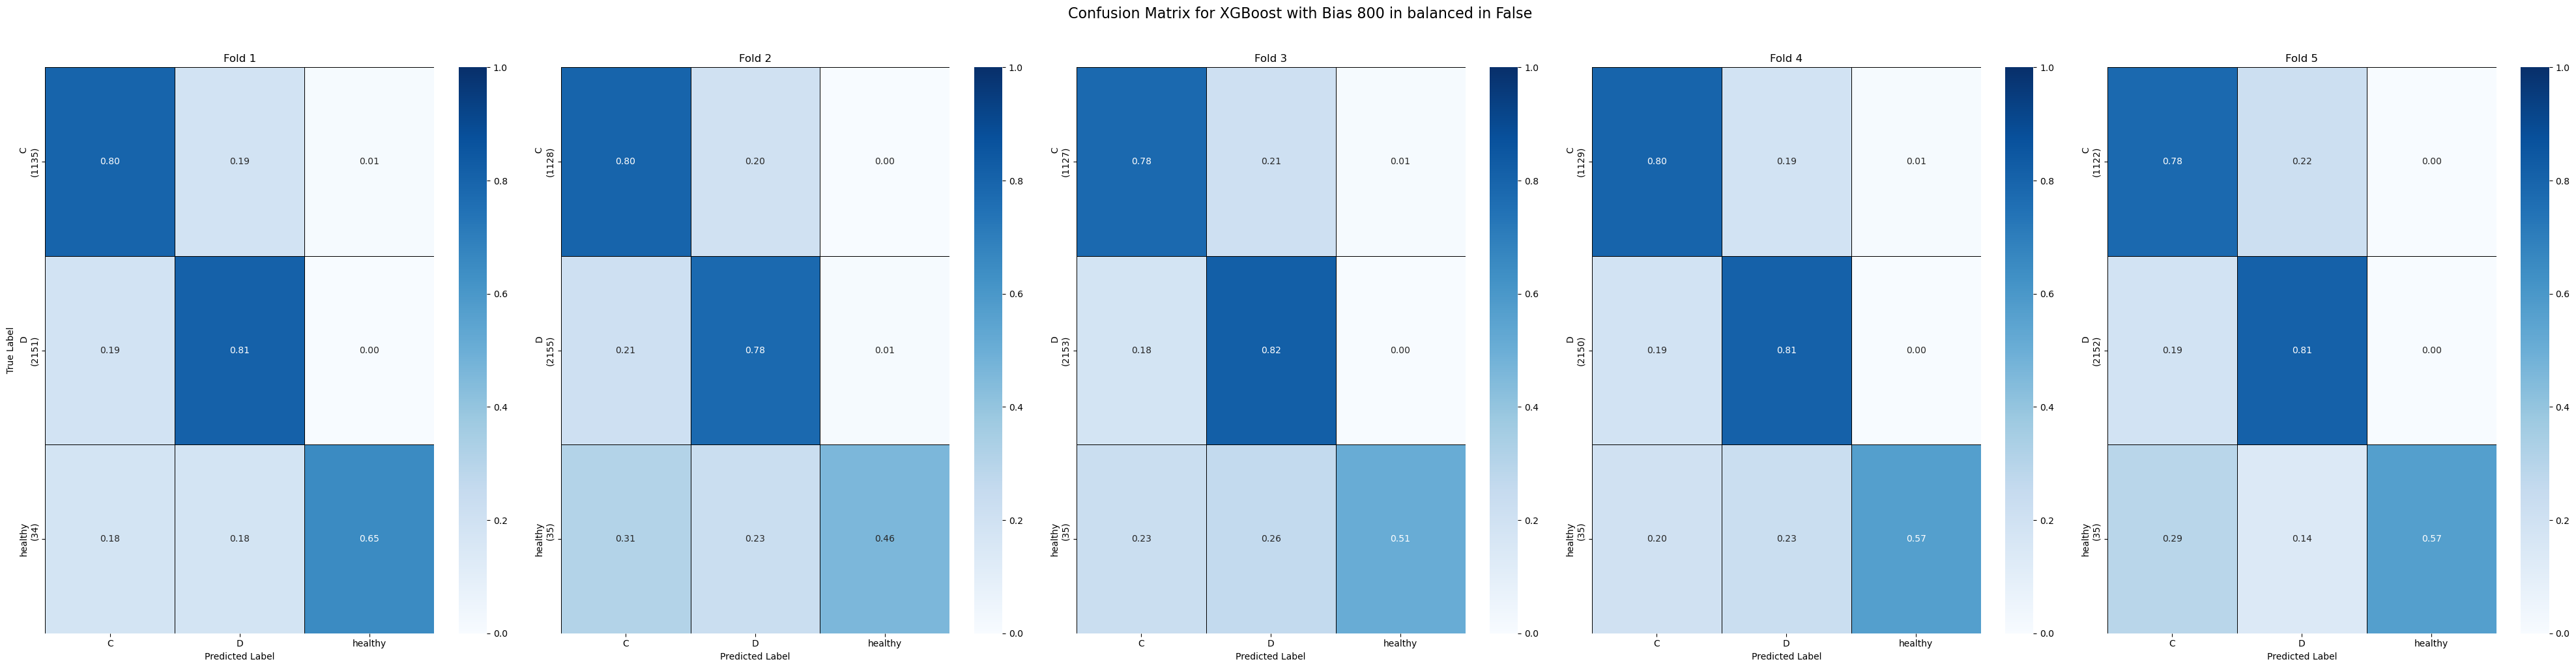

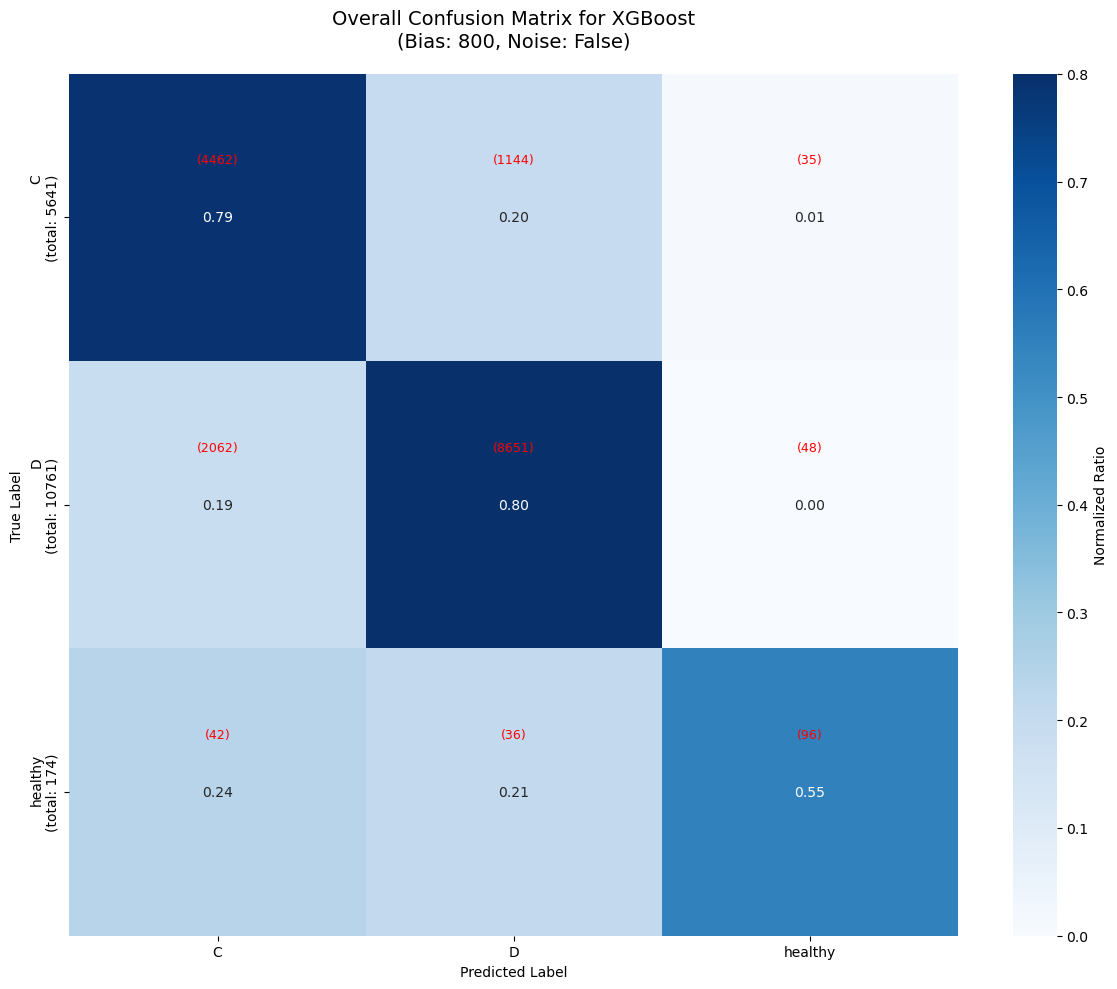

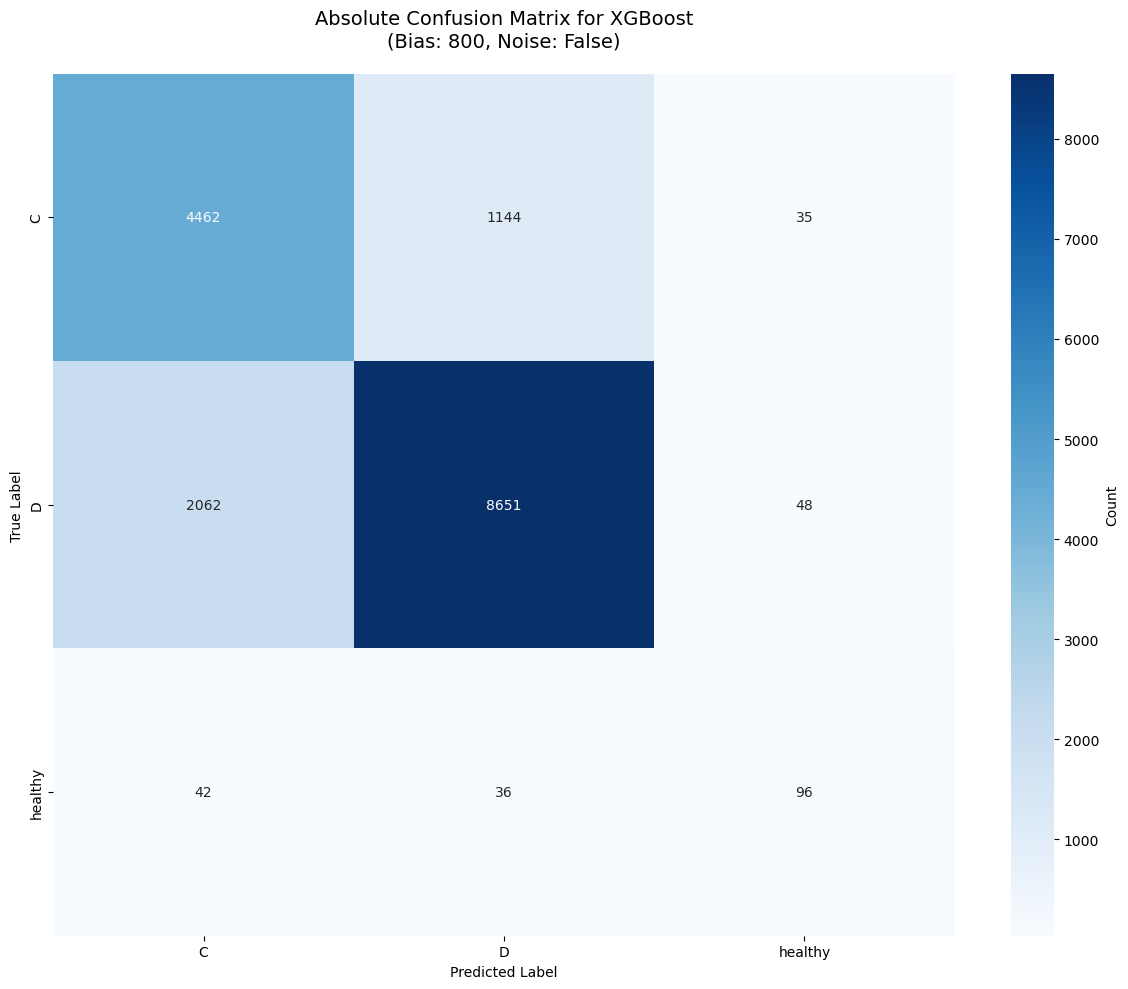


=== OVERALL METRICS for XGBoost ===
Total samples: 16576
Overall Accuracy: 0.7969

Detailed Classification Report:
              precision    recall  f1-score   support

           C       0.68      0.79      0.73      5641
           D       0.88      0.80      0.84     10761
     healthy       0.54      0.55      0.54       174

    accuracy                           0.80     16576
   macro avg       0.70      0.72      0.71     16576
weighted avg       0.81      0.80      0.80     16576

models_cross_validation not change


In [55]:
trained_models_best, results_best, cv_dict_best, shap_data_list_best = models_cross_validation(
    X=X_train_df, 
    y=y_train_df, 
    models={"XGBoost": XGBClassifier}, 
    params=best_params,  
    folds_indices=folds_indices_clean, 
    n_splits=5, 
    bias=800, 
    noise=False, 
    draw_matrix=True
)

In [56]:
for model_name in results_best["model"].unique():
    df_model = pd.DataFrame(results_best[results_best["model"] == model_name])

    print(f"\n{'='*60}")
    print(f"📊 МОДЕЛЬ: {model_name}")
    print(f"Mean Accuracy = {round(df_model['Accuracy'].mean(), 2)}")
    print(f"Mean F1-macro = {round(df_model['F1-macro'].mean(), 2)}")
    print(f"Mean F1-micro = {round(df_model['F1-micro'].mean(), 2)}")
    print(f"Top_2_accuracy = {round(df_model['top_2_accuracy'].mean(), 2)}")
    print(f"Top_3_accuracy = {round(df_model['top_3_accuracy'].mean(), 2)}")
    print(f"Top_5_accuracy = {round(df_model['top_5_accuracy'].mean(), 2)}")
    print(f"{'='*60}")


📊 МОДЕЛЬ: XGBoost
Mean Accuracy = 0.8
Mean F1-macro = 0.7
Mean F1-micro = 0.8
Top_2_accuracy = 0.99
Top_3_accuracy = 1.0
Top_5_accuracy = 1.0


- Calibration

In [57]:
print("Collecting OOF predictions...")
oof_predictions_best = collect_oof_predictions(
    trained_models=trained_models_best,
    X=X_train_df, 
    y=y_train_df,
    cv_splits_dict=cv_dict_best,
    models_config=MODEL_CONFIGS
)

INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


  ✅ Fold 0: 3320 samples collected
  ✅ Fold 1: 3318 samples collected


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


  ✅ Fold 2: 3315 samples collected
  ✅ Fold 3: 3314 samples collected
  ✅ Fold 4: 3309 samples collected
  ✅ Total: 16576 OOF predictions collected for XGBoost


In [58]:
print("Applying calibration to test data...")
test_calibrated_best, calibrator_best = apply_calibration(trained_models_best, X_test_df, oof_predictions_best, all_calibration=False)



Applying calibration to test data...
Applying calibration for XGBoost...
  Fold 0: success
  Fold 1: success
  Fold 2: success
  Fold 3: success
  Fold 4: success


Evaluating calibration...

EVALUATING XGBoost

--- ORIGINAL ---
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}
  True labels shape: (2885,), unique: [0 1 2]
  Prediction shape: (2885, 3)
=== Calibration Metrics for XGBoost (original) ===
Brier Score: 0.0913
Log Loss: 0.4422
ECE: 0.0141
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}


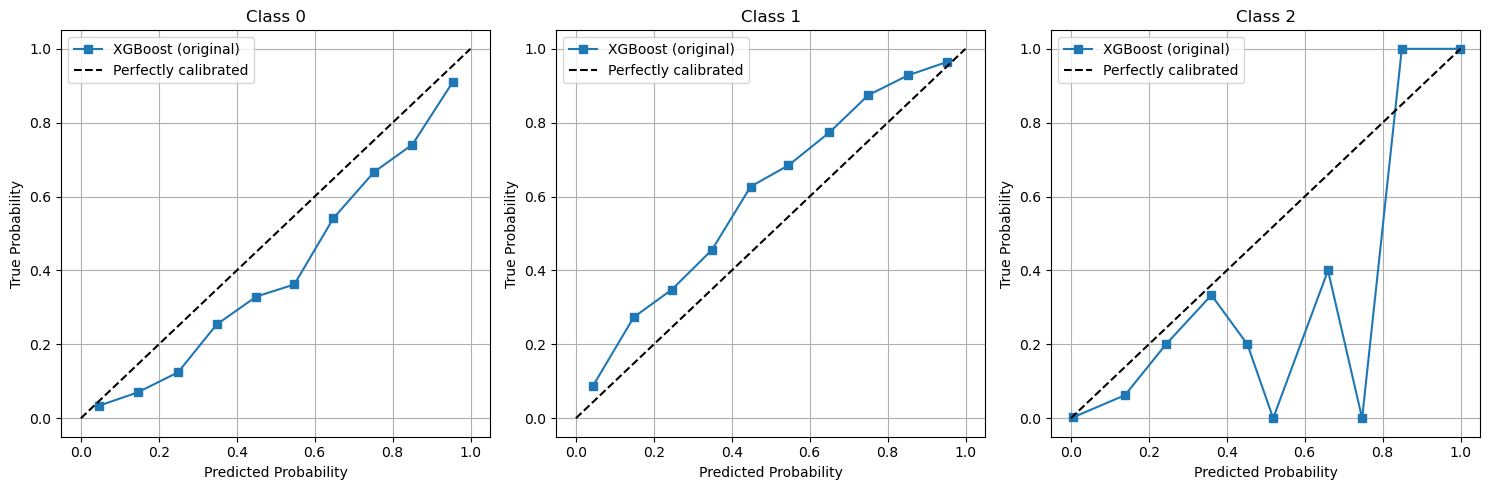


--- DIRICHLET ---
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}
  True labels shape: (2885,), unique: [0 1 2]
  Prediction shape: (2885, 3)
=== Calibration Metrics for XGBoost (dirichlet) ===
Brier Score: 0.0855
Log Loss: 0.4160
ECE: 0.0239
  ⚠️  Found 2 NaN values in y_true
  Removed 2 rows with NaN, remaining: 2885
  String labels encoded: {'C': 0, 'D': 1, 'healthy': 2}


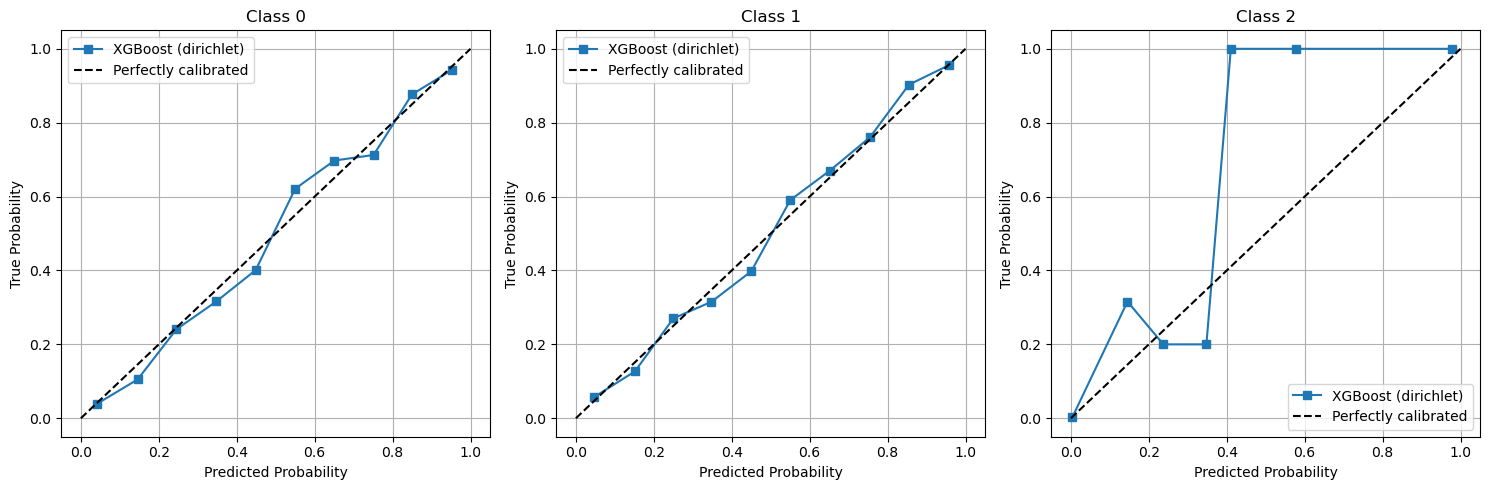

In [59]:
print("Evaluating calibration...")
all_metrics, all_figures = evaluate_all_calibrations(
    test_calibrated_best, 
    y_test_df,  
    oof_predictions_best
)

In [60]:
test_calibrated_best

{'XGBoost': {'original': array([[1.8024202e-01, 8.1918144e-01, 5.7653850e-04],
         [8.4339017e-01, 1.5616110e-01, 4.4879457e-04],
         [6.8398678e-01, 3.1500214e-01, 1.0109813e-03],
         ...,
         [9.2461681e-01, 7.3883407e-02, 1.4998119e-03],
         [1.0355348e-03, 1.1910665e-03, 9.9777347e-01],
         [1.4587983e-01, 8.5309184e-01, 1.0282655e-03]], dtype=float32),
  'dirichlet': array([[1.20479679e-01, 8.79056177e-01, 4.64144129e-04],
         [7.32131903e-01, 2.67361100e-01, 5.06996843e-04],
         [5.45314440e-01, 4.53740199e-01, 9.45361517e-04],
         ...,
         [8.50946962e-01, 1.47580718e-01, 1.47232003e-03],
         [4.64387720e-03, 2.00352978e-02, 9.75320825e-01],
         [9.65452662e-02, 9.02710969e-01, 7.43764451e-04]])}}

In [61]:
for model_name, results in test_calibrated_best.items():
    print(f"\n=== {model_name} ===")
    
    for method, proba in results.items():
        print(f"\n{method}:")
        print(f"  Shape: {proba.shape}")  # (n_samples, n_classes)
        print(f"  Data type: {proba.dtype}")
        
        print(f"  First 3 predictions:")
        for i in range(min(3, len(proba))):
            print(f"    Sample {i}: {proba[i]} → class {np.argmax(proba[i])}")
        
        print(f"  Min probability: {proba.min():.4f}")
        print(f"  Max probability: {proba.max():.4f}")
        print(f"  Mean probability: {proba.mean():.4f}")


=== XGBoost ===

original:
  Shape: (2887, 3)
  Data type: float32
  First 3 predictions:
    Sample 0: [1.8024202e-01 8.1918144e-01 5.7653850e-04] → class 1
    Sample 1: [8.4339017e-01 1.5616110e-01 4.4879457e-04] → class 0
    Sample 2: [0.6839868  0.31500214 0.00101098] → class 0
  Min probability: 0.0000
  Max probability: 0.9991
  Mean probability: 0.3333

dirichlet:
  Shape: (2887, 3)
  Data type: float64
  First 3 predictions:
    Sample 0: [1.20479679e-01 8.79056177e-01 4.64144129e-04] → class 1
    Sample 1: [7.32131903e-01 2.67361100e-01 5.06996843e-04] → class 0
    Sample 2: [0.54531444 0.4537402  0.00094536] → class 0
  Min probability: 0.0001
  Max probability: 0.9964
  Mean probability: 0.3333


============

In [67]:
import pickle
with open("./folds_indices_clean.pkl", "rb") as f:
    folds_indices = pickle.load(f)
folds_indices

{'fold_0': [array([    1,     3,     5, ..., 15326, 15328, 15329]),
  array([    0,     2,     4, ..., 15324, 15327, 15330])],
 'fold_1': [array([    0,     1,     2, ..., 15328, 15329, 15330]),
  array([    5,     7,     8, ..., 15320, 15322, 15325])],
 'fold_2': [array([    0,     1,     2, ..., 15328, 15329, 15330]),
  array([   10,    22,    28, ..., 15310, 15317, 15318])],
 'fold_3': [array([    0,     1,     2, ..., 15327, 15329, 15330]),
  array([    3,    11,    13, ..., 15316, 15319, 15328])],
 'fold_4': [array([    0,     2,     3, ..., 15327, 15328, 15330]),
  array([    1,     6,    16, ..., 15321, 15326, 15329])]}

In [ ]:
X_train_disease_df = pd.DataFrame(X_disease)
y_train_disease_df = pd.DataFrame(y_disease)

trained_models_disease, results_disease, cv_dict_disease, shap_data_list_disease = models_cross_validation(
    X=X_train_disease_df, y=y_train_disease_df, models=models, folds_indices=folds_indices, n_splits=5, bias=800, noise=True, draw_matrix=True
)

CatBoost Cross-Validation:   0%|          | 0/5 [00:00<?, ?it/s]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
CatBoost Cross-Validation:  20%|██        | 1/5 [00:22<01:28, 22.10s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
CatBoost Cross-Validation:  40%|████      | 2/5 [00:41<01:01, 20.46s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
CatBoost Cross-Validation:  60%|██████    | 3/5 [01:00<00:40, 20.06s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
CatBoost Cross-Validation:  80%|████████  | 4/5 [01:22<00:20, 20.81s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
CatBoost Cross-Validation: 100%|██████████| 5/5 [01:44<00:00, 20.94s/it]


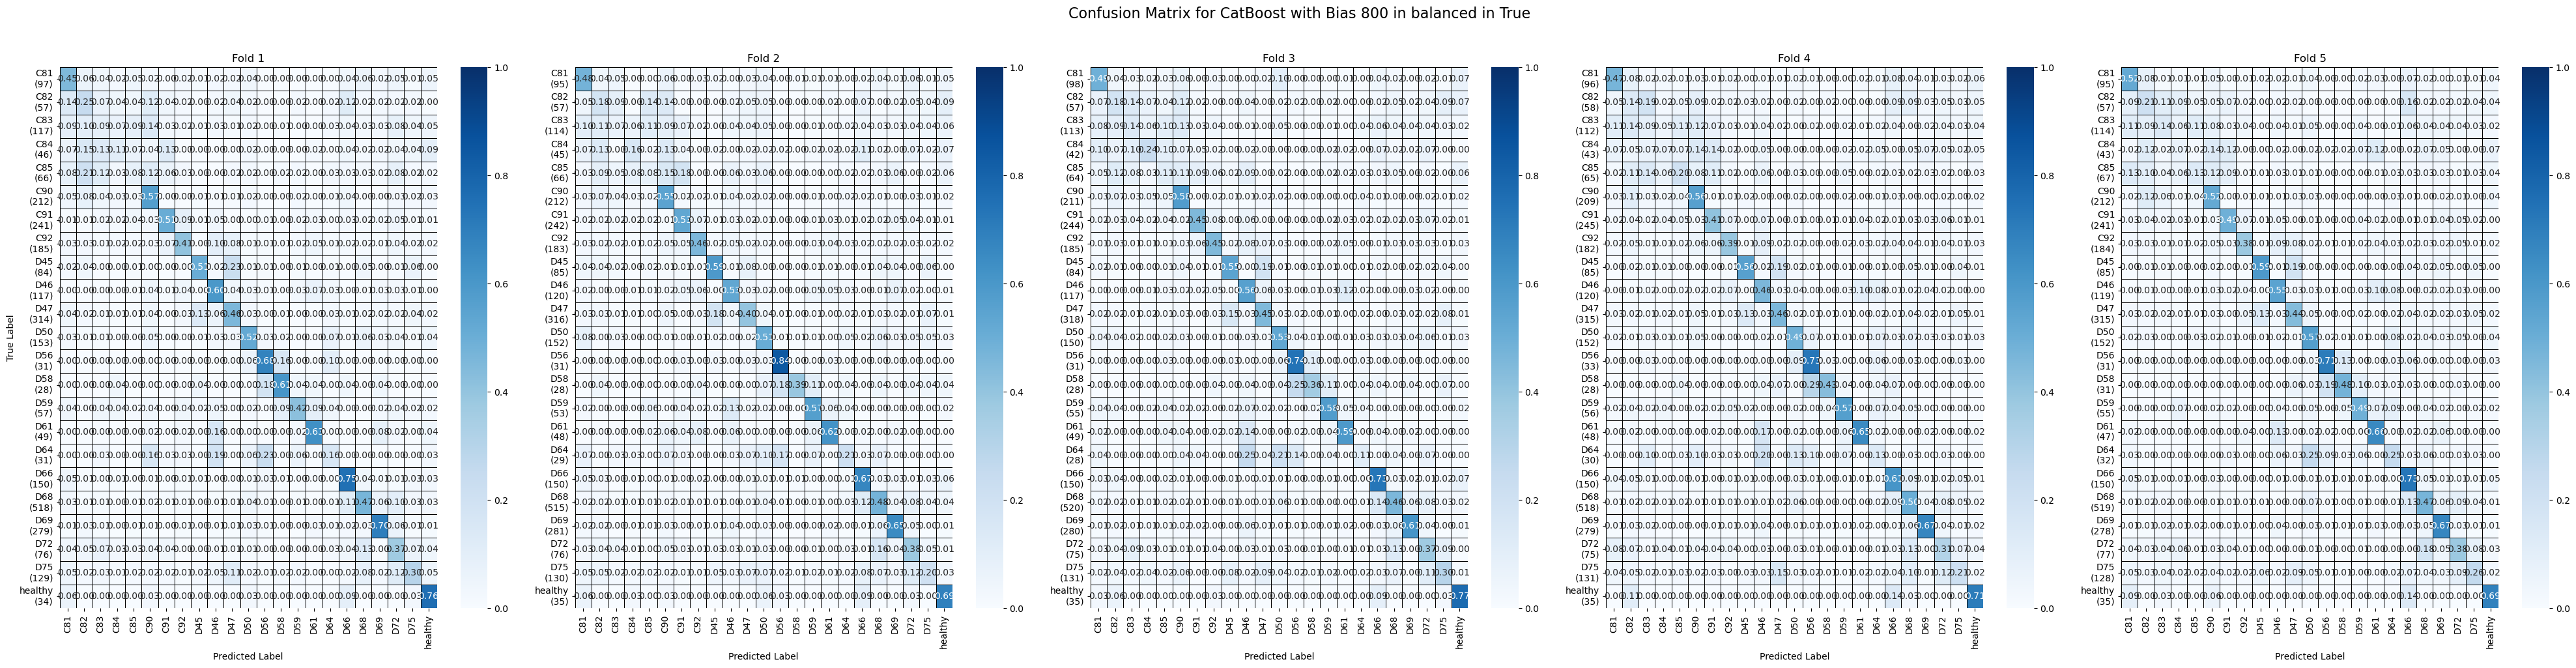

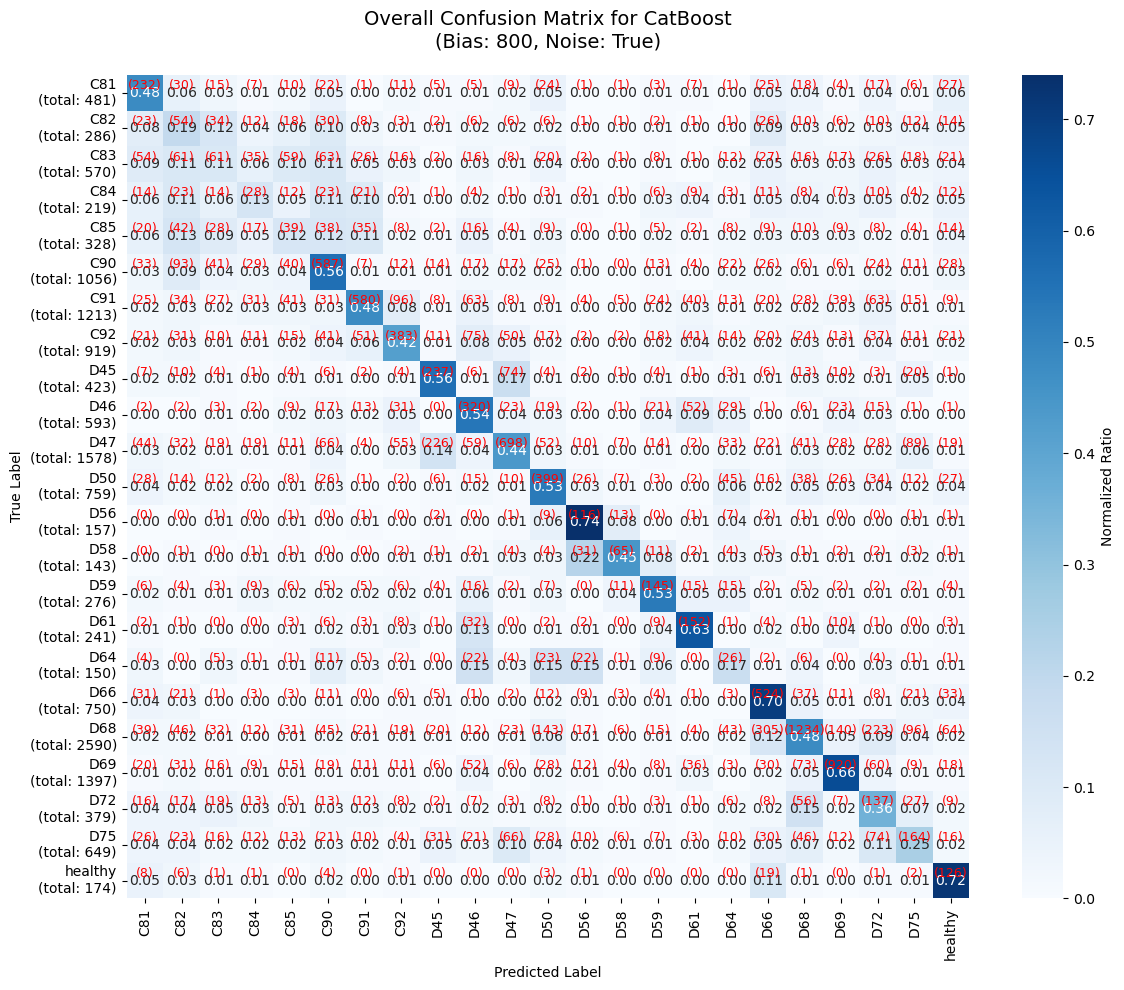

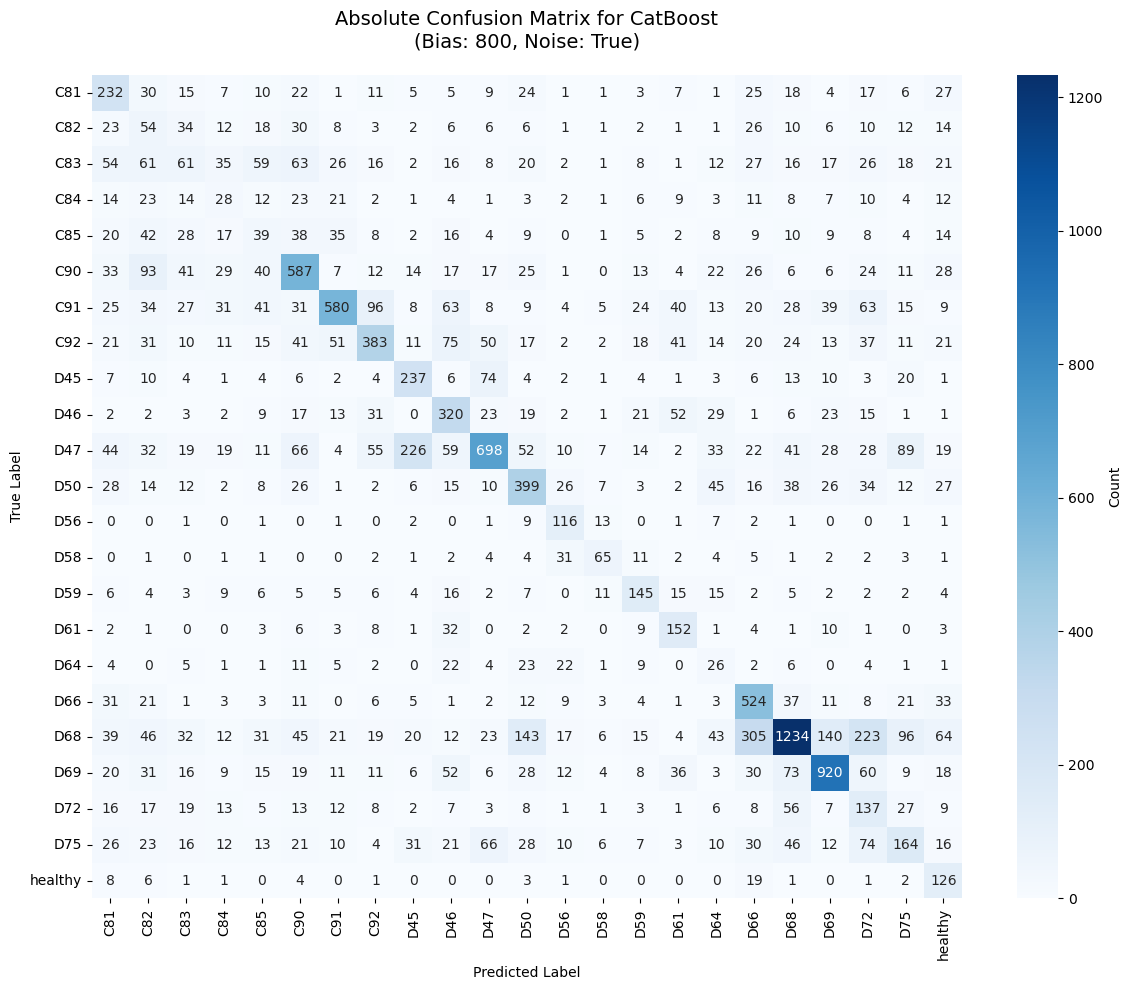


=== OVERALL METRICS for CatBoost ===
Total samples: 15331
Overall Accuracy: 0.4714

Detailed Classification Report:
              precision    recall  f1-score   support

         C81       0.35      0.48      0.41       481
         C82       0.09      0.19      0.13       286
         C83       0.17      0.11      0.13       570
         C84       0.11      0.13      0.12       219
         C85       0.11      0.12      0.12       328
         C90       0.54      0.56      0.55      1056
         C91       0.71      0.48      0.57      1213
         C92       0.56      0.42      0.48       919
         D45       0.40      0.56      0.47       423
         D46       0.42      0.54      0.47       593
         D47       0.68      0.44      0.54      1578
         D50       0.47      0.53      0.49       759
         D56       0.42      0.74      0.54       157
         D58       0.47      0.45      0.46       143
         D59       0.44      0.53      0.48       276
         D61      

XGBoost Cross-Validation:   0%|          | 0/5 [00:00<?, ?it/s]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  20%|██        | 1/5 [00:17<01:10, 17.59s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  40%|████      | 2/5 [00:32<00:47, 15.97s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  60%|██████    | 3/5 [00:45<00:29, 14.83s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  80%|████████  | 4/5 [00:59<00:14, 14.30s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation: 100%|██████████| 5/5 [01:15<00:00, 15.10s/it]


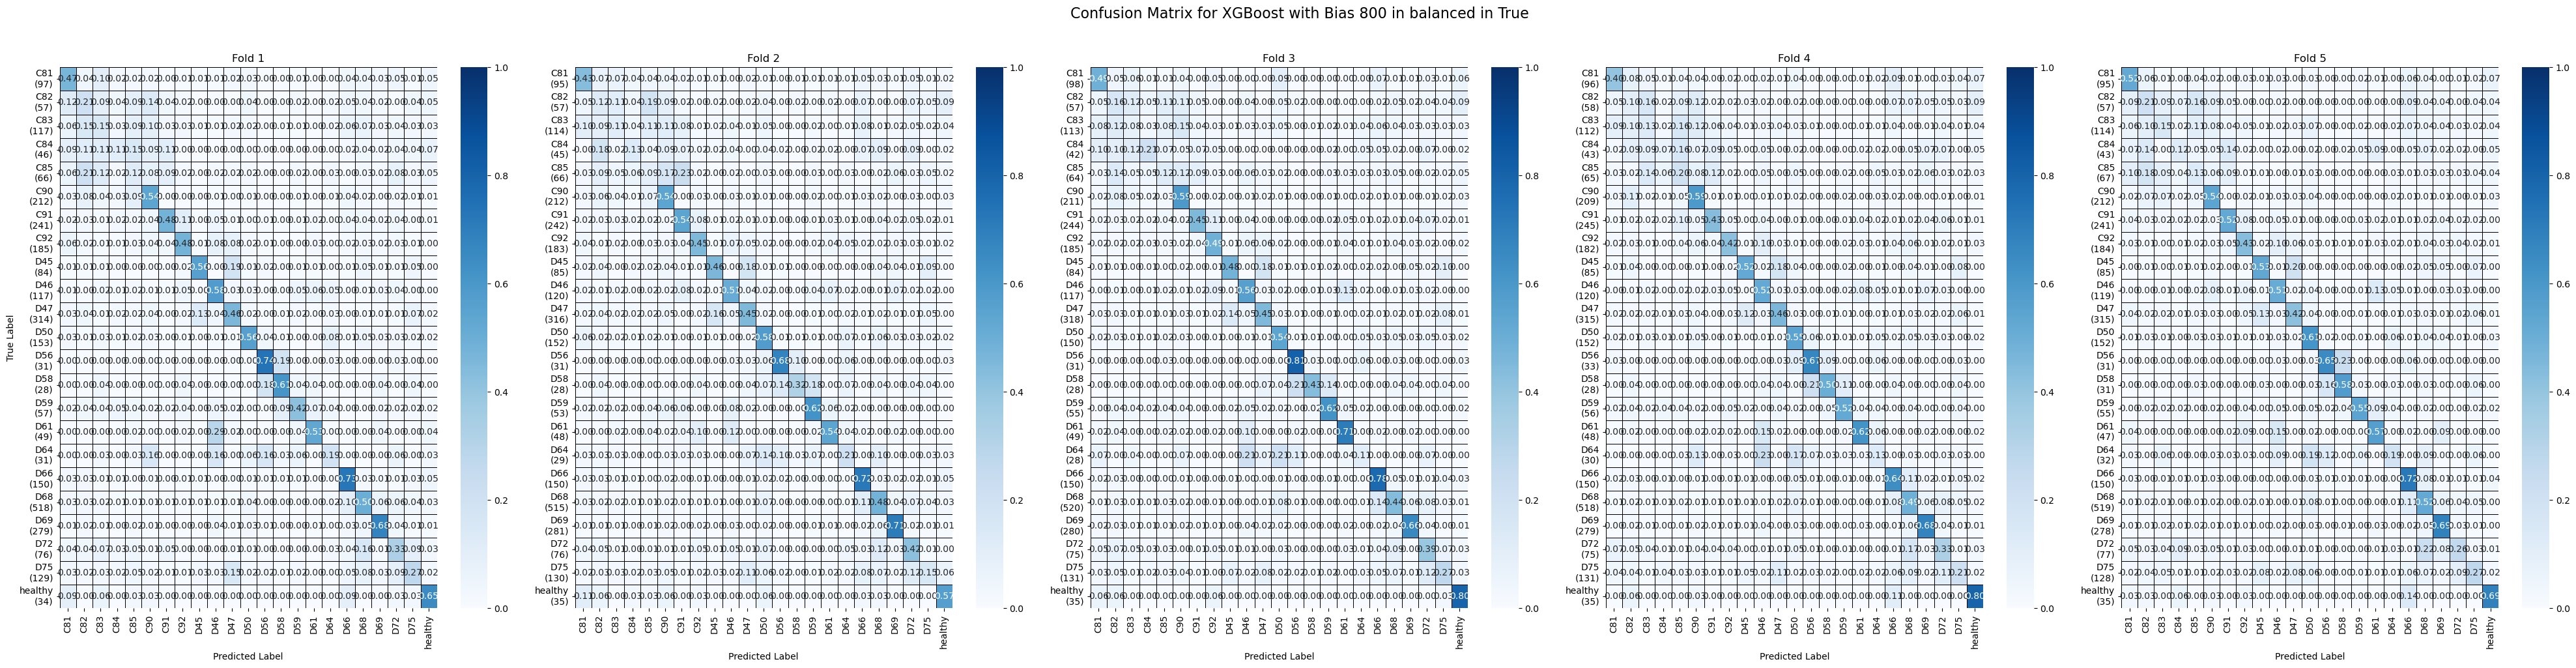

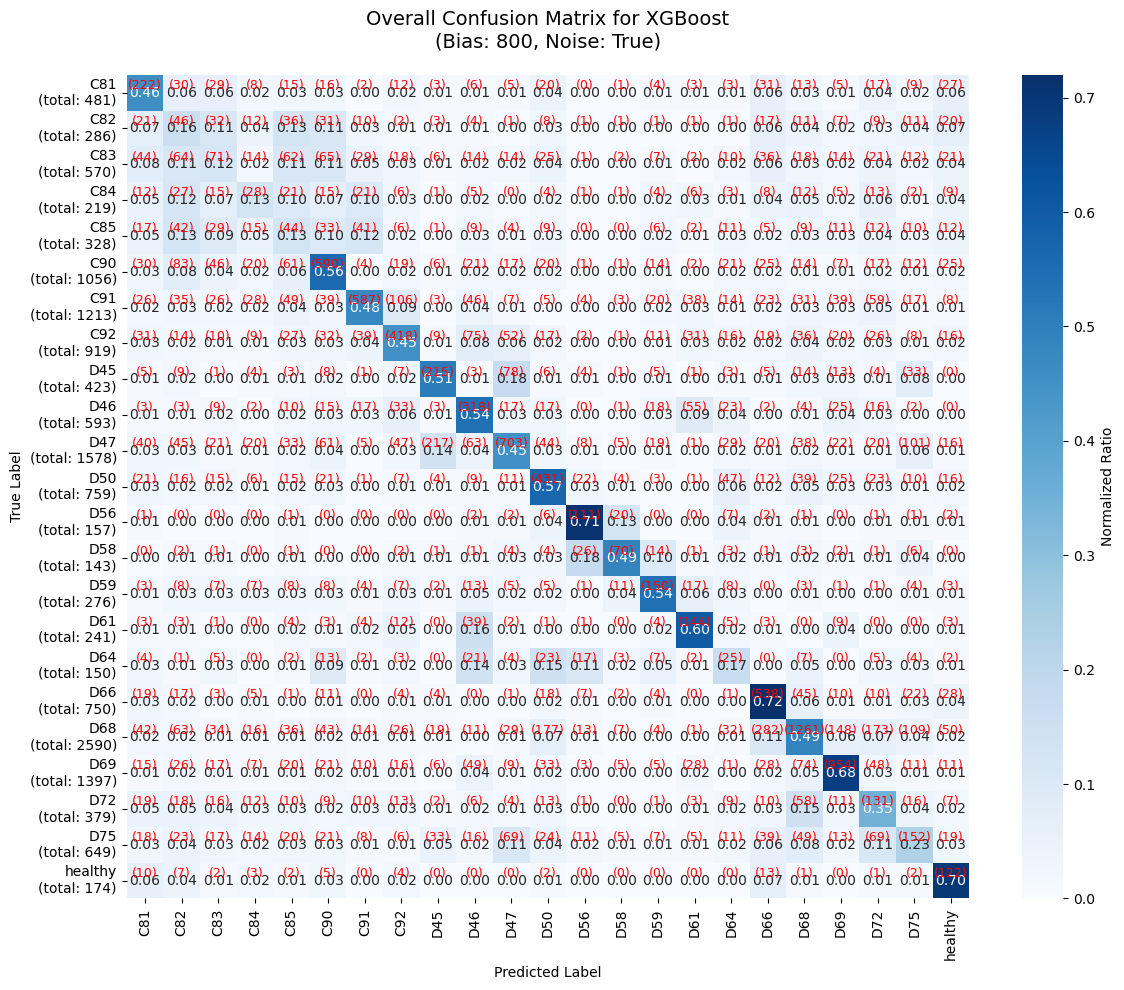

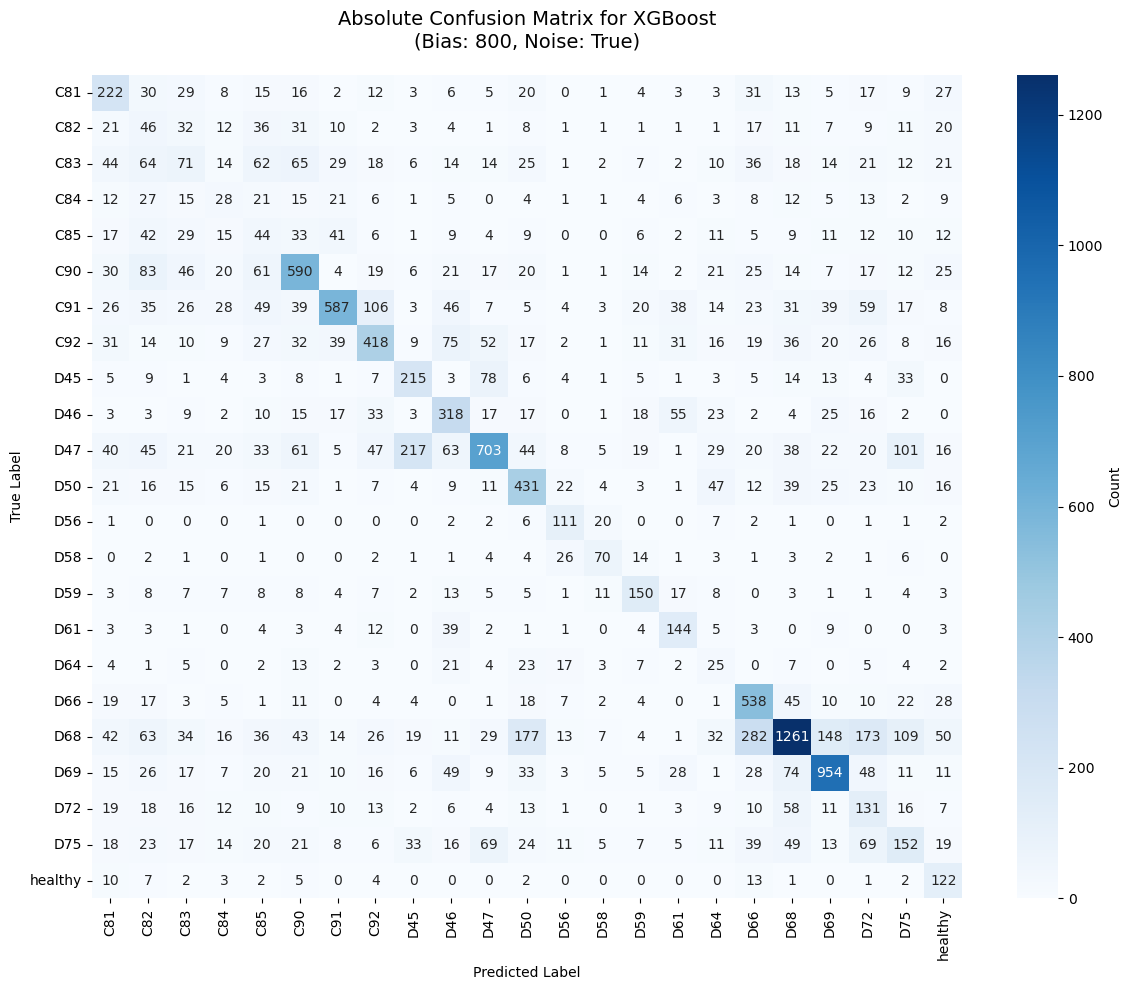


=== OVERALL METRICS for XGBoost ===
Total samples: 15331
Overall Accuracy: 0.4782

Detailed Classification Report:
              precision    recall  f1-score   support

         C81       0.37      0.46      0.41       481
         C82       0.08      0.16      0.11       286
         C83       0.17      0.12      0.15       570
         C84       0.12      0.13      0.12       219
         C85       0.09      0.13      0.11       328
         C90       0.56      0.56      0.56      1056
         C91       0.73      0.48      0.58      1213
         C92       0.54      0.45      0.49       919
         D45       0.40      0.51      0.45       423
         D46       0.44      0.54      0.48       593
         D47       0.68      0.45      0.54      1578
         D50       0.47      0.57      0.52       759
         D56       0.47      0.71      0.57       157
         D58       0.49      0.49      0.49       143
         D59       0.49      0.54      0.51       276
         D61       

In [69]:
trained_models_disease, results_disease, cv_dict_disease, shap_data_list_disease = models_cross_validation(
    X=X_train_disease_df, y=y_train_disease_df, models=models, folds_indices=folds_indices, n_splits=5, bias=800, noise=True, draw_matrix=True
)

In [70]:
best_params_disease, optimization_results_disease = optimize_xgboost(
    X=X_train_disease_df, 
    y=y_train_disease_df, 
    folds_indices=folds_indices,
    n_trials=10
)

[I 2025-11-23 19:34:34,928] A new study created in memory with name: no-name-02f56e57-c518-495b-bdb4-ef7e5d17fa6c
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 1.7346, F1 = 0.4219


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 1.7780, F1 = 0.4061


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 1.7523, F1 = 0.4261


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 1.8511, F1 = 0.4171


[I 2025-11-23 19:35:09,454] Trial 0 finished with value: 1.7800152478295075 and parameters: {'n_estimators': 106, 'learning_rate': 0.2536999076681772, 'max_depth': 7, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 0.7799726016810132, 'reg_lambda': 0.2904180608409973}. Best is trial 0 with value: 1.7800152478295075.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 1.7841, F1 = 0.4119
Trial 0: Mean LogLoss = 1.7800, Mean F1 = 0.4166


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 1.5924, F1 = 0.4307


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 1.6265, F1 = 0.4276


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 1.6097, F1 = 0.4410


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 1.6707, F1 = 0.4247


[I 2025-11-23 19:36:15,753] Trial 1 finished with value: 1.6245501589187505 and parameters: {'n_estimators': 180, 'learning_rate': 0.07725378389307355, 'max_depth': 7, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'reg_alpha': 4.162213204002109, 'reg_lambda': 1.0616955533913808}. Best is trial 1 with value: 1.6245501589187505.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 1.6235, F1 = 0.4268
Trial 1: Mean LogLoss = 1.6246, Mean F1 = 0.4302


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 2.2023, F1 = 0.3858


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 2.2181, F1 = 0.3749


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 2.2075, F1 = 0.3877


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 2.2315, F1 = 0.3781


[I 2025-11-23 19:36:30,630] Trial 2 finished with value: 2.214390599444545 and parameters: {'n_estimators': 77, 'learning_rate': 0.018659959624904916, 'max_depth': 4, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'reg_alpha': 1.4561457009902097, 'reg_lambda': 3.0592644736118975}. Best is trial 1 with value: 1.6245501589187505.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 2.2125, F1 = 0.3738
Trial 2: Mean LogLoss = 2.2144, Mean F1 = 0.3801


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 2.0281, F1 = 0.3938


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 2.0509, F1 = 0.3920


INFO:MLLetter:START PREPROCESSING


Fold 2: LogLoss = 2.0384, F1 = 0.4046


INFO:MLLetter:One-Hot Encoding  - gender.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 2.0636, F1 = 0.3814


[I 2025-11-23 19:36:48,588] Trial 3 finished with value: 2.044008008922474 and parameters: {'n_estimators': 71, 'learning_rate': 0.027010527749605478, 'max_depth': 5, 'subsample': 0.7824279936868144, 'colsample_bytree': 0.9140703845572055, 'reg_alpha': 0.9983689107917987, 'reg_lambda': 2.571172192068058}. Best is trial 1 with value: 1.6245501589187505.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 2.0390, F1 = 0.3834
Trial 3: Mean LogLoss = 2.0440, Mean F1 = 0.3911


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 2.1135, F1 = 0.4008


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 2.1308, F1 = 0.3997


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 2.1231, F1 = 0.4106


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 2.1482, F1 = 0.3920


[I 2025-11-23 19:37:28,387] Trial 4 finished with value: 2.1285123499275174 and parameters: {'n_estimators': 139, 'learning_rate': 0.011711509955524094, 'max_depth': 6, 'subsample': 0.6682096494749166, 'colsample_bytree': 0.6260206371941118, 'reg_alpha': 4.7444276862666666, 'reg_lambda': 4.828160165372797}. Best is trial 1 with value: 1.6245501589187505.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 2.1269, F1 = 0.3840
Trial 4: Mean LogLoss = 2.1285, Mean F1 = 0.3974


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 1.8963, F1 = 0.3994


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 1.9096, F1 = 0.3873


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 1.9025, F1 = 0.4020


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 1.9318, F1 = 0.3851


[I 2025-11-23 19:37:53,918] Trial 5 finished with value: 1.9094619154090193 and parameters: {'n_estimators': 172, 'learning_rate': 0.028180680291847244, 'max_depth': 3, 'subsample': 0.8736932106048627, 'colsample_bytree': 0.7760609974958406, 'reg_alpha': 0.6101911742238941, 'reg_lambda': 2.475884550556351}. Best is trial 1 with value: 1.6245501589187505.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 1.9072, F1 = 0.3876
Trial 5: Mean LogLoss = 1.9095, Mean F1 = 0.3923


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 1.6971, F1 = 0.4290


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 1.7118, F1 = 0.4202


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 1.7077, F1 = 0.4221


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 1.7575, F1 = 0.4090


[I 2025-11-23 19:38:05,398] Trial 6 finished with value: 1.7161401790096196 and parameters: {'n_estimators': 55, 'learning_rate': 0.22038218939289875, 'max_depth': 4, 'subsample': 0.8650089137415928, 'colsample_bytree': 0.7246844304357644, 'reg_alpha': 2.600340105889054, 'reg_lambda': 2.7335513967163982}. Best is trial 1 with value: 1.6245501589187505.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 1.7066, F1 = 0.4191
Trial 6: Mean LogLoss = 1.7161, Mean F1 = 0.4199


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 1.6604, F1 = 0.4275


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 1.6907, F1 = 0.4063


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 1.6711, F1 = 0.4294


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 1.7409, F1 = 0.4201


[I 2025-11-23 19:38:38,202] Trial 7 finished with value: 1.6894729302848916 and parameters: {'n_estimators': 77, 'learning_rate': 0.27051668818999286, 'max_depth': 7, 'subsample': 0.9757995766256756, 'colsample_bytree': 0.9579309401710595, 'reg_alpha': 2.9894998940554256, 'reg_lambda': 4.609371175115584}. Best is trial 1 with value: 1.6245501589187505.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 1.6843, F1 = 0.4196
Trial 7: Mean LogLoss = 1.6895, Mean F1 = 0.4206


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 2.3411, F1 = 0.3689


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 2.3524, F1 = 0.3698


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 2.3380, F1 = 0.3692


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 2.3620, F1 = 0.3528


[I 2025-11-23 19:38:48,957] Trial 8 finished with value: 2.3483273873610777 and parameters: {'n_estimators': 63, 'learning_rate': 0.01947558230629543, 'max_depth': 3, 'subsample': 0.7301321323053057, 'colsample_bytree': 0.7554709158757928, 'reg_alpha': 1.3567451588694794, 'reg_lambda': 4.143687545759647}. Best is trial 1 with value: 1.6245501589187505.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 4: LogLoss = 2.3481, F1 = 0.3594
Trial 8: Mean LogLoss = 2.3483, Mean F1 = 0.3640


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 0: LogLoss = 1.8804, F1 = 0.4086


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 1: LogLoss = 1.9073, F1 = 0.3999


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 2: LogLoss = 1.8926, F1 = 0.4181


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


Fold 3: LogLoss = 1.9296, F1 = 0.4043


[I 2025-11-23 19:39:22,933] Trial 9 finished with value: 1.9018137973566425 and parameters: {'n_estimators': 103, 'learning_rate': 0.026000059117302653, 'max_depth': 6, 'subsample': 0.6563696899899051, 'colsample_bytree': 0.9208787923016158, 'reg_alpha': 0.3727532183988541, 'reg_lambda': 4.9344346830025865}. Best is trial 1 with value: 1.6245501589187505.


Fold 4: LogLoss = 1.8991, F1 = 0.3994
Trial 9: Mean LogLoss = 1.9018, Mean F1 = 0.4061

🎯 XGBoost optimization completed
Best XGBoost parameters: {'n_estimators': 180, 'learning_rate': 0.07725378389307355, 'max_depth': 7, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'reg_alpha': 4.162213204002109, 'reg_lambda': 1.0616955533913808}
Best log loss: 1.6246
Best F1 score: 0.4302


XGBoost Cross-Validation:   0%|          | 0/5 [00:00<?, ?it/s]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  20%|██        | 1/5 [00:15<01:02, 15.58s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  40%|████      | 2/5 [00:31<00:47, 15.68s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  60%|██████    | 3/5 [00:47<00:31, 15.74s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation:  80%|████████  | 4/5 [01:02<00:15, 15.60s/it]INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.
XGBoost Cross-Validation: 100%|██████████| 5/5 [01:17<00:00, 15.51s/it]


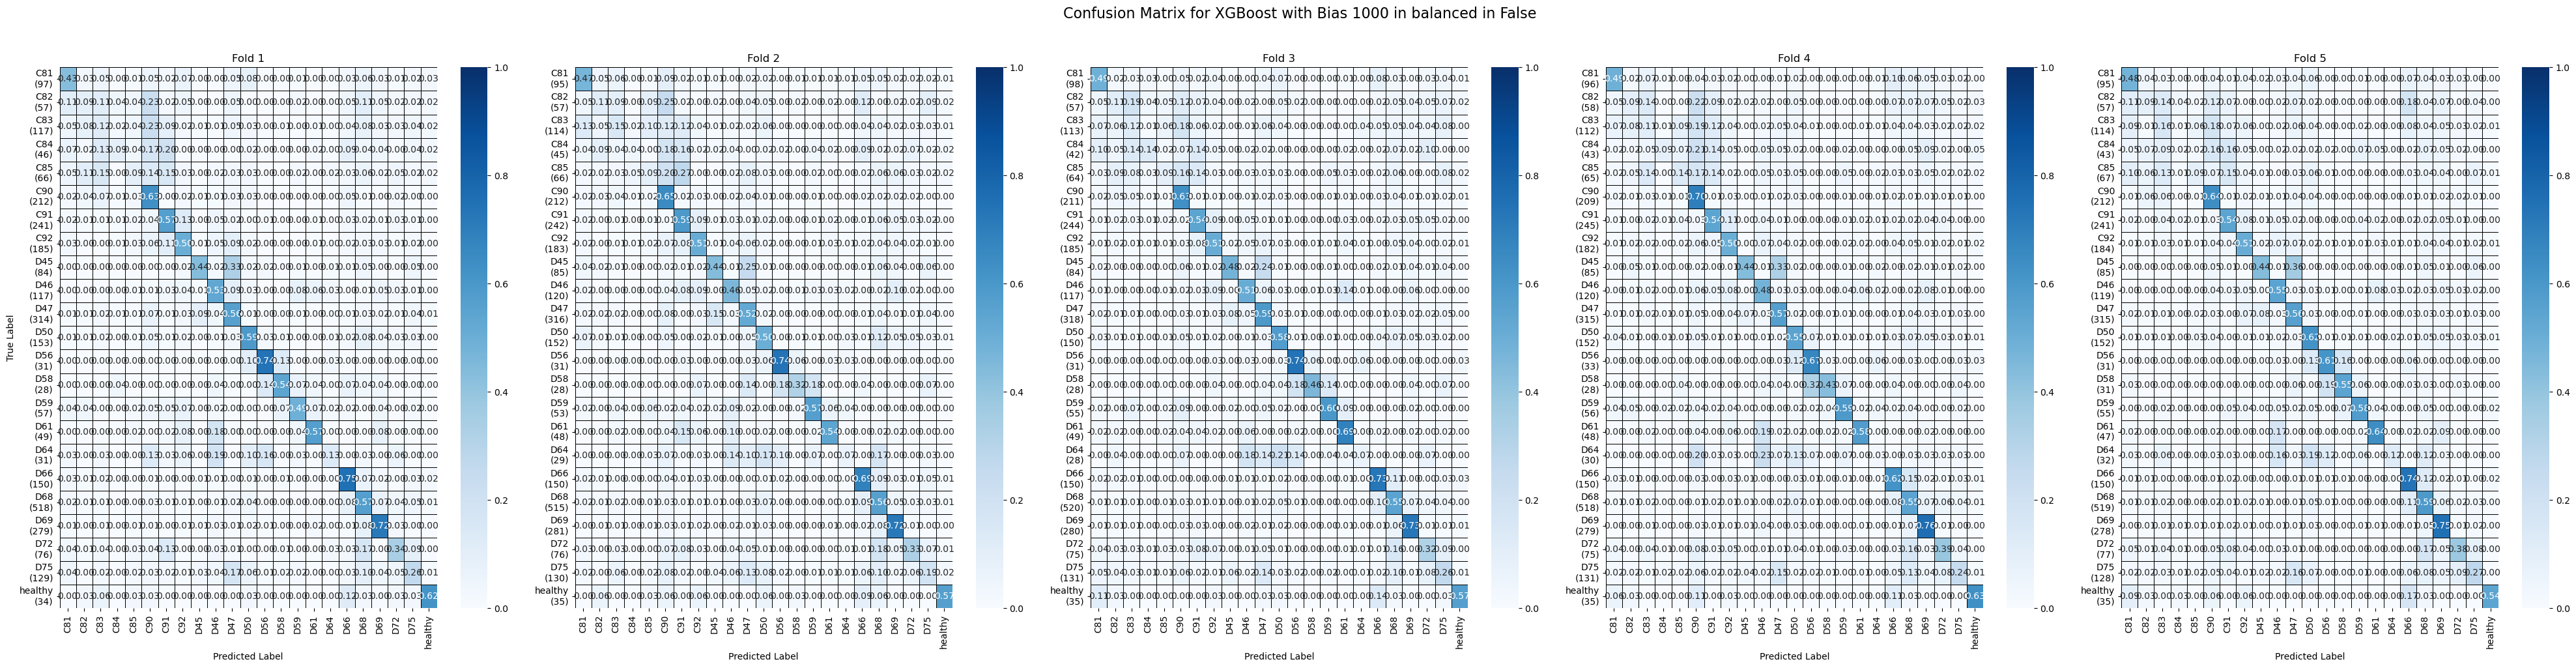

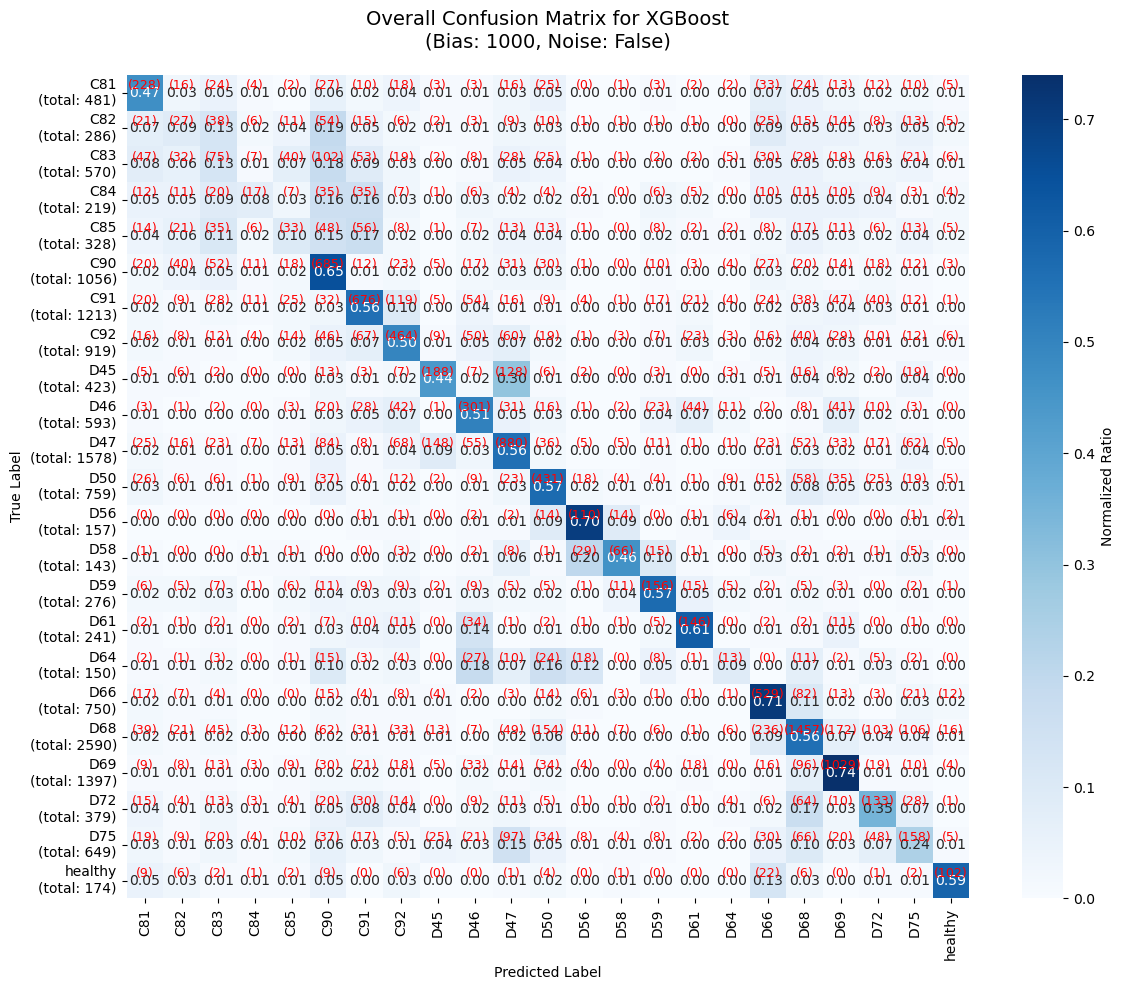

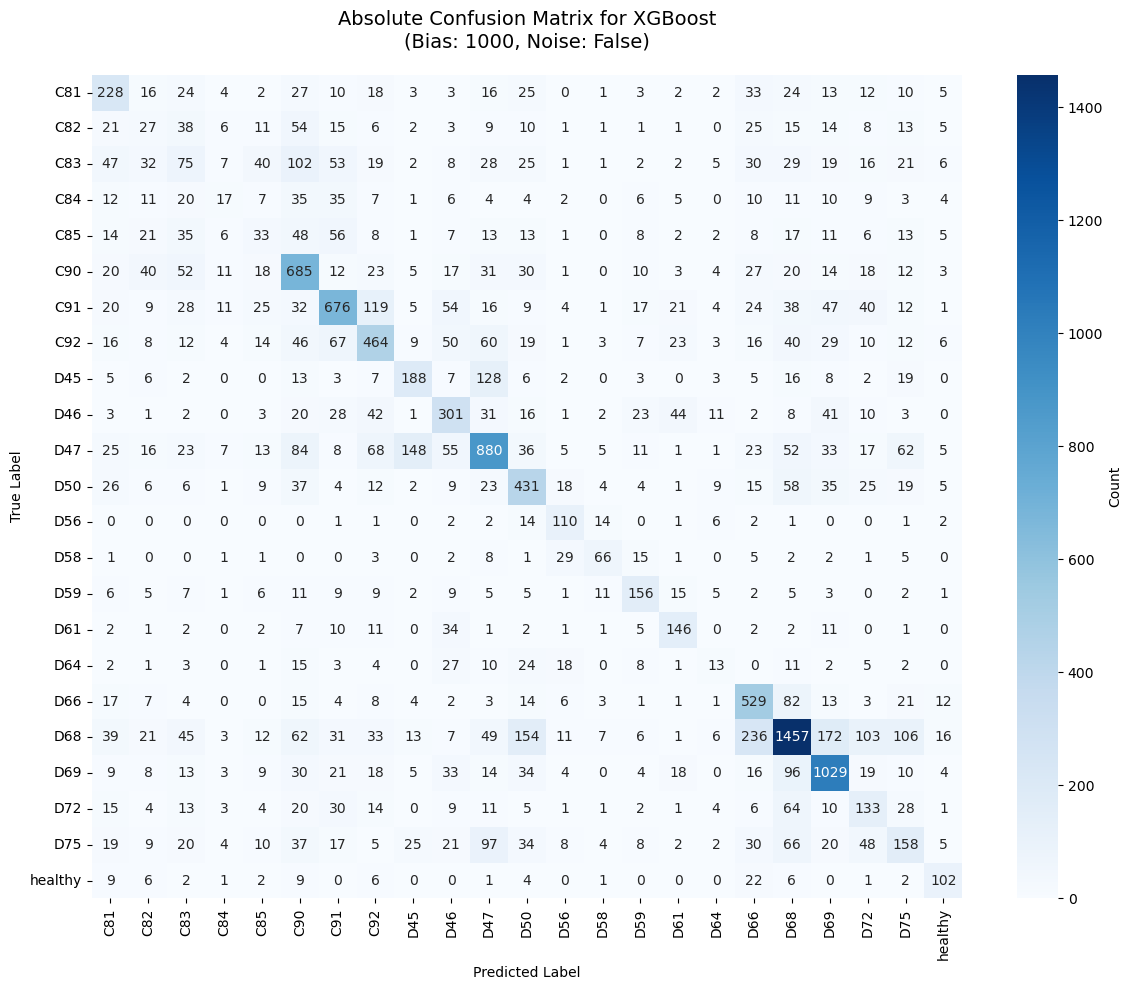


=== OVERALL METRICS for XGBoost ===
Total samples: 15331
Overall Accuracy: 0.5156

Detailed Classification Report:
              precision    recall  f1-score   support

         C81       0.41      0.47      0.44       481
         C82       0.11      0.09      0.10       286
         C83       0.18      0.13      0.15       570
         C84       0.19      0.08      0.11       219
         C85       0.15      0.10      0.12       328
         C90       0.49      0.65      0.56      1056
         C91       0.62      0.56      0.59      1213
         C92       0.51      0.50      0.51       919
         D45       0.45      0.44      0.45       423
         D46       0.45      0.51      0.48       593
         D47       0.61      0.56      0.58      1578
         D50       0.47      0.57      0.51       759
         D56       0.49      0.70      0.57       157
         D58       0.52      0.46      0.49       143
         D59       0.52      0.57      0.54       276
         D61       

In [71]:
trained_models_best_disease, results_best_disease, cv_dict_best_disease, shap_data_list_best_disease = models_cross_validation(
    X=X_train_disease_df, 
    y=y_train_disease_df, 
    models={"XGBoost": XGBClassifier}, 
    params=best_params_disease,  
    folds_indices=folds_indices, 
    n_splits=5, 
    bias=1000, 
    noise=False, 
    draw_matrix=True
)

In [72]:
for model_name in results_best_disease["model"].unique():
    df_model = pd.DataFrame(results_best_disease[results_best_disease["model"] == model_name])

    print(f"\n{'='*60}")
    print(f"📊 МОДЕЛЬ: {model_name}")
    print(f"Mean Accuracy = {round(df_model['Accuracy'].mean(), 2)}")
    print(f"Mean F1-macro = {round(df_model['F1-macro'].mean(), 2)}")
    print(f"Mean F1-micro = {round(df_model['F1-micro'].mean(), 2)}")
    print(f"Top_2_accuracy = {round(df_model['top_2_accuracy'].mean(), 2)}")
    print(f"Top_3_accuracy = {round(df_model['top_3_accuracy'].mean(), 2)}")
    print(f"Top_5_accuracy = {round(df_model['top_5_accuracy'].mean(), 2)}")
    print(f"{'='*60}")


📊 МОДЕЛЬ: XGBoost
Mean Accuracy = 0.52
Mean F1-macro = 0.43
Mean F1-micro = 0.52
Top_2_accuracy = 0.67
Top_3_accuracy = 0.75
Top_5_accuracy = 0.84


In [73]:
print("Collecting OOF predictions...")
oof_predictions_best_disease = collect_oof_predictions(
    trained_models=trained_models_best_disease,
    X=X_train_disease_df, 
    y=y_train_disease_df,
    cv_splits_dict=cv_dict_best_disease,
    models_config=MODEL_CONFIGS
)

INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


INFO:MLLetter:START PREPROCESSING


  ✅ Fold 0: 3071 samples collected


INFO:MLLetter:One-Hot Encoding  - gender.
INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


  ✅ Fold 1: 3063 samples collected


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


  ✅ Fold 2: 3065 samples collected


INFO:MLLetter:START PREPROCESSING
INFO:MLLetter:One-Hot Encoding  - gender.


  ✅ Fold 3: 3065 samples collected
  ✅ Fold 4: 3067 samples collected
  ✅ Total: 15331 OOF predictions collected for XGBoost


In [74]:
print("Applying calibration to test data...")
test_calibrated_best_disease, calibrators_best_disease = apply_calibration(
    trained_models_best_disease, 
    X_test_df_disease, 
    oof_predictions_best_disease, 
    all_calibration=False
)

import joblib

joblib.dump(trained_models_best_disease, 'trained_models_best_disease.pkl')

joblib.dump(calibrators_best_disease, 'calibrators_best_disease.pkl')

joblib.dump(oof_predictions_best_disease, 'oof_predictions_best_disease.pkl')

print("✅ Calibrated models saved!")

Applying calibration to test data...
Applying calibration for XGBoost...
  Fold 0: success
  Fold 1: success
  Fold 2: success
  Fold 3: success
  Fold 4: success
✅ Calibrated models saved!


In [75]:
y_test_df_disease

family
1         C85
2         C92
3         D75
4         D64
5         D59
...       ...
2882      D75
2883      D72
2884      C84
2885  healthy
2886      D72

[2710 rows x 1 columns]

Evaluating calibration...

EVALUATING XGBoost

--- ORIGINAL ---
  String labels encoded: {'C81': 0, 'C82': 1, 'C83': 2, 'C84': 3, 'C85': 4, 'C90': 5, 'C91': 6, 'C92': 7, 'D45': 8, 'D46': 9, 'D47': 10, 'D50': 11, 'D56': 12, 'D58': 13, 'D59': 14, 'D61': 15, 'D64': 16, 'D66': 17, 'D68': 18, 'D69': 19, 'D72': 20, 'D75': 21, 'healthy': 22}
  True labels shape: (2710,), unique: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
  Prediction shape: (2710, 23)
=== Calibration Metrics for XGBoost (original) ===
Brier Score: 0.0268
Log Loss: 1.6057
ECE: 0.0360
  String labels encoded: {'C81': 0, 'C82': 1, 'C83': 2, 'C84': 3, 'C85': 4, 'C90': 5, 'C91': 6, 'C92': 7, 'D45': 8, 'D46': 9, 'D47': 10, 'D50': 11, 'D56': 12, 'D58': 13, 'D59': 14, 'D61': 15, 'D64': 16, 'D66': 17, 'D68': 18, 'D69': 19, 'D72': 20, 'D75': 21, 'healthy': 22}


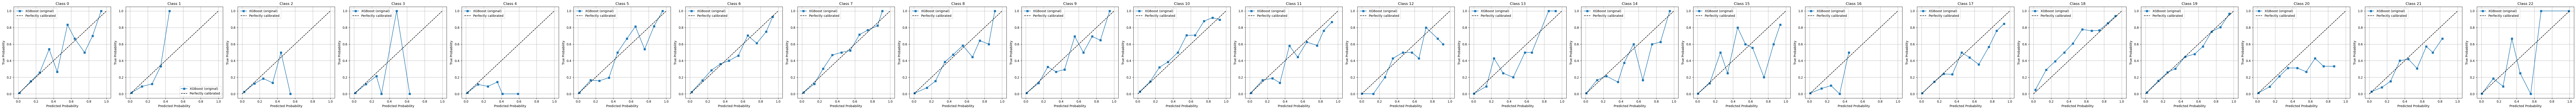


--- DIRICHLET ---
  String labels encoded: {'C81': 0, 'C82': 1, 'C83': 2, 'C84': 3, 'C85': 4, 'C90': 5, 'C91': 6, 'C92': 7, 'D45': 8, 'D46': 9, 'D47': 10, 'D50': 11, 'D56': 12, 'D58': 13, 'D59': 14, 'D61': 15, 'D64': 16, 'D66': 17, 'D68': 18, 'D69': 19, 'D72': 20, 'D75': 21, 'healthy': 22}
  True labels shape: (2710,), unique: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
  Prediction shape: (2710, 23)
=== Calibration Metrics for XGBoost (dirichlet) ===
Brier Score: 0.0262
Log Loss: 1.5522
ECE: 0.0164
  String labels encoded: {'C81': 0, 'C82': 1, 'C83': 2, 'C84': 3, 'C85': 4, 'C90': 5, 'C91': 6, 'C92': 7, 'D45': 8, 'D46': 9, 'D47': 10, 'D50': 11, 'D56': 12, 'D58': 13, 'D59': 14, 'D61': 15, 'D64': 16, 'D66': 17, 'D68': 18, 'D69': 19, 'D72': 20, 'D75': 21, 'healthy': 22}


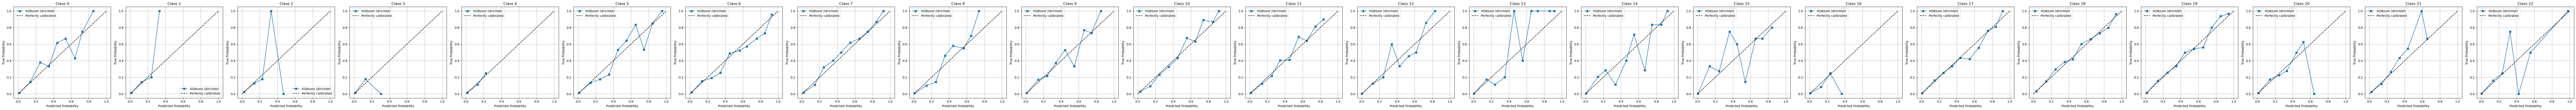

In [76]:
print("Evaluating calibration...")
all_metrics_disease, all_figures_disease = evaluate_all_calibrations(
    test_calibrated_best_disease, 
    y_test_df_disease,  
    oof_predictions_best_disease
)